In [17]:
#DM Final project
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [18]:
init_data=pd.read_csv('processed_reg_data.csv',sep=',')

In [19]:
init_data.head()

date   btc_price  tweet_volume  likes_gt_0  likes_gt_10  \
0  2016-01-01  433.437988           666          31            0   
1  2016-01-02  430.010986           625          25            2   
2  2016-01-03  433.091003           451          20            0   
3  2016-01-04  431.959991           493          22            1   
4  2016-01-05  429.105011           455          22            0   

   likes_gt_100  likes_gt_1000  retweets_gt_0  retweets_gt_1000  pos_sent  \
0             0              0            212                 0       157   
1             0              0            216                 0       159   
2             0              0            162                 0       149   
3             0              0            143                 0       151   
4             0              0            115                 0       146   

   ...  hr_12_18  hr_18_24  Friday  Monday  Saturday  Sunday  Thursday  \
0  ...       176       186       1       0         0       0         0   
1  ...       134       138       0       0         1       0         0   
2  ...       100       124       0       0         0       1         0   
3  ...       115       132       0       1         0       0         0   
4  ...       118       112       0       0         0       0         0   

   Tuesday  Wednesday  btc_cur_price  
0        0          0     434.334015  
1        0          0     433.437988  
2        0          0     430.010986  
3        0          0     433.091003  
4        1          0     431.959991  

[5 rows x 25 columns]

In [20]:
init_data.columns

Index(['date', 'btc_price', 'tweet_volume', 'likes_gt_0', 'likes_gt_10',
       'likes_gt_100', 'likes_gt_1000', 'retweets_gt_0', 'retweets_gt_1000',
       'pos_sent', 'neg_sent', 'neu_sent', 'user', 'hr_0_6', 'hr_6_12',
       'hr_12_18', 'hr_18_24', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'btc_cur_price'],
      dtype='object')

In [21]:
#init_data['diff_next_today']=init_data['btc_price']-init_data['btc_cur_price']
need_fields=['pos_sent','neg_sent', 'neu_sent','btc_price']
correlation_df=init_data.loc[:,need_fields]
#correlation_df.corr(method ='pearson')
correlation_df.corrwith(correlation_df["btc_price"])

pos_sent     0.129966
neg_sent     0.147642
neu_sent     0.066806
btc_price    1.000000
dtype: float64

In [22]:
init_data['diff_next_today']=init_data['btc_price']-init_data['btc_cur_price']
need_fields=['pos_sent','neg_sent', 'neu_sent','diff_next_today']
correlation_df=init_data.loc[:,need_fields]
#correlation_df.corr(method ='pearson')
correlation_df.corrwith(correlation_df["diff_next_today"])

pos_sent          -0.049816
neg_sent          -0.057894
neu_sent          -0.039113
diff_next_today    1.000000
dtype: float64

In [10]:
init_data['diff_next_today']=init_data['btc_price']-init_data['btc_cur_price']
init_data['price_high_low_class']=np.where(init_data['diff_next_today']>=0,1,0)
init_data=init_data.drop(['date','btc_price','diff_next_today'],axis='columns')
init_data['price_high_low_class'].head()

0    0
1    0
2    1
3    0
4    0
Name: price_high_low_class, dtype: int32

In [28]:
init_data.head()

tweet_volume  likes_gt_0  likes_gt_10  likes_gt_100  likes_gt_1000  \
0           666          31            0             0              0   
1           625          25            2             0              0   
2           451          20            0             0              0   
3           493          22            1             0              0   
4           455          22            0             0              0   

   retweets_gt_0  retweets_gt_1000  pos_sent  neg_sent  neu_sent  ...  \
0            212                 0       157        32       477  ...   
1            216                 0       159        39       427  ...   
2            162                 0       149        36       266  ...   
3            143                 0       151        35       307  ...   
4            115                 0       146        36       273  ...   

   hr_18_24  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  \
0       186       1       0         0       0         0        0          0   
1       138       0       0         1       0         0        0          0   
2       124       0       0         0       1         0        0          0   
3       132       0       1         0       0         0        0          0   
4       112       0       0         0       0         0        1          0   

   btc_cur_price  price_high_low_class  
0     434.334015                     0  
1     433.437988                     0  
2     430.010986                     1  
3     433.091003                     0  
4     431.959991                     0  

[5 rows x 24 columns]

In [27]:
init_data.columns

Index(['tweet_volume', 'likes_gt_0', 'likes_gt_10', 'likes_gt_100',
       'likes_gt_1000', 'retweets_gt_0', 'retweets_gt_1000', 'pos_sent',
       'neg_sent', 'neu_sent', 'user', 'hr_0_6', 'hr_6_12', 'hr_12_18',
       'hr_18_24', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'btc_cur_price', 'price_high_low_class'],
      dtype='object')

In [29]:
#Standardizing Data
from sklearn.preprocessing import StandardScaler
features_to_scale=['tweet_volume', 'likes_gt_0', 'likes_gt_10', 'likes_gt_100','likes_gt_1000', 'retweets_gt_0', 'retweets_gt_1000', 'pos_sent','neg_sent', 'neu_sent', 'user', 'hr_0_6', 'hr_6_12', 'hr_12_18','hr_18_24', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday','Tuesday', 'Wednesday', 'btc_cur_price']
data_scale=init_data.loc[:,features_to_scale]
scalar = StandardScaler().fit(data_scale)
init_data.loc[:,features_to_scale]=scalar.transform(data_scale)

In [30]:
init_data.head()

tweet_volume  likes_gt_0  likes_gt_10  likes_gt_100  likes_gt_1000  \
0     -0.114000   -0.176648    -0.232724     -0.338981      -0.507527   
1     -0.117593   -0.179102    -0.223397     -0.338981      -0.507527   
2     -0.132844   -0.181146    -0.232724     -0.338981      -0.507527   
3     -0.129163   -0.180328    -0.228060     -0.338981      -0.507527   
4     -0.132493   -0.180328    -0.232724     -0.338981      -0.507527   

   retweets_gt_0  retweets_gt_1000  pos_sent  neg_sent  neu_sent  ...  \
0      -0.028027         -0.410124 -0.159057 -0.166391 -0.080448  ...   
1      -0.025585         -0.410124 -0.158285 -0.158541 -0.085881  ...   
2      -0.058543         -0.410124 -0.162145 -0.161905 -0.103377  ...   
3      -0.070139         -0.410124 -0.161373 -0.163026 -0.098922  ...   
4      -0.087228         -0.410124 -0.163304 -0.161905 -0.102617  ...   

   hr_18_24    Friday    Monday  Saturday    Sunday  Thursday   Tuesday  \
0 -0.150018  2.449490 -0.408248 -0.408248 -0.408248 -0.408248 -0.408248   
1 -0.177762 -0.408248 -0.408248  2.449490 -0.408248 -0.408248 -0.408248   
2 -0.185854 -0.408248 -0.408248 -0.408248  2.449490 -0.408248 -0.408248   
3 -0.181230 -0.408248  2.449490 -0.408248 -0.408248 -0.408248 -0.408248   
4 -0.192789 -0.408248 -0.408248 -0.408248 -0.408248 -0.408248  2.449490   

   Wednesday  btc_cur_price  price_high_low_class  
0  -0.408248      -0.943383                     0  
1  -0.408248      -0.943618                     0  
2  -0.408248      -0.944518                     1  
3  -0.408248      -0.943709                     0  
4  -0.408248      -0.944006                     0  

[5 rows x 24 columns]

# Splitting data into training and Validation set

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
x_needed_cols=['tweet_volume', 'likes_gt_0', 'likes_gt_10', 'likes_gt_100','likes_gt_1000', 'retweets_gt_0', 'retweets_gt_1000', 'pos_sent','neg_sent', 'neu_sent', 'user', 'hr_0_6', 'hr_6_12', 'hr_12_18','hr_18_24', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday','Tuesday', 'Wednesday', 'btc_cur_price']
X = init_data.loc[:, x_needed_cols]
y = init_data.loc[:, ['price_high_low_class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Logistic Regression model

In [62]:
params = {
'penalty': ['none','l2','l1','elasticnet'],
'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
'max_iter': [100,200,300]
}
n_splits=5

log_reg_classifier_models = GridSearchCV(LogisticRegression(), params,scoring='accuracy', cv=KFold(n_splits=n_splits)) 
log_reg_classifier_models.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 200, 300],
                         'penalty': ['none', 'l2', 'l1', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [117]:
rank_1_index = np.where(log_reg_classifier_models.cv_results_['rank_test_score']==1)[0][0]
best_params = log_reg_classifier_models.cv_results_['params'][rank_1_index]
print('Best parameter values found: {}'.format(best_params))

Best parameter values found: {'max_iter': 100, 'penalty': 'none', 'solver': 'newton-cg'}


In [118]:
from sklearn.metrics import confusion_matrix, accuracy_score
l_reg = LogisticRegression(**best_params).fit(X_train, y_train)
y_pred = l_reg.predict(X_test)
fpr_lr,tpr_lr,thresholds_lr=roc_curve(y_test, y_pred)
roc_auc_lr=auc(fpr_lr,tpr_lr)
print("Test Accuracy is:", str(round(accuracy_score(y_test, y_pred)*100,2)),"%")

Test Accuracy is: 49.58 %


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.60      0.52        55
           1       0.54      0.41      0.46        64

    accuracy                           0.50       119
   macro avg       0.50      0.50      0.49       119
weighted avg       0.51      0.50      0.49       119



# KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
params = {
'n_neighbors': list(range(3,300,2)),
'weights': ['uniform', 'distance'],
'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
'metric': ['minkowski','mahalanobis','euclidean','cosine']
}

n_splits=5

knn_classifier_models = GridSearchCV(KNeighborsClassifier(), params,scoring='accuracy', cv=KFold(n_splits=n_splits)) 
knn_classifier_models.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'mahalanobis', 'euclidean',
                                    'cosine'],
                         'n_neighbors': [91, 93, 95, 97, 99, 101, 103, 105, 107,
                                         109, 111, 113, 115, 117, 119, 121, 123,
                                         125, 127, 129, 131, 133, 135, 137, 139,
                                         141, 143, 145, 147, 149, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [119]:
rank_1_index = np.where(knn_classifier_models.cv_results_['rank_test_score']==1)[0][0]
best_params = knn_classifier_models.cv_results_['params'][rank_1_index]
print('Best parameter values found: {}'.format(best_params))

Best parameter values found: {'algorithm': 'auto', 'metric': 'cosine', 'n_neighbors': 141, 'weights': 'uniform'}


In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score
knn_classifier = KNeighborsClassifier(**best_params).fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
fpr_knn,tpr_knn,thresholds_knn=roc_curve(y_test, y_pred)
roc_auc_knn=auc(fpr_knn,tpr_knn)
print("Test Accuracy is:", str(round(accuracy_score(y_test, y_pred)*100,2)),"%")

Test Accuracy is: 53.78 %


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.54      1.00      0.70        64

    accuracy                           0.54       119
   macro avg       0.27      0.50      0.35       119
weighted avg       0.29      0.54      0.38       119



# Naive Bayes model

In [67]:
from sklearn.naive_bayes import GaussianNB
params = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

n_splits=5

naiveb_classifier_models = GridSearchCV(GaussianNB(), params,scoring='accuracy', cv=KFold(n_splits=n_splits)) 
naiveb_classifier_models.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [121]:
rank_1_index = np.where(naiveb_classifier_models.cv_results_['rank_test_score']==1)[0][0]
best_params = naiveb_classifier_models.cv_results_['params'][rank_1_index]
print('Best parameter values found: {}'.format(best_params))

Best parameter values found: {'var_smoothing': 0.657933224657568}


In [122]:
from sklearn.metrics import confusion_matrix, accuracy_score
naive_b_classifier = GaussianNB(**best_params).fit(X_train, y_train)
y_pred = naive_b_classifier.predict(X_test)
fpr_naive_b,tpr_naive_b,thresholds_naive_b=roc_curve(y_test, y_pred)
roc_auc_naive_b=auc(fpr_naive_b,tpr_naive_b)
print("Test Accuracy is:", str(round(accuracy_score(y_test, y_pred)*100,2)),"%")

Test Accuracy is: 55.46 %


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.13      0.21        55
           1       0.55      0.92      0.69        64

    accuracy                           0.55       119
   macro avg       0.57      0.52      0.45       119
weighted avg       0.57      0.55      0.47       119



# Kernel SVM

In [79]:
from sklearn.svm import SVC
#'linear', 
#'rbf', 'sigmoid', 'precomputed'
params = {
'kernel': ['linear', 'rbf','sigmoid','poly'],
'degree': [2,3,4,5,6],
'gamma': ['scale', 'auto'],
'decision_function_shape' : ['ovo', 'ovr'],
'tol':[0.001,0.01,0.1,0.0001]    
}

n_splits=5

svc_classifier_models = GridSearchCV(SVC(), params,scoring='accuracy', cv=KFold(n_splits=n_splits)) 
svc_classifier_models.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [2, 3, 4, 5, 6], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
                         'tol': [0.001, 0.01, 0.1, 0.0001]},
             scoring='accuracy')

In [123]:
rank_1_index = np.where(svc_classifier_models.cv_results_['rank_test_score']==1)[0][0]
best_params = svc_classifier_models.cv_results_['params'][rank_1_index]
print('Best parameter values found: {}'.format(best_params))

Best parameter values found: {'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale', 'kernel': 'poly', 'tol': 0.001}


In [124]:
from sklearn.metrics import confusion_matrix, accuracy_score
svc_classifier = SVC(**best_params).fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)
fpr_ksvm,tpr_ksvm,thresholds_ksvm=roc_curve(y_test, y_pred)
roc_auc_ksvm=auc(fpr_ksvm,tpr_ksvm)
print("Test Accuracy is:", str(round(accuracy_score(y_test, y_pred)*100,2)),"%")

Test Accuracy is: 54.62 %


In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.07      0.13        55
           1       0.54      0.95      0.69        64

    accuracy                           0.55       119
   macro avg       0.56      0.51      0.41       119
weighted avg       0.56      0.55      0.43       119



# Decision Tree Classification model

In [84]:
from sklearn.tree import DecisionTreeClassifier
params = {
'random_state':[10],
'criterion': ['gini', 'entropy', 'log_loss'],
'splitter': ['best','random'],
'max_depth': [None, 5,10,20,50,100,250],
'min_samples_split' : [2,5,10,15,20,30,50],
'max_features':['auto','sqrt','log2']
}

n_splits=5

dtree_classifier_models = GridSearchCV(DecisionTreeClassifier(), params,scoring='accuracy', cv=KFold(n_splits=n_splits)) 
dtree_classifier_models.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 20, 50, 100, 250],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10, 15, 20, 30, 50],
                         'random_state': [10], 'splitter': ['best', 'random']},
             scoring='accuracy')

In [125]:
rank_1_index = np.where(dtree_classifier_models.cv_results_['rank_test_score']==1)[0][0]
best_params = dtree_classifier_models.cv_results_['params'][rank_1_index]
print('Best parameter values found: {}'.format(best_params))

Best parameter values found: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 15, 'random_state': 10, 'splitter': 'random'}


In [126]:
from sklearn.metrics import confusion_matrix, accuracy_score
dtree_classifier = DecisionTreeClassifier(**best_params).fit(X_train, y_train)
y_pred = dtree_classifier.predict(X_test)
fpr_dtree,tpr_dtree,thresholds_dtree=roc_curve(y_test, y_pred)
roc_auc_dtree=auc(fpr_dtree,tpr_dtree)
print("Test Accuracy is:", str(round(accuracy_score(y_test, y_pred)*100,2)),"%")

Test Accuracy is: 52.94 %


In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.02      0.03        55
           1       0.53      0.97      0.69        64

    accuracy                           0.53       119
   macro avg       0.43      0.49      0.36       119
weighted avg       0.44      0.53      0.39       119



# Random Forest Classification

In [92]:
from sklearn.ensemble import RandomForestClassifier
params = {
'n_estimators': [50,100,250,500],
'criterion': ['gini', 'entropy', 'log_loss'],
'max_depth': [None, 10,50],
'min_samples_split' : [2,5,10,15],
'max_features':['auto','sqrt','log2'],
'class_weight':['balanced', 'balanced_subsample']
}

n_splits=5

rf_classifier_models = GridSearchCV(RandomForestClassifier(), params,scoring='accuracy', cv=KFold(n_splits=n_splits),verbose=10) 
rf_classifier_models.fit(X_train, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV 1/5; 1/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50
[CV 1/5; 1/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.535 total time=   0.0s
[CV 2/5; 1/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50
[CV 2/5; 1/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.488 total time=   0.0s
[CV 3/5; 1/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50
[CV 3/5; 1/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.554 total time=   0.0s
[CV 4/5; 1/864] START class_weight=balanced, 

[CV 3/5; 6/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.563 total time=   0.1s
[CV 4/5; 6/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=100
[CV 4/5; 6/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.498 total time=   0.1s
[CV 5/5; 6/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=100
[CV 5/5; 6/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.528 total time=   0.1s
[CV 1/5; 7/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=250
[CV 1/5; 7/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, min_sampl

[CV 1/5; 12/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=500;, score=0.563 total time=   1.2s
[CV 2/5; 12/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=500
[CV 2/5; 12/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=500;, score=0.521 total time=   1.5s
[CV 3/5; 12/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=500
[CV 3/5; 12/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=500;, score=0.559 total time=   1.2s
[CV 4/5; 12/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=500
[CV 4/5; 12/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=au

[CV 4/5; 17/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.493 total time=   0.0s
[CV 5/5; 17/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 5/5; 17/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.472 total time=   0.0s
[CV 1/5; 18/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 1/5; 18/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.582 total time=   0.2s
[CV 2/5; 18/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 2/5; 18/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_s

[CV 2/5; 23/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=250;, score=0.531 total time=   0.7s
[CV 3/5; 23/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=250
[CV 3/5; 23/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=250;, score=0.573 total time=   0.4s
[CV 4/5; 23/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=250
[CV 4/5; 23/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=250;, score=0.451 total time=   0.4s
[CV 5/5; 23/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=250
[CV 5/5; 23/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, mi

[CV 5/5; 28/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=500;, score=0.538 total time=   0.8s
[CV 1/5; 29/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=50
[CV 1/5; 29/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=50;, score=0.554 total time=   0.0s
[CV 2/5; 29/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=50
[CV 2/5; 29/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=50;, score=0.516 total time=   0.0s
[CV 3/5; 29/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=50
[CV 3/5; 29/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=sqrt, m

[CV 3/5; 34/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.596 total time=   0.1s
[CV 4/5; 34/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100
[CV 4/5; 34/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.484 total time=   0.1s
[CV 5/5; 34/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100
[CV 5/5; 34/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.533 total time=   0.1s
[CV 1/5; 35/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=250
[CV 1/5; 35/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=log2, mi

[CV 1/5; 40/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=log2, min_samples_split=5, n_estimators=500;, score=0.577 total time=   1.2s
[CV 2/5; 40/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=log2, min_samples_split=5, n_estimators=500
[CV 2/5; 40/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=log2, min_samples_split=5, n_estimators=500;, score=0.531 total time=   1.6s
[CV 3/5; 40/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=log2, min_samples_split=5, n_estimators=500
[CV 3/5; 40/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=log2, min_samples_split=5, n_estimators=500;, score=0.554 total time=   1.1s
[CV 4/5; 40/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=log2, min_samples_split=5, n_estimators=500
[CV 4/5; 40/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=log2, mi

[CV 1/5; 46/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=100;, score=0.577 total time=   0.1s
[CV 2/5; 46/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=100
[CV 2/5; 46/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=100;, score=0.498 total time=   0.1s
[CV 3/5; 46/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=100
[CV 3/5; 46/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=100;, score=0.535 total time=   0.1s
[CV 4/5; 46/864] START class_weight=balanced, criterion=gini, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=100
[CV 4/5; 46/864] END class_weight=balanced, criterion=gini, max_depth=None, max_features=lo

[CV 4/5; 51/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=250;, score=0.479 total time=   0.3s
[CV 5/5; 51/864] START class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=250
[CV 5/5; 51/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=250;, score=0.519 total time=   0.4s
[CV 1/5; 52/864] START class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=500
[CV 1/5; 52/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=500;, score=0.563 total time=   0.8s
[CV 2/5; 52/864] START class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=500
[CV 2/5; 52/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_spli

[CV 3/5; 57/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=50;, score=0.568 total time=   0.0s
[CV 4/5; 57/864] START class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=50
[CV 4/5; 57/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=50;, score=0.469 total time=   0.0s
[CV 5/5; 57/864] START class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=50
[CV 5/5; 57/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=50;, score=0.528 total time=   0.0s
[CV 1/5; 58/864] START class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=100
[CV 1/5; 58/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_spl

[CV 1/5; 63/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=250;, score=0.587 total time=   0.3s
[CV 2/5; 63/864] START class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=250
[CV 2/5; 63/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=250;, score=0.531 total time=   0.3s
[CV 3/5; 63/864] START class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=250
[CV 3/5; 63/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=250;, score=0.559 total time=   0.3s
[CV 4/5; 63/864] START class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=250
[CV 4/5; 63/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=auto, min_sample

[CV 4/5; 68/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=500;, score=0.446 total time=   0.7s
[CV 5/5; 68/864] START class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=500
[CV 5/5; 68/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=500;, score=0.524 total time=   0.7s
[CV 1/5; 69/864] START class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=50
[CV 1/5; 69/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=50;, score=0.573 total time=   0.0s
[CV 2/5; 69/864] START class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=50
[CV 2/5; 69/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5

[CV 3/5; 74/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.573 total time=   0.1s
[CV 4/5; 74/864] START class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=100
[CV 4/5; 74/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.455 total time=   0.1s
[CV 5/5; 74/864] START class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=100
[CV 5/5; 74/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.519 total time=   0.1s
[CV 1/5; 75/864] START class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=250
[CV 1/5; 75/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_sample

[CV 1/5; 80/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=500;, score=0.559 total time=   0.7s
[CV 2/5; 80/864] START class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=500
[CV 2/5; 80/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=500;, score=0.531 total time=   0.7s
[CV 3/5; 80/864] START class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=500
[CV 3/5; 80/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=500;, score=0.573 total time=   0.7s
[CV 4/5; 80/864] START class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=500
[CV 4/5; 80/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_sample

[CV 1/5; 86/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.559 total time=   0.1s
[CV 2/5; 86/864] START class_weight=balanced, criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=100
[CV 2/5; 86/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.531 total time=   0.1s
[CV 3/5; 86/864] START class_weight=balanced, criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=100
[CV 3/5; 86/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.577 total time=   0.1s
[CV 4/5; 86/864] START class_weight=balanced, criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=100
[CV 4/5; 86/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=log2, min_samples_spli

[CV 4/5; 91/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=250;, score=0.451 total time=   0.3s
[CV 5/5; 91/864] START class_weight=balanced, criterion=gini, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=250
[CV 5/5; 91/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=250;, score=0.495 total time=   0.3s
[CV 1/5; 92/864] START class_weight=balanced, criterion=gini, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=500
[CV 1/5; 92/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=500;, score=0.568 total time=   0.8s
[CV 2/5; 92/864] START class_weight=balanced, criterion=gini, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=500
[CV 2/5; 92/864] END class_weight=balanced, criterion=gini, max_depth=10, max_features=log2, min_sample

[CV 3/5; 97/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.587 total time=   0.0s
[CV 4/5; 97/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=50
[CV 4/5; 97/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.535 total time=   0.0s
[CV 5/5; 97/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=50
[CV 5/5; 97/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.519 total time=   0.0s
[CV 1/5; 98/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=100
[CV 1/5; 98/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=auto, min_samples_split=2, 

[CV 1/5; 103/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=250;, score=0.573 total time=   0.4s
[CV 2/5; 103/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=250
[CV 2/5; 103/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=250;, score=0.526 total time=   0.5s
[CV 3/5; 103/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=250
[CV 3/5; 103/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=250;, score=0.577 total time=   0.4s
[CV 4/5; 103/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=250
[CV 4/5; 103/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=auto, min_sampl

[CV 4/5; 108/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=500;, score=0.488 total time=   0.8s
[CV 5/5; 108/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=500
[CV 5/5; 108/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=500;, score=0.500 total time=   0.9s
[CV 1/5; 109/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=auto, min_samples_split=15, n_estimators=50
[CV 1/5; 109/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=auto, min_samples_split=15, n_estimators=50;, score=0.573 total time=   0.0s
[CV 2/5; 109/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=auto, min_samples_split=15, n_estimators=50
[CV 2/5; 109/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=auto, min_sa

[CV 2/5; 114/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.493 total time=   0.1s
[CV 3/5; 114/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 3/5; 114/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.573 total time=   0.1s
[CV 4/5; 114/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 4/5; 114/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.498 total time=   0.1s
[CV 5/5; 114/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 5/5; 114/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, min_sampl

[CV 5/5; 119/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=250;, score=0.509 total time=   0.4s
[CV 1/5; 120/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=500
[CV 1/5; 120/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=500;, score=0.563 total time=   0.9s
[CV 2/5; 120/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=500
[CV 2/5; 120/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=500;, score=0.535 total time=   0.9s
[CV 3/5; 120/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=500
[CV 3/5; 120/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, min_sampl

[CV 4/5; 125/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=15, n_estimators=50;, score=0.512 total time=   0.0s
[CV 5/5; 125/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=15, n_estimators=50
[CV 5/5; 125/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=15, n_estimators=50;, score=0.514 total time=   0.0s
[CV 1/5; 126/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=15, n_estimators=100
[CV 1/5; 126/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=15, n_estimators=100;, score=0.559 total time=   0.1s
[CV 2/5; 126/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=15, n_estimators=100
[CV 2/5; 126/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=sqrt, min_sa

[CV 2/5; 131/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.526 total time=   0.4s
[CV 3/5; 131/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=250
[CV 3/5; 131/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.577 total time=   0.4s
[CV 4/5; 131/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=250
[CV 4/5; 131/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.469 total time=   0.4s
[CV 5/5; 131/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=250
[CV 5/5; 131/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=log2, min_sampl

[CV 5/5; 136/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=500;, score=0.542 total time=   0.9s
[CV 1/5; 137/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=50
[CV 1/5; 137/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=50;, score=0.535 total time=   0.0s
[CV 2/5; 137/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=50
[CV 2/5; 137/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=50;, score=0.526 total time=   0.0s
[CV 3/5; 137/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=50
[CV 3/5; 137/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=log2, min_sampl

[CV 3/5; 142/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=log2, min_samples_split=15, n_estimators=100;, score=0.559 total time=   0.1s
[CV 4/5; 142/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=log2, min_samples_split=15, n_estimators=100
[CV 4/5; 142/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=log2, min_samples_split=15, n_estimators=100;, score=0.460 total time=   0.1s
[CV 5/5; 142/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=log2, min_samples_split=15, n_estimators=100
[CV 5/5; 142/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=log2, min_samples_split=15, n_estimators=100;, score=0.495 total time=   0.1s
[CV 1/5; 143/864] START class_weight=balanced, criterion=gini, max_depth=50, max_features=log2, min_samples_split=15, n_estimators=250
[CV 1/5; 143/864] END class_weight=balanced, criterion=gini, max_depth=50, max_features=log2, min

[CV 5/5; 147/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=250;, score=0.557 total time=   0.6s
[CV 1/5; 148/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=500
[CV 1/5; 148/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=500;, score=0.573 total time=   1.2s
[CV 2/5; 148/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=500
[CV 2/5; 148/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=500;, score=0.549 total time=   1.3s
[CV 3/5; 148/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=500
[CV 3/5; 148/864] END class_weight=balanced, criterion=entropy, max_depth

[CV 2/5; 153/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=50;, score=0.512 total time=   0.0s
[CV 3/5; 153/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=50
[CV 3/5; 153/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=50;, score=0.582 total time=   0.0s
[CV 4/5; 153/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=50
[CV 4/5; 153/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=50;, score=0.493 total time=   0.0s
[CV 5/5; 153/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=50
[CV 5/5; 153/864] END class_weight=balanced, criterion=entropy, max_depth

[CV 4/5; 158/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=100;, score=0.488 total time=   0.1s
[CV 5/5; 158/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=100
[CV 5/5; 158/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=100;, score=0.519 total time=   0.1s
[CV 1/5; 159/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=250
[CV 1/5; 159/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=250;, score=0.554 total time=   0.9s
[CV 2/5; 159/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=250
[CV 2/5; 159/864] END class_weight=balanced, criterion=entropy, max

[CV 1/5; 164/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=500;, score=0.573 total time=   1.3s
[CV 2/5; 164/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=500
[CV 2/5; 164/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=500;, score=0.540 total time=   1.3s
[CV 3/5; 164/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=500
[CV 3/5; 164/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=500;, score=0.563 total time=   1.2s
[CV 4/5; 164/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=500
[CV 4/5; 164/864] END class_weight=balanced, criterion=entropy, max_depth

[CV 4/5; 169/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=50;, score=0.469 total time=   0.0s
[CV 5/5; 169/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=50
[CV 5/5; 169/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=50;, score=0.533 total time=   0.0s
[CV 1/5; 170/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=100
[CV 1/5; 170/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.554 total time=   0.1s
[CV 2/5; 170/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=100
[CV 2/5; 170/864] END class_weight=balanced, criterion=entropy, max_de

[CV 1/5; 175/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=250;, score=0.573 total time=   0.7s
[CV 2/5; 175/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=250
[CV 2/5; 175/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=250;, score=0.531 total time=   0.5s
[CV 3/5; 175/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=250
[CV 3/5; 175/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=250;, score=0.554 total time=   0.5s
[CV 4/5; 175/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=250
[CV 4/5; 175/864] END class_weight=balanced, criterion=entropy, max

[CV 3/5; 180/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=500;, score=0.563 total time=   1.1s
[CV 4/5; 180/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=500
[CV 4/5; 180/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=500;, score=0.488 total time=   1.1s
[CV 5/5; 180/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=500
[CV 5/5; 180/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=500;, score=0.514 total time=   1.2s
[CV 1/5; 181/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=5, n_estimators=50
[CV 1/5; 181/864] END class_weight=balanced, criterion=entropy, max_depth=

[CV 1/5; 186/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=100;, score=0.563 total time=   0.1s
[CV 2/5; 186/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=100
[CV 2/5; 186/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=100;, score=0.526 total time=   0.1s
[CV 3/5; 186/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=100
[CV 3/5; 186/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=100;, score=0.559 total time=   0.1s
[CV 4/5; 186/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=100
[CV 4/5; 186/864] END class_weight=balanced, criterion=entropy, max

[CV 3/5; 191/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=250;, score=0.559 total time=   0.5s
[CV 4/5; 191/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=250
[CV 4/5; 191/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=250;, score=0.451 total time=   0.4s
[CV 5/5; 191/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=250
[CV 5/5; 191/864] END class_weight=balanced, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=250;, score=0.524 total time=   0.7s
[CV 1/5; 192/864] START class_weight=balanced, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=500
[CV 1/5; 192/864] END class_weight=balanced, criterion=entropy, max

[CV 5/5; 196/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=500;, score=0.542 total time=   1.0s
[CV 1/5; 197/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=50
[CV 1/5; 197/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=50;, score=0.568 total time=   0.0s
[CV 2/5; 197/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=50
[CV 2/5; 197/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=50;, score=0.540 total time=   0.0s
[CV 3/5; 197/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=50
[CV 3/5; 197/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features

[CV 2/5; 202/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=100;, score=0.545 total time=   0.1s
[CV 3/5; 202/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=100
[CV 3/5; 202/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=100;, score=0.554 total time=   0.1s
[CV 4/5; 202/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=100
[CV 4/5; 202/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=100;, score=0.451 total time=   0.1s
[CV 5/5; 202/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=100
[CV 5/5; 202/864] END class_weight=balanced, criterion=entropy, max_depth=10, m

[CV 4/5; 207/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=250;, score=0.446 total time=   0.4s
[CV 5/5; 207/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=250
[CV 5/5; 207/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=250;, score=0.476 total time=   0.4s
[CV 1/5; 208/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=500
[CV 1/5; 208/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=500;, score=0.554 total time=   0.9s
[CV 2/5; 208/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=500
[CV 2/5; 208/864] END class_weight=balanced, criterion=entropy, max_depth=10, m

[CV 2/5; 213/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=50;, score=0.502 total time=   0.0s
[CV 3/5; 213/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=50
[CV 3/5; 213/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=50;, score=0.563 total time=   0.0s
[CV 4/5; 213/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=50
[CV 4/5; 213/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=50;, score=0.479 total time=   0.0s
[CV 5/5; 213/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=50
[CV 5/5; 213/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=

[CV 5/5; 218/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.519 total time=   0.1s
[CV 1/5; 219/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=250
[CV 1/5; 219/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=250;, score=0.559 total time=   0.4s
[CV 2/5; 219/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=250
[CV 2/5; 219/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=250;, score=0.531 total time=   0.4s
[CV 3/5; 219/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=250
[CV 3/5; 219/864] END class_weight=balanced, criterion=entropy, max_depth=10, m

[CV 2/5; 224/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=500;, score=0.535 total time=   0.9s
[CV 3/5; 224/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=500
[CV 3/5; 224/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=500;, score=0.563 total time=   0.9s
[CV 4/5; 224/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=500
[CV 4/5; 224/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=500;, score=0.437 total time=   0.9s
[CV 5/5; 224/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=500
[CV 5/5; 224/864] END class_weight=balanced, criterion=entropy, max_depth=10, m

[CV 4/5; 229/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=50;, score=0.498 total time=   0.0s
[CV 5/5; 229/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=50
[CV 5/5; 229/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=50;, score=0.509 total time=   0.0s
[CV 1/5; 230/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=100
[CV 1/5; 230/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.563 total time=   0.1s
[CV 2/5; 230/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=100
[CV 2/5; 230/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_featur

[CV 1/5; 235/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=250;, score=0.559 total time=   0.4s
[CV 2/5; 235/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=250
[CV 2/5; 235/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=250;, score=0.554 total time=   0.4s
[CV 3/5; 235/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=250
[CV 3/5; 235/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=250;, score=0.577 total time=   0.4s
[CV 4/5; 235/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=250
[CV 4/5; 235/864] END class_weight=balanced, criterion=entropy, max_depth=10, m

[CV 3/5; 240/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=15, n_estimators=500;, score=0.573 total time=   0.9s
[CV 4/5; 240/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=15, n_estimators=500
[CV 4/5; 240/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=15, n_estimators=500;, score=0.455 total time=   0.9s
[CV 5/5; 240/864] START class_weight=balanced, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=15, n_estimators=500
[CV 5/5; 240/864] END class_weight=balanced, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=15, n_estimators=500;, score=0.495 total time=   1.0s
[CV 1/5; 241/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=50
[CV 1/5; 241/864] END class_weight=balanced, criterion=entropy, max_depth=50, max

[CV 1/5; 246/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.592 total time=   0.2s
[CV 2/5; 246/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=100
[CV 2/5; 246/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.540 total time=   0.2s
[CV 3/5; 246/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=100
[CV 3/5; 246/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.559 total time=   0.2s
[CV 4/5; 246/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=100
[CV 4/5; 246/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_fea

[CV 3/5; 251/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=250;, score=0.568 total time=   0.5s
[CV 4/5; 251/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=250
[CV 4/5; 251/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=250;, score=0.469 total time=   0.6s
[CV 5/5; 251/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=250
[CV 5/5; 251/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=250;, score=0.509 total time=   0.6s
[CV 1/5; 252/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=500
[CV 1/5; 252/864] END class_weight=balanced, criterion=entropy, max_depth=50, m

[CV 5/5; 256/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=15, n_estimators=500;, score=0.533 total time=   1.2s
[CV 1/5; 257/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 257/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.592 total time=   0.1s
[CV 2/5; 257/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 257/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.540 total time=   0.0s
[CV 3/5; 257/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 257/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_feature

[CV 2/5; 262/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.521 total time=   0.2s
[CV 3/5; 262/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 3/5; 262/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.545 total time=   0.3s
[CV 4/5; 262/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 4/5; 262/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.502 total time=   0.3s
[CV 5/5; 262/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 5/5; 262/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_fea

[CV 4/5; 267/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=250;, score=0.460 total time=   0.6s
[CV 5/5; 267/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=250
[CV 5/5; 267/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=250;, score=0.505 total time=   0.6s
[CV 1/5; 268/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=500
[CV 1/5; 268/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=500;, score=0.568 total time=   1.2s
[CV 2/5; 268/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=500
[CV 2/5; 268/864] END class_weight=balanced, criterion=entropy, max_depth=50, m

[CV 2/5; 273/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.531 total time=   0.0s
[CV 3/5; 273/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=50
[CV 3/5; 273/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.521 total time=   0.0s
[CV 4/5; 273/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=50
[CV 4/5; 273/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.540 total time=   0.0s
[CV 5/5; 273/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=50
[CV 5/5; 273/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=

[CV 4/5; 278/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.469 total time=   0.2s
[CV 5/5; 278/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=100
[CV 5/5; 278/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.509 total time=   0.2s
[CV 1/5; 279/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=250
[CV 1/5; 279/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=250;, score=0.568 total time=   0.6s
[CV 2/5; 279/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=250
[CV 2/5; 279/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_fea

[CV 1/5; 284/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=500;, score=0.563 total time=   1.6s
[CV 2/5; 284/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=500
[CV 2/5; 284/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=500;, score=0.507 total time=   1.4s
[CV 3/5; 284/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=500
[CV 3/5; 284/864] END class_weight=balanced, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=500;, score=0.559 total time=   1.7s
[CV 4/5; 284/864] START class_weight=balanced, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=500
[CV 4/5; 284/864] END class_weight=balanced, criterion=entropy, max_depth=50, m

[CV 4/5; 289/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.488 total time=   0.1s
[CV 5/5; 289/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50
[CV 5/5; 289/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.514 total time=   0.1s
[CV 1/5; 290/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100
[CV 1/5; 290/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100;, score=0.559 total time=   0.3s
[CV 2/5; 290/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100
[CV 2/5; 290/864] END class_weight=balanced, criterion=log_loss, max_d

[CV 1/5; 295/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=250;, score=0.582 total time=   0.6s
[CV 2/5; 295/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=250
[CV 2/5; 295/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=250;, score=0.554 total time=   0.5s
[CV 3/5; 295/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=250
[CV 3/5; 295/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=250;, score=0.563 total time=   0.6s
[CV 4/5; 295/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=250
[CV 4/5; 295/864] END class_weight=balanced, criterion=log_loss, ma

[CV 3/5; 300/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=500;, score=0.563 total time=   1.1s
[CV 4/5; 300/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=500
[CV 4/5; 300/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=500;, score=0.469 total time=   1.1s
[CV 5/5; 300/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=500
[CV 5/5; 300/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=500;, score=0.552 total time=   1.1s
[CV 1/5; 301/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=50
[CV 1/5; 301/864] END class_weight=balanced, criterion=log_los

[CV 1/5; 306/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.563 total time=   0.2s
[CV 2/5; 306/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 2/5; 306/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.531 total time=   0.2s
[CV 3/5; 306/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 3/5; 306/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.563 total time=   0.1s
[CV 4/5; 306/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 4/5; 306/864] END class_weight=balanced, criterion=log_loss, ma

[CV 3/5; 311/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=250;, score=0.563 total time=   0.5s
[CV 4/5; 311/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=250
[CV 4/5; 311/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=250;, score=0.498 total time=   0.5s
[CV 5/5; 311/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=250
[CV 5/5; 311/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=250;, score=0.524 total time=   0.5s
[CV 1/5; 312/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=500
[CV 1/5; 312/864] END class_weight=balanced, criterion=log_loss, ma

[CV 5/5; 316/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=500;, score=0.542 total time=   1.1s
[CV 1/5; 317/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=50
[CV 1/5; 317/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=50;, score=0.554 total time=   0.0s
[CV 2/5; 317/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=50
[CV 2/5; 317/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=50;, score=0.545 total time=   0.0s
[CV 3/5; 317/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=50
[CV 3/5; 317/864] END class_weight=balanced, criterion=log_loss, m

[CV 2/5; 322/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.516 total time=   0.2s
[CV 3/5; 322/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100
[CV 3/5; 322/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.573 total time=   0.2s
[CV 4/5; 322/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100
[CV 4/5; 322/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.479 total time=   0.2s
[CV 5/5; 322/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100
[CV 5/5; 322/864] END class_weight=balanced, criterion=log_loss, ma

[CV 4/5; 327/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=5, n_estimators=250;, score=0.502 total time=   0.8s
[CV 5/5; 327/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=5, n_estimators=250
[CV 5/5; 327/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=5, n_estimators=250;, score=0.538 total time=   0.7s
[CV 1/5; 328/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=5, n_estimators=500
[CV 1/5; 328/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=5, n_estimators=500;, score=0.573 total time=   1.5s
[CV 2/5; 328/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=5, n_estimators=500
[CV 2/5; 328/864] END class_weight=balanced, criterion=log_loss, ma

[CV 2/5; 333/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=50;, score=0.516 total time=   0.0s
[CV 3/5; 333/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=50
[CV 3/5; 333/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=50;, score=0.587 total time=   0.0s
[CV 4/5; 333/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=50
[CV 4/5; 333/864] END class_weight=balanced, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=50;, score=0.469 total time=   0.0s
[CV 5/5; 333/864] START class_weight=balanced, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=50
[CV 5/5; 333/864] END class_weight=balanced, criterion=log_loss, ma

[CV 5/5; 338/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100;, score=0.519 total time=   0.1s
[CV 1/5; 339/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=250
[CV 1/5; 339/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=250;, score=0.559 total time=   0.4s
[CV 2/5; 339/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=250
[CV 2/5; 339/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=250;, score=0.526 total time=   0.4s
[CV 3/5; 339/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=250
[CV 3/5; 339/864] END class_weight=balanced, criterion=log_loss, max_depth=10, 

[CV 2/5; 344/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=500;, score=0.549 total time=   1.2s
[CV 3/5; 344/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=500
[CV 3/5; 344/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=500;, score=0.587 total time=   1.0s
[CV 4/5; 344/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=500
[CV 4/5; 344/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=500;, score=0.465 total time=   1.1s
[CV 5/5; 344/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=500
[CV 5/5; 344/864] END class_weight=balanced, criterion=log_loss, max_depth=10, 

[CV 4/5; 349/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=50;, score=0.498 total time=   0.1s
[CV 5/5; 349/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=50
[CV 5/5; 349/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=50;, score=0.509 total time=   0.0s
[CV 1/5; 350/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=100
[CV 1/5; 350/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=100;, score=0.596 total time=   0.1s
[CV 2/5; 350/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=100
[CV 2/5; 350/864] END class_weight=balanced, criterion=log_loss, max_depth=1

[CV 1/5; 355/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.577 total time=   0.4s
[CV 2/5; 355/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 2/5; 355/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.540 total time=   0.4s
[CV 3/5; 355/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 3/5; 355/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.563 total time=   0.4s
[CV 4/5; 355/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 4/5; 355/864] END class_weight=balanced, criterion=log_loss, max_depth=10, 

[CV 3/5; 360/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=500;, score=0.573 total time=   0.9s
[CV 4/5; 360/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=500
[CV 4/5; 360/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=500;, score=0.474 total time=   1.0s
[CV 5/5; 360/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=500
[CV 5/5; 360/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=500;, score=0.552 total time=   1.0s
[CV 1/5; 361/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=50
[CV 1/5; 361/864] END class_weight=balanced, criterion=log_loss, max_depth=10, 

[CV 1/5; 366/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=100;, score=0.540 total time=   0.1s
[CV 2/5; 366/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=100
[CV 2/5; 366/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=100;, score=0.502 total time=   0.1s
[CV 3/5; 366/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=100
[CV 3/5; 366/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=100;, score=0.554 total time=   0.1s
[CV 4/5; 366/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=100
[CV 4/5; 366/864] END class_weight=balanced, criterion=log_loss, max_dept

[CV 3/5; 371/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.563 total time=   0.5s
[CV 4/5; 371/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=250
[CV 4/5; 371/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.455 total time=   0.5s
[CV 5/5; 371/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=250
[CV 5/5; 371/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.505 total time=   0.5s
[CV 1/5; 372/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=500
[CV 1/5; 372/864] END class_weight=balanced, criterion=log_loss, max_depth=10, 

[CV 5/5; 376/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=500;, score=0.524 total time=   1.0s
[CV 1/5; 377/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=50
[CV 1/5; 377/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=50;, score=0.563 total time=   0.0s
[CV 2/5; 377/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=50
[CV 2/5; 377/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=50;, score=0.554 total time=   0.0s
[CV 3/5; 377/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=50
[CV 3/5; 377/864] END class_weight=balanced, criterion=log_loss, max_depth=10, 

[CV 2/5; 382/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=15, n_estimators=100;, score=0.573 total time=   0.1s
[CV 3/5; 382/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=15, n_estimators=100
[CV 3/5; 382/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=15, n_estimators=100;, score=0.545 total time=   0.1s
[CV 4/5; 382/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=15, n_estimators=100
[CV 4/5; 382/864] END class_weight=balanced, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=15, n_estimators=100;, score=0.484 total time=   0.1s
[CV 5/5; 382/864] START class_weight=balanced, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=15, n_estimators=100
[CV 5/5; 382/864] END class_weight=balanced, criterion=log_loss, max_dept

[CV 4/5; 387/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=250;, score=0.526 total time=   0.5s
[CV 5/5; 387/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=250
[CV 5/5; 387/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=250;, score=0.509 total time=   0.6s
[CV 1/5; 388/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=500
[CV 1/5; 388/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=500;, score=0.568 total time=   1.2s
[CV 2/5; 388/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=500
[CV 2/5; 388/864] END class_weight=balanced, criterion=log_loss, max_depth=50, 

[CV 2/5; 393/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=50;, score=0.516 total time=   0.0s
[CV 3/5; 393/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=50
[CV 3/5; 393/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=50;, score=0.531 total time=   0.0s
[CV 4/5; 393/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=50
[CV 4/5; 393/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=50;, score=0.474 total time=   0.0s
[CV 5/5; 393/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=50
[CV 5/5; 393/864] END class_weight=balanced, criterion=log_loss, max_depth=50, 

[CV 4/5; 398/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=15, n_estimators=100;, score=0.474 total time=   0.1s
[CV 5/5; 398/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=15, n_estimators=100
[CV 5/5; 398/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=15, n_estimators=100;, score=0.524 total time=   0.1s
[CV 1/5; 399/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=15, n_estimators=250
[CV 1/5; 399/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=15, n_estimators=250;, score=0.577 total time=   0.5s
[CV 2/5; 399/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=15, n_estimators=250
[CV 2/5; 399/864] END class_weight=balanced, criterion=log_loss, max_dept

[CV 1/5; 404/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=500;, score=0.577 total time=   1.2s
[CV 2/5; 404/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=500
[CV 2/5; 404/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=500;, score=0.531 total time=   1.2s
[CV 3/5; 404/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=500
[CV 3/5; 404/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=500;, score=0.559 total time=   1.2s
[CV 4/5; 404/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=500
[CV 4/5; 404/864] END class_weight=balanced, criterion=log_loss, max_depth=50, 

[CV 4/5; 409/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=50;, score=0.446 total time=   0.0s
[CV 5/5; 409/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=50
[CV 5/5; 409/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=50;, score=0.505 total time=   0.0s
[CV 1/5; 410/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=100
[CV 1/5; 410/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.563 total time=   0.2s
[CV 2/5; 410/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=100
[CV 2/5; 410/864] END class_weight=balanced, criterion=log_loss, max_depth=5

[CV 1/5; 415/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=15, n_estimators=250;, score=0.582 total time=   0.5s
[CV 2/5; 415/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=15, n_estimators=250
[CV 2/5; 415/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=15, n_estimators=250;, score=0.535 total time=   0.5s
[CV 3/5; 415/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=15, n_estimators=250
[CV 3/5; 415/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=15, n_estimators=250;, score=0.573 total time=   0.5s
[CV 4/5; 415/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=15, n_estimators=250
[CV 4/5; 415/864] END class_weight=balanced, criterion=log_loss, max_dept

[CV 3/5; 420/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=500;, score=0.559 total time=   1.4s
[CV 4/5; 420/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=500
[CV 4/5; 420/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=500;, score=0.484 total time=   1.4s
[CV 5/5; 420/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=500
[CV 5/5; 420/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=500;, score=0.533 total time=   1.3s
[CV 1/5; 421/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=50
[CV 1/5; 421/864] END class_weight=balanced, criterion=log_loss, max_depth=50, m

[CV 1/5; 426/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=100;, score=0.554 total time=   0.2s
[CV 2/5; 426/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=100
[CV 2/5; 426/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=100;, score=0.516 total time=   0.2s
[CV 3/5; 426/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=100
[CV 3/5; 426/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=100;, score=0.573 total time=   0.2s
[CV 4/5; 426/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=100
[CV 4/5; 426/864] END class_weight=balanced, criterion=log_loss, max_dept

[CV 3/5; 431/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=15, n_estimators=250;, score=0.573 total time=   0.5s
[CV 4/5; 431/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=15, n_estimators=250
[CV 4/5; 431/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=15, n_estimators=250;, score=0.455 total time=   0.5s
[CV 5/5; 431/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=15, n_estimators=250
[CV 5/5; 431/864] END class_weight=balanced, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=15, n_estimators=250;, score=0.509 total time=   0.5s
[CV 1/5; 432/864] START class_weight=balanced, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=15, n_estimators=500
[CV 1/5; 432/864] END class_weight=balanced, criterion=log_loss, max_dept

[CV 4/5; 436/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=500;, score=0.488 total time=   1.1s
[CV 5/5; 436/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=500
[CV 5/5; 436/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=500;, score=0.505 total time=   1.1s
[CV 1/5; 437/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=50
[CV 1/5; 437/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=50;, score=0.592 total time=   0.0s
[CV 2/5; 437/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=50
[CV 2/5; 437/864] END class_weight

[CV 1/5; 442/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=100;, score=0.592 total time=   0.1s
[CV 2/5; 442/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=100
[CV 2/5; 442/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=100;, score=0.507 total time=   0.1s
[CV 3/5; 442/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=100
[CV 3/5; 442/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=100;, score=0.540 total time=   0.1s
[CV 4/5; 442/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=100
[CV 4/5; 442/864] END cla

[CV 2/5; 447/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=250;, score=0.526 total time=   0.4s
[CV 3/5; 447/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=250
[CV 3/5; 447/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=250;, score=0.568 total time=   0.4s
[CV 4/5; 447/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=250
[CV 4/5; 447/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=250;, score=0.441 total time=   0.4s
[CV 5/5; 447/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=250
[CV 5/5; 447/864] END cla

[CV 3/5; 452/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=500;, score=0.577 total time=   1.1s
[CV 4/5; 452/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=500
[CV 4/5; 452/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=500;, score=0.488 total time=   1.1s
[CV 5/5; 452/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=500
[CV 5/5; 452/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=500;, score=0.524 total time=   1.2s
[CV 1/5; 453/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=50
[CV 1/5; 453/864] END class_weig

[CV 4/5; 457/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=50;, score=0.516 total time=   0.0s
[CV 5/5; 457/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=50
[CV 5/5; 457/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=50;, score=0.514 total time=   0.0s
[CV 1/5; 458/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=100
[CV 1/5; 458/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.554 total time=   0.1s
[CV 2/5; 458/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=100
[CV 2/5; 458/864] END class_

[CV 5/5; 462/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=100;, score=0.528 total time=   0.1s
[CV 1/5; 463/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=250
[CV 1/5; 463/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=250;, score=0.559 total time=   0.5s
[CV 2/5; 463/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=250
[CV 2/5; 463/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=250;, score=0.516 total time=   0.5s
[CV 3/5; 463/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=250
[CV 3/5; 463/864] END cla

[CV 1/5; 468/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=500;, score=0.568 total time=   1.2s
[CV 2/5; 468/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=500
[CV 2/5; 468/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=500;, score=0.540 total time=   1.3s
[CV 3/5; 468/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=500
[CV 3/5; 468/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=500;, score=0.568 total time=   1.4s
[CV 4/5; 468/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=500
[CV 4/5; 468/864] END class_wei

[CV 2/5; 473/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=50;, score=0.526 total time=   0.0s
[CV 3/5; 473/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=50
[CV 3/5; 473/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=50;, score=0.559 total time=   0.0s
[CV 4/5; 473/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=50
[CV 4/5; 473/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=50;, score=0.469 total time=   0.0s
[CV 5/5; 473/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=50
[CV 5/5; 473/864] END class_wei

[CV 3/5; 478/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=100;, score=0.559 total time=   0.1s
[CV 4/5; 478/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=100
[CV 4/5; 478/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=100;, score=0.437 total time=   0.1s
[CV 5/5; 478/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=100
[CV 5/5; 478/864] END class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=100;, score=0.533 total time=   0.1s
[CV 1/5; 479/864] START class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=250
[CV 1/5; 479/864] END cla

[CV 4/5; 483/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=250;, score=0.465 total time=   0.6s
[CV 5/5; 483/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=250
[CV 5/5; 483/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=250;, score=0.491 total time=   0.5s
[CV 1/5; 484/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=500
[CV 1/5; 484/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=500;, score=0.573 total time=   1.6s
[CV 2/5; 484/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=500
[CV 2/5; 484/864] END class_weight=balanced

[CV 5/5; 488/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=500;, score=0.505 total time=   1.1s
[CV 1/5; 489/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=50
[CV 1/5; 489/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=50;, score=0.554 total time=   0.0s
[CV 2/5; 489/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=50
[CV 2/5; 489/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=50;, score=0.498 total time=   0.0s
[CV 3/5; 489/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=50
[CV 3/5; 489/864] END class_weight=balanced

[CV 1/5; 494/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=100;, score=0.577 total time=   0.1s
[CV 2/5; 494/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=100
[CV 2/5; 494/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=100;, score=0.502 total time=   0.1s
[CV 3/5; 494/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=100
[CV 3/5; 494/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=100;, score=0.540 total time=   0.1s
[CV 4/5; 494/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=100
[CV 4/5; 494/864] END class_weight=ba

[CV 2/5; 499/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.535 total time=   0.5s
[CV 3/5; 499/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 3/5; 499/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.577 total time=   0.4s
[CV 4/5; 499/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 4/5; 499/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.469 total time=   0.4s
[CV 5/5; 499/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 5/5; 499/864] END class_weight=balanced

[CV 3/5; 504/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=500;, score=0.563 total time=   1.0s
[CV 4/5; 504/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=500
[CV 4/5; 504/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=500;, score=0.493 total time=   1.0s
[CV 5/5; 504/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=500
[CV 5/5; 504/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=500;, score=0.524 total time=   1.2s
[CV 1/5; 505/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=50
[CV 1/5; 505/864] END class_weight=balanced

[CV 4/5; 509/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=50;, score=0.469 total time=   0.0s
[CV 5/5; 509/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=50
[CV 5/5; 509/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=50;, score=0.448 total time=   0.0s
[CV 1/5; 510/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=100
[CV 1/5; 510/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=100;, score=0.549 total time=   0.1s
[CV 2/5; 510/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=100
[CV 2/5; 510/864] END class_weight=balan

[CV 5/5; 514/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.476 total time=   0.1s
[CV 1/5; 515/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=250
[CV 1/5; 515/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.554 total time=   0.4s
[CV 2/5; 515/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=250
[CV 2/5; 515/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.535 total time=   0.4s
[CV 3/5; 515/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=250
[CV 3/5; 515/864] END class_weight=balanced

[CV 1/5; 520/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=500;, score=0.573 total time=   0.9s
[CV 2/5; 520/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=500
[CV 2/5; 520/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=500;, score=0.521 total time=   1.0s
[CV 3/5; 520/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=500
[CV 3/5; 520/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=500;, score=0.577 total time=   1.0s
[CV 4/5; 520/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=500
[CV 4/5; 520/864] END class_weight=balanced

[CV 2/5; 525/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=log2, min_samples_split=15, n_estimators=50;, score=0.493 total time=   0.0s
[CV 3/5; 525/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=log2, min_samples_split=15, n_estimators=50
[CV 3/5; 525/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=log2, min_samples_split=15, n_estimators=50;, score=0.559 total time=   0.0s
[CV 4/5; 525/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=log2, min_samples_split=15, n_estimators=50
[CV 4/5; 525/864] END class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=log2, min_samples_split=15, n_estimators=50;, score=0.465 total time=   0.0s
[CV 5/5; 525/864] START class_weight=balanced_subsample, criterion=gini, max_depth=10, max_features=log2, min_samples_split=15, n_estimators=50
[CV 5/5; 525/864] END class_weight=balanced

[CV 3/5; 530/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=100;, score=0.545 total time=   0.1s
[CV 4/5; 530/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=100
[CV 4/5; 530/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=100;, score=0.484 total time=   0.1s
[CV 5/5; 530/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=100
[CV 5/5; 530/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=100;, score=0.514 total time=   0.2s
[CV 1/5; 531/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=250
[CV 1/5; 531/864] END class_weight=balanced

[CV 4/5; 535/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=250;, score=0.502 total time=   0.5s
[CV 5/5; 535/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=250
[CV 5/5; 535/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=250;, score=0.519 total time=   0.5s
[CV 1/5; 536/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=500
[CV 1/5; 536/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=500;, score=0.582 total time=   1.1s
[CV 2/5; 536/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=500
[CV 2/5; 536/864] END class_weight=balanced

[CV 5/5; 540/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=500;, score=0.519 total time=   1.6s
[CV 1/5; 541/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=auto, min_samples_split=15, n_estimators=50
[CV 1/5; 541/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=auto, min_samples_split=15, n_estimators=50;, score=0.554 total time=   0.1s
[CV 2/5; 541/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=auto, min_samples_split=15, n_estimators=50
[CV 2/5; 541/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=auto, min_samples_split=15, n_estimators=50;, score=0.498 total time=   0.1s
[CV 3/5; 541/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=auto, min_samples_split=15, n_estimators=50
[CV 3/5; 541/864] END class_weight=balance

[CV 1/5; 546/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.587 total time=   0.2s
[CV 2/5; 546/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 2/5; 546/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.512 total time=   0.2s
[CV 3/5; 546/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 3/5; 546/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.577 total time=   0.2s
[CV 4/5; 546/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 4/5; 546/864] END class_weight=balanced

[CV 2/5; 551/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=250;, score=0.512 total time=   0.6s
[CV 3/5; 551/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=250
[CV 3/5; 551/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=250;, score=0.568 total time=   0.5s
[CV 4/5; 551/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=250
[CV 4/5; 551/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=250;, score=0.460 total time=   0.8s
[CV 5/5; 551/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=250
[CV 5/5; 551/864] END class_weight=balanced

[CV 3/5; 556/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=500;, score=0.559 total time=   1.2s
[CV 4/5; 556/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=500
[CV 4/5; 556/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=500;, score=0.455 total time=   1.2s
[CV 5/5; 556/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=500
[CV 5/5; 556/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=500;, score=0.524 total time=   1.2s
[CV 1/5; 557/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=sqrt, min_samples_split=15, n_estimators=50
[CV 1/5; 557/864] END class_weight=bal

[CV 4/5; 561/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.493 total time=   0.0s
[CV 5/5; 561/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=50
[CV 5/5; 561/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.486 total time=   0.0s
[CV 1/5; 562/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=100
[CV 1/5; 562/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.549 total time=   0.1s
[CV 2/5; 562/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=100
[CV 2/5; 562/864] END class_weight=balanced_su

[CV 5/5; 566/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.519 total time=   0.3s
[CV 1/5; 567/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=250
[CV 1/5; 567/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=250;, score=0.592 total time=   0.6s
[CV 2/5; 567/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=250
[CV 2/5; 567/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=250;, score=0.535 total time=   0.7s
[CV 3/5; 567/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=250
[CV 3/5; 567/864] END class_weight=balanced

[CV 1/5; 572/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=500;, score=0.573 total time=   1.1s
[CV 2/5; 572/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=500
[CV 2/5; 572/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=500;, score=0.507 total time=   1.1s
[CV 3/5; 572/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=500
[CV 3/5; 572/864] END class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=500;, score=0.559 total time=   1.1s
[CV 4/5; 572/864] START class_weight=balanced_subsample, criterion=gini, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=500
[CV 4/5; 572/864] END class_weight=ba

[CV 2/5; 577/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.526 total time=   0.0s
[CV 3/5; 577/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50
[CV 3/5; 577/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.549 total time=   0.0s
[CV 4/5; 577/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50
[CV 4/5; 577/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.460 total time=   0.0s
[CV 5/5; 577/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50
[CV 5/5; 577/864] E

[CV 2/5; 582/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.516 total time=   0.2s
[CV 3/5; 582/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=100
[CV 3/5; 582/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.563 total time=   0.2s
[CV 4/5; 582/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=100
[CV 4/5; 582/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.512 total time=   0.2s
[CV 5/5; 582/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=100
[CV 5/5; 582/

[CV 2/5; 587/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=250;, score=0.526 total time=   0.7s
[CV 3/5; 587/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=250
[CV 3/5; 587/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=250;, score=0.554 total time=   0.6s
[CV 4/5; 587/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=250
[CV 4/5; 587/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=250;, score=0.460 total time=   0.6s
[CV 5/5; 587/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=250
[CV 5/5

[CV 2/5; 592/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=500;, score=0.507 total time=   1.3s
[CV 3/5; 592/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=500
[CV 3/5; 592/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=500;, score=0.559 total time=   1.3s
[CV 4/5; 592/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=500
[CV 4/5; 592/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=500;, score=0.460 total time=   1.2s
[CV 5/5; 592/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=500
[CV 5/5

[CV 2/5; 597/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=50;, score=0.521 total time=   0.1s
[CV 3/5; 597/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=50
[CV 3/5; 597/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=50;, score=0.573 total time=   0.1s
[CV 4/5; 597/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=50
[CV 4/5; 597/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=50;, score=0.502 total time=   0.0s
[CV 5/5; 597/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=50
[CV 5/5; 597/864] E

[CV 2/5; 602/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.531 total time=   0.2s
[CV 3/5; 602/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=100
[CV 3/5; 602/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.568 total time=   0.2s
[CV 4/5; 602/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=100
[CV 4/5; 602/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.474 total time=   0.2s
[CV 5/5; 602/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=100
[CV 5/5

[CV 2/5; 607/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=250;, score=0.531 total time=   0.7s
[CV 3/5; 607/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=250
[CV 3/5; 607/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=250;, score=0.559 total time=   0.7s
[CV 4/5; 607/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=250
[CV 4/5; 607/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=250;, score=0.455 total time=   0.6s
[CV 5/5; 607/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=250
[CV 5/5

[CV 2/5; 612/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=500;, score=0.531 total time=   1.7s
[CV 3/5; 612/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=500
[CV 3/5; 612/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=500;, score=0.568 total time=   1.5s
[CV 4/5; 612/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=500
[CV 4/5; 612/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=500;, score=0.498 total time=   1.4s
[CV 5/5; 612/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=500
[CV 5/5; 612/

[CV 2/5; 617/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=50;, score=0.507 total time=   0.1s
[CV 3/5; 617/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=50
[CV 3/5; 617/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=50;, score=0.540 total time=   0.0s
[CV 4/5; 617/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=50
[CV 4/5; 617/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=50;, score=0.465 total time=   0.0s
[CV 5/5; 617/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=50
[CV 5/5; 617/

[CV 2/5; 622/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=100;, score=0.498 total time=   0.2s
[CV 3/5; 622/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=100
[CV 3/5; 622/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=100;, score=0.554 total time=   0.2s
[CV 4/5; 622/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=100
[CV 4/5; 622/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=100;, score=0.451 total time=   0.2s
[CV 5/5; 622/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=100
[CV 5/5

[CV 2/5; 627/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=250;, score=0.554 total time=   0.6s
[CV 3/5; 627/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=250
[CV 3/5; 627/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=250;, score=0.573 total time=   0.6s
[CV 4/5; 627/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=250
[CV 4/5; 627/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=250;, score=0.455 total time=   0.6s
[CV 5/5; 627/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=250
[CV 5/5; 627/864] END cla

[CV 3/5; 632/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=500;, score=0.568 total time=   1.1s
[CV 4/5; 632/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=500
[CV 4/5; 632/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=500;, score=0.465 total time=   1.1s
[CV 5/5; 632/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=500
[CV 5/5; 632/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=500;, score=0.500 total time=   1.1s
[CV 1/5; 633/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=50
[CV 1/5; 633/864] END cla

[CV 4/5; 637/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=50;, score=0.465 total time=   0.0s
[CV 5/5; 637/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=50
[CV 5/5; 637/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=50;, score=0.476 total time=   0.0s
[CV 1/5; 638/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=100
[CV 1/5; 638/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=100;, score=0.568 total time=   0.1s
[CV 2/5; 638/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=100
[CV 2/5; 638/864] END 

[CV 5/5; 642/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.552 total time=   0.2s
[CV 1/5; 643/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 1/5; 643/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.573 total time=   0.5s
[CV 2/5; 643/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 2/5; 643/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.568 total time=   0.7s
[CV 3/5; 643/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 3/5; 643/864] END cla

[CV 1/5; 648/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=500;, score=0.568 total time=   1.3s
[CV 2/5; 648/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=500
[CV 2/5; 648/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=500;, score=0.549 total time=   1.2s
[CV 3/5; 648/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=500
[CV 3/5; 648/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=500;, score=0.568 total time=   1.2s
[CV 4/5; 648/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=500
[CV 4/5; 648/864] END cla

[CV 2/5; 653/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=50;, score=0.577 total time=   0.0s
[CV 3/5; 653/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=50
[CV 3/5; 653/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=50;, score=0.545 total time=   0.0s
[CV 4/5; 653/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=50
[CV 4/5; 653/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=50;, score=0.460 total time=   0.0s
[CV 5/5; 653/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=50
[CV 5/5; 653/864] END cla

[CV 3/5; 658/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.563 total time=   0.2s
[CV 4/5; 658/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100
[CV 4/5; 658/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.465 total time=   0.2s
[CV 5/5; 658/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100
[CV 5/5; 658/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.519 total time=   0.2s
[CV 1/5; 659/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=250
[CV 1/5; 659/864] END cla

[CV 4/5; 663/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=250;, score=0.465 total time=   0.5s
[CV 5/5; 663/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=250
[CV 5/5; 663/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=250;, score=0.505 total time=   0.5s
[CV 1/5; 664/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=500
[CV 1/5; 664/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=500;, score=0.573 total time=   1.1s
[CV 2/5; 664/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=500
[CV 2/5; 664/864] END cla

[CV 5/5; 668/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=500;, score=0.500 total time=   1.0s
[CV 1/5; 669/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=15, n_estimators=50
[CV 1/5; 669/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=15, n_estimators=50;, score=0.554 total time=   0.0s
[CV 2/5; 669/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=15, n_estimators=50
[CV 2/5; 669/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=15, n_estimators=50;, score=0.526 total time=   0.0s
[CV 3/5; 669/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=log2, min_samples_split=15, n_estimators=50
[CV 3/5; 669/864] END cl

[CV 1/5; 674/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=100;, score=0.596 total time=   0.2s
[CV 2/5; 674/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=100
[CV 2/5; 674/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=100;, score=0.521 total time=   0.2s
[CV 3/5; 674/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=100
[CV 3/5; 674/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=100;, score=0.545 total time=   0.2s
[CV 4/5; 674/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=100
[CV 4/5; 674/864] END cla

[CV 2/5; 679/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=250;, score=0.545 total time=   0.7s
[CV 3/5; 679/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=250
[CV 3/5; 679/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=250;, score=0.545 total time=   0.7s
[CV 4/5; 679/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=250
[CV 4/5; 679/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=250;, score=0.460 total time=   0.7s
[CV 5/5; 679/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=250
[CV 5/5; 679/864] END cla

[CV 3/5; 684/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=500;, score=0.577 total time=   1.5s
[CV 4/5; 684/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=500
[CV 4/5; 684/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=500;, score=0.460 total time=   1.6s
[CV 5/5; 684/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=500
[CV 5/5; 684/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=500;, score=0.528 total time=   1.5s
[CV 1/5; 685/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=auto, min_samples_split=15, n_estimators=50
[CV 1/5; 685/864] EN

[CV 4/5; 689/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.446 total time=   0.1s
[CV 5/5; 689/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 5/5; 689/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.524 total time=   0.1s
[CV 1/5; 690/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 1/5; 690/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.568 total time=   0.2s
[CV 2/5; 690/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 2/5; 690/864] END class_

[CV 5/5; 694/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.495 total time=   0.2s
[CV 1/5; 695/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=250
[CV 1/5; 695/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=250;, score=0.582 total time=   0.6s
[CV 2/5; 695/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=250
[CV 2/5; 695/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=250;, score=0.535 total time=   0.7s
[CV 3/5; 695/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=250
[CV 3/5; 695/864] END cla

[CV 1/5; 700/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=500;, score=0.563 total time=   1.5s
[CV 2/5; 700/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=500
[CV 2/5; 700/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=500;, score=0.526 total time=   1.4s
[CV 3/5; 700/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=500
[CV 3/5; 700/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=500;, score=0.554 total time=   1.3s
[CV 4/5; 700/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=500
[CV 4/5; 700/864] E

[CV 2/5; 705/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.521 total time=   0.1s
[CV 3/5; 705/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=50
[CV 3/5; 705/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.573 total time=   0.1s
[CV 4/5; 705/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=50
[CV 4/5; 705/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.498 total time=   0.1s
[CV 5/5; 705/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=2, n_estimators=50
[CV 5/5; 705/864] END class_wei

[CV 3/5; 710/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.554 total time=   0.2s
[CV 4/5; 710/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=100
[CV 4/5; 710/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.474 total time=   0.2s
[CV 5/5; 710/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=100
[CV 5/5; 710/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.500 total time=   0.2s
[CV 1/5; 711/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=250
[CV 1/5; 711/864] END cla

[CV 4/5; 715/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=250;, score=0.488 total time=   0.6s
[CV 5/5; 715/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=250
[CV 5/5; 715/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=250;, score=0.528 total time=   0.6s
[CV 1/5; 716/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=500
[CV 1/5; 716/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=500;, score=0.596 total time=   1.3s
[CV 2/5; 716/864] START class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=500
[CV 2/5; 716/864] E

[CV 5/5; 720/864] END class_weight=balanced_subsample, criterion=entropy, max_depth=50, max_features=log2, min_samples_split=15, n_estimators=500;, score=0.528 total time=   1.2s
[CV 1/5; 721/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50
[CV 1/5; 721/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.531 total time=   0.1s
[CV 2/5; 721/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50
[CV 2/5; 721/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.554 total time=   0.1s
[CV 3/5; 721/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50
[CV 3/5; 721/8

[CV 1/5; 726/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.554 total time=   0.2s
[CV 2/5; 726/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=100
[CV 2/5; 726/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.535 total time=   0.2s
[CV 3/5; 726/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=100
[CV 3/5; 726/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.554 total time=   0.2s
[CV 4/5; 726/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=100
[CV 4/5

[CV 1/5; 731/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=250;, score=0.559 total time=   0.7s
[CV 2/5; 731/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=250
[CV 2/5; 731/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=250;, score=0.526 total time=   0.7s
[CV 3/5; 731/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=250
[CV 3/5; 731/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=250;, score=0.559 total time=   0.7s
[CV 4/5; 731/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=10, n_estimators=250
[

[CV 1/5; 736/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=500;, score=0.573 total time=   1.4s
[CV 2/5; 736/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=500
[CV 2/5; 736/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=500;, score=0.512 total time=   1.4s
[CV 3/5; 736/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=500
[CV 3/5; 736/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=500;, score=0.559 total time=   1.4s
[CV 4/5; 736/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=auto, min_samples_split=15, n_estimators=500
[

[CV 2/5; 741/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=50;, score=0.479 total time=   0.1s
[CV 3/5; 741/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=50
[CV 3/5; 741/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=50;, score=0.563 total time=   0.1s
[CV 4/5; 741/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=50
[CV 4/5; 741/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=50;, score=0.413 total time=   0.0s
[CV 5/5; 741/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=50
[CV 5/5; 741/

[CV 2/5; 746/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.526 total time=   0.2s
[CV 3/5; 746/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=100
[CV 3/5; 746/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.573 total time=   0.2s
[CV 4/5; 746/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=100
[CV 4/5; 746/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=100;, score=0.469 total time=   0.2s
[CV 5/5; 746/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=100
[

[CV 2/5; 751/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=250;, score=0.521 total time=   0.6s
[CV 3/5; 751/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=250
[CV 3/5; 751/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=250;, score=0.563 total time=   0.6s
[CV 4/5; 751/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=250
[CV 4/5; 751/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=250;, score=0.460 total time=   0.5s
[CV 5/5; 751/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_split=15, n_estimators=250
[

[CV 2/5; 756/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=500;, score=0.545 total time=   1.5s
[CV 3/5; 756/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=500
[CV 3/5; 756/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=500;, score=0.559 total time=   1.8s
[CV 4/5; 756/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=500
[CV 4/5; 756/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=500;, score=0.469 total time=   1.6s
[CV 5/5; 756/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=500
[CV 5/5

[CV 3/5; 761/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=50;, score=0.540 total time=   0.1s
[CV 4/5; 761/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=50
[CV 4/5; 761/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=50;, score=0.446 total time=   0.1s
[CV 5/5; 761/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=50
[CV 5/5; 761/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=50;, score=0.458 total time=   0.1s
[CV 1/5; 762/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=10, n_estimators=100
[CV 1/

[CV 3/5; 766/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=100;, score=0.559 total time=   0.2s
[CV 4/5; 766/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=100
[CV 4/5; 766/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=100;, score=0.465 total time=   0.2s
[CV 5/5; 766/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=100
[CV 5/5; 766/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=100;, score=0.505 total time=   0.2s
[CV 1/5; 767/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=None, max_features=log2, min_samples_split=15, n_estimators=250
[

[CV 3/5; 771/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=250;, score=0.587 total time=   0.6s
[CV 4/5; 771/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=250
[CV 4/5; 771/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=250;, score=0.479 total time=   0.6s
[CV 5/5; 771/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=250
[CV 5/5; 771/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=250;, score=0.528 total time=   0.7s
[CV 1/5; 772/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=500
[CV 1/5; 772/864] E

[CV 4/5; 776/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=500;, score=0.479 total time=   1.1s
[CV 5/5; 776/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=500
[CV 5/5; 776/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=500;, score=0.495 total time=   1.1s
[CV 1/5; 777/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=50
[CV 1/5; 777/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=50;, score=0.549 total time=   0.0s
[CV 2/5; 777/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=10, n_estimators=50
[CV 2/5; 777/864] E

[CV 4/5; 781/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=50;, score=0.460 total time=   0.0s
[CV 5/5; 781/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=50
[CV 5/5; 781/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=50;, score=0.495 total time=   0.0s
[CV 1/5; 782/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=100
[CV 1/5; 782/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=100;, score=0.568 total time=   0.1s
[CV 2/5; 782/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=auto, min_samples_split=15, n_estimators=100
[CV 2/5; 782/864

[CV 4/5; 786/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.502 total time=   0.2s
[CV 5/5; 786/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 5/5; 786/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.524 total time=   0.1s
[CV 1/5; 787/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 1/5; 787/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.592 total time=   0.5s
[CV 2/5; 787/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 2/5; 787/864] E

[CV 5/5; 791/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=250;, score=0.519 total time=   0.5s
[CV 1/5; 792/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=500
[CV 1/5; 792/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=500;, score=0.573 total time=   1.1s
[CV 2/5; 792/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=500
[CV 2/5; 792/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=500;, score=0.535 total time=   1.1s
[CV 3/5; 792/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=500
[CV 3/5; 792/864] E

[CV 5/5; 796/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=500;, score=0.476 total time=   1.3s
[CV 1/5; 797/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=50
[CV 1/5; 797/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=50;, score=0.577 total time=   0.0s
[CV 2/5; 797/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=50
[CV 2/5; 797/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=50;, score=0.540 total time=   0.0s
[CV 3/5; 797/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_split=15, n_estimators=50
[CV 3/5; 797/864] 

[CV 1/5; 802/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.563 total time=   0.1s
[CV 2/5; 802/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100
[CV 2/5; 802/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.512 total time=   0.1s
[CV 3/5; 802/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100
[CV 3/5; 802/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.573 total time=   0.2s
[CV 4/5; 802/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100
[CV 4/5; 802/864] E

[CV 2/5; 807/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=250;, score=0.554 total time=   0.5s
[CV 3/5; 807/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=250
[CV 3/5; 807/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=250;, score=0.573 total time=   0.6s
[CV 4/5; 807/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=250
[CV 4/5; 807/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=250;, score=0.460 total time=   0.6s
[CV 5/5; 807/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=250
[CV 5/5; 807/864] E

[CV 2/5; 812/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=500;, score=0.549 total time=   1.1s
[CV 3/5; 812/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=500
[CV 3/5; 812/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=500;, score=0.573 total time=   1.2s
[CV 4/5; 812/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=500
[CV 4/5; 812/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=500;, score=0.460 total time=   1.1s
[CV 5/5; 812/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=log2, min_samples_split=10, n_estimators=500
[CV 5/5; 812/

[CV 2/5; 817/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.507 total time=   0.1s
[CV 3/5; 817/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=50
[CV 3/5; 817/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.526 total time=   0.1s
[CV 4/5; 817/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=50
[CV 4/5; 817/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.451 total time=   0.1s
[CV 5/5; 817/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=2, n_estimators=50
[CV 5/5; 817/864] END cla

[CV 3/5; 822/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.540 total time=   0.2s
[CV 4/5; 822/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=100
[CV 4/5; 822/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.479 total time=   0.2s
[CV 5/5; 822/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=100
[CV 5/5; 822/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.533 total time=   0.2s
[CV 1/5; 823/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=5, n_estimators=250
[CV 1/5; 823/864] E

[CV 4/5; 827/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=250;, score=0.474 total time=   0.6s
[CV 5/5; 827/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=250
[CV 5/5; 827/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=250;, score=0.509 total time=   0.6s
[CV 1/5; 828/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=500
[CV 1/5; 828/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=500;, score=0.587 total time=   1.3s
[CV 2/5; 828/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=10, n_estimators=500
[CV 2/5; 828/

[CV 4/5; 832/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=15, n_estimators=500;, score=0.460 total time=   1.3s
[CV 5/5; 832/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=15, n_estimators=500
[CV 5/5; 832/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=auto, min_samples_split=15, n_estimators=500;, score=0.514 total time=   1.5s
[CV 1/5; 833/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 833/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.577 total time=   0.1s
[CV 2/5; 833/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 833/864] E

[CV 1/5; 838/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.587 total time=   0.2s
[CV 2/5; 838/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 2/5; 838/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.573 total time=   0.3s
[CV 3/5; 838/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 3/5; 838/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.545 total time=   0.2s
[CV 4/5; 838/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 4/5; 838/864] E

[CV 2/5; 843/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=250;, score=0.535 total time=   0.7s
[CV 3/5; 843/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=250
[CV 3/5; 843/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=250;, score=0.563 total time=   0.6s
[CV 4/5; 843/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=250
[CV 4/5; 843/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=250;, score=0.451 total time=   0.7s
[CV 5/5; 843/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=10, n_estimators=250
[CV 5/5; 843/

[CV 2/5; 848/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=15, n_estimators=500;, score=0.507 total time=   1.4s
[CV 3/5; 848/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=15, n_estimators=500
[CV 3/5; 848/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=15, n_estimators=500;, score=0.559 total time=   1.3s
[CV 4/5; 848/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=15, n_estimators=500
[CV 4/5; 848/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=15, n_estimators=500;, score=0.460 total time=   1.2s
[CV 5/5; 848/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_split=15, n_estimators=500
[CV 5/5; 848/

[CV 4/5; 853/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=50;, score=0.493 total time=   0.1s
[CV 5/5; 853/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=50
[CV 5/5; 853/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=50;, score=0.495 total time=   0.1s
[CV 1/5; 854/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=100
[CV 1/5; 854/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.587 total time=   0.2s
[CV 2/5; 854/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=5, n_estimators=100
[CV 2/5; 854/864] END 

[CV 5/5; 858/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=100;, score=0.542 total time=   0.2s
[CV 1/5; 859/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=250
[CV 1/5; 859/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=250;, score=0.568 total time=   0.6s
[CV 2/5; 859/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=250
[CV 2/5; 859/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=250;, score=0.521 total time=   0.6s
[CV 3/5; 859/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=10, n_estimators=250
[CV 3/5; 859/

[CV 5/5; 863/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=15, n_estimators=250;, score=0.514 total time=   0.7s
[CV 1/5; 864/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=15, n_estimators=500
[CV 1/5; 864/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=15, n_estimators=500;, score=0.559 total time=   1.4s
[CV 2/5; 864/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=15, n_estimators=500
[CV 2/5; 864/864] END class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=15, n_estimators=500;, score=0.502 total time=   1.4s
[CV 3/5; 864/864] START class_weight=balanced_subsample, criterion=log_loss, max_depth=50, max_features=log2, min_samples_split=15, n_estimators=500
[CV 3/5; 864/

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [50, 100, 250, 500]},
             scoring='accuracy', verbose=10)

In [127]:
rank_1_index = np.where(rf_classifier_models.cv_results_['rank_test_score']==1)[0][0]
best_params = rf_classifier_models.cv_results_['params'][rank_1_index]
print('Best parameter values found: {}'.format(best_params))

Best parameter values found: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}


In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score
rt_classifier = RandomForestClassifier(**best_params).fit(X_train, y_train)
y_pred = rt_classifier.predict(X_test)
fpr_rf,tpr_rf,thresholds_rf=roc_curve(y_test, y_pred)
roc_auc_rf=auc(fpr_rf,tpr_rf)
print("Test Accuracy is:", str(round(accuracy_score(y_test, y_pred)*100,2)),"%")

Test Accuracy is: 56.3 %


In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.55      0.57        55
           1       0.64      0.69      0.66        64

    accuracy                           0.62       119
   macro avg       0.62      0.62      0.62       119
weighted avg       0.62      0.62      0.62       119



# XGBoost

In [105]:
import xgboost as xgb
params = {
'booster': ['gbtree', 'gblinear', 'dart'],
'learning_rate': [0.1,0.3,0.4,0.05],
'gamma': [0,0.5,1,3,5,10],
'max_depth' : [2,6,10,30],
'min_child_weight':[0,1,5,10,50],
}

n_splits=5

xgb_classifier_models = GridSearchCV(xgb.XGBClassifier(), params,scoring='accuracy', cv=KFold(n_splits=n_splits),verbose=10) 
xgb_classifier_models.fit(X_train, y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
[CV 1/5; 1/1440] START booster=gbtree, gamma=0, learning_rate=0.1, max_depth=2, min_child_weight=0
[CV 1/5; 1/1440] END booster=gbtree, gamma=0, learning_rate=0.1, max_depth=2, min_child_weight=0;, score=0.554 total time=   0.0s
[CV 2/5; 1/1440] START booster=gbtree, gamma=0, learning_rate=0.1, max_depth=2, min_child_weight=0
[CV 2/5; 1/1440] END booster=gbtree, gamma=0, learning_rate=0.1, max_depth=2, min_child_weight=0;, score=0.568 total time=   0.0s
[CV 3/5; 1/1440] START booster=gbtree, gamma=0, learning_rate=0.1, max_depth=2, min_child_weight=0
[CV 3/5; 1/1440] END booster=gbtree, gamma=0, learning_rate=0.1, max_depth=2, min_child_weight=0;, score=0.549 total time=   0.0s
[CV 4/5; 1/1440] START booster=gbtree, gamma=0, learning_rate=0.1, max_depth=2, min_child_weight=0
[CV 4/5; 1/1440] END booster=gbtree, gamma=0, learning_rate=0.1, max_depth=2, min_child_weight=0;, score=0.479 total time=   0.0s
[CV 5/5; 1/1440] ST

[CV 1/5; 8/1440] END booster=gbtree, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.549 total time=   0.0s
[CV 2/5; 8/1440] START booster=gbtree, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5
[CV 2/5; 8/1440] END booster=gbtree, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.498 total time=   0.0s
[CV 3/5; 8/1440] START booster=gbtree, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5
[CV 3/5; 8/1440] END booster=gbtree, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.540 total time=   0.0s
[CV 4/5; 8/1440] START booster=gbtree, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5
[CV 4/5; 8/1440] END booster=gbtree, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.493 total time=   0.0s
[CV 5/5; 8/1440] START booster=gbtree, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5
[CV 5/5; 8/1440] END booster=gbtree, gamma=0, learning_rate=0.1, max_depth=6, min_ch

[CV 2/5; 15/1440] END booster=gbtree, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=50;, score=0.624 total time=   0.0s
[CV 3/5; 15/1440] START booster=gbtree, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=50
[CV 3/5; 15/1440] END booster=gbtree, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=50;, score=0.577 total time=   0.0s
[CV 4/5; 15/1440] START booster=gbtree, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=50
[CV 4/5; 15/1440] END booster=gbtree, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=50;, score=0.479 total time=   0.0s
[CV 5/5; 15/1440] START booster=gbtree, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=50
[CV 5/5; 15/1440] END booster=gbtree, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=50;, score=0.500 total time=   0.0s
[CV 1/5; 16/1440] START booster=gbtree, gamma=0, learning_rate=0.1, max_depth=30, min_child_weight=0
[CV 1/5; 16/1440] END booster=gbtree, gamma=0, learning_rate=

[CV 4/5; 22/1440] END booster=gbtree, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=1;, score=0.502 total time=   0.0s
[CV 5/5; 22/1440] START booster=gbtree, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=1
[CV 5/5; 22/1440] END booster=gbtree, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=1;, score=0.524 total time=   0.0s
[CV 1/5; 23/1440] START booster=gbtree, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=5
[CV 1/5; 23/1440] END booster=gbtree, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=5;, score=0.540 total time=   0.0s
[CV 2/5; 23/1440] START booster=gbtree, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=5
[CV 2/5; 23/1440] END booster=gbtree, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=5;, score=0.531 total time=   0.0s
[CV 3/5; 23/1440] START booster=gbtree, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=5
[CV 3/5; 23/1440] END booster=gbtree, gamma=0, learning_rate=0.3, max_depth=

[CV 5/5; 29/1440] END booster=gbtree, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=10;, score=0.505 total time=   0.0s
[CV 1/5; 30/1440] START booster=gbtree, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=50
[CV 1/5; 30/1440] END booster=gbtree, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=50;, score=0.545 total time=   0.0s
[CV 2/5; 30/1440] START booster=gbtree, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=50
[CV 2/5; 30/1440] END booster=gbtree, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=50;, score=0.620 total time=   0.0s
[CV 3/5; 30/1440] START booster=gbtree, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=50
[CV 3/5; 30/1440] END booster=gbtree, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=50;, score=0.573 total time=   0.0s
[CV 4/5; 30/1440] START booster=gbtree, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=50
[CV 4/5; 30/1440] END booster=gbtree, gamma=0, learning_rate=0.3, ma

[CV 2/5; 37/1440] END booster=gbtree, gamma=0, learning_rate=0.3, max_depth=30, min_child_weight=1;, score=0.479 total time=   0.1s
[CV 3/5; 37/1440] START booster=gbtree, gamma=0, learning_rate=0.3, max_depth=30, min_child_weight=1
[CV 3/5; 37/1440] END booster=gbtree, gamma=0, learning_rate=0.3, max_depth=30, min_child_weight=1;, score=0.535 total time=   0.1s
[CV 4/5; 37/1440] START booster=gbtree, gamma=0, learning_rate=0.3, max_depth=30, min_child_weight=1
[CV 4/5; 37/1440] END booster=gbtree, gamma=0, learning_rate=0.3, max_depth=30, min_child_weight=1;, score=0.493 total time=   0.1s
[CV 5/5; 37/1440] START booster=gbtree, gamma=0, learning_rate=0.3, max_depth=30, min_child_weight=1
[CV 5/5; 37/1440] END booster=gbtree, gamma=0, learning_rate=0.3, max_depth=30, min_child_weight=1;, score=0.509 total time=   0.1s
[CV 1/5; 38/1440] START booster=gbtree, gamma=0, learning_rate=0.3, max_depth=30, min_child_weight=5
[CV 1/5; 38/1440] END booster=gbtree, gamma=0, learning_rate=0.3, ma

[CV 5/5; 44/1440] END booster=gbtree, gamma=0, learning_rate=0.4, max_depth=2, min_child_weight=10;, score=0.495 total time=   0.0s
[CV 1/5; 45/1440] START booster=gbtree, gamma=0, learning_rate=0.4, max_depth=2, min_child_weight=50
[CV 1/5; 45/1440] END booster=gbtree, gamma=0, learning_rate=0.4, max_depth=2, min_child_weight=50;, score=0.549 total time=   0.0s
[CV 2/5; 45/1440] START booster=gbtree, gamma=0, learning_rate=0.4, max_depth=2, min_child_weight=50
[CV 2/5; 45/1440] END booster=gbtree, gamma=0, learning_rate=0.4, max_depth=2, min_child_weight=50;, score=0.615 total time=   0.0s
[CV 3/5; 45/1440] START booster=gbtree, gamma=0, learning_rate=0.4, max_depth=2, min_child_weight=50
[CV 3/5; 45/1440] END booster=gbtree, gamma=0, learning_rate=0.4, max_depth=2, min_child_weight=50;, score=0.573 total time=   0.0s
[CV 4/5; 45/1440] START booster=gbtree, gamma=0, learning_rate=0.4, max_depth=2, min_child_weight=50
[CV 4/5; 45/1440] END booster=gbtree, gamma=0, learning_rate=0.4, ma

[CV 1/5; 52/1440] END booster=gbtree, gamma=0, learning_rate=0.4, max_depth=10, min_child_weight=1;, score=0.559 total time=   0.0s
[CV 2/5; 52/1440] START booster=gbtree, gamma=0, learning_rate=0.4, max_depth=10, min_child_weight=1
[CV 2/5; 52/1440] END booster=gbtree, gamma=0, learning_rate=0.4, max_depth=10, min_child_weight=1;, score=0.484 total time=   0.0s
[CV 3/5; 52/1440] START booster=gbtree, gamma=0, learning_rate=0.4, max_depth=10, min_child_weight=1
[CV 3/5; 52/1440] END booster=gbtree, gamma=0, learning_rate=0.4, max_depth=10, min_child_weight=1;, score=0.507 total time=   0.0s
[CV 4/5; 52/1440] START booster=gbtree, gamma=0, learning_rate=0.4, max_depth=10, min_child_weight=1
[CV 4/5; 52/1440] END booster=gbtree, gamma=0, learning_rate=0.4, max_depth=10, min_child_weight=1;, score=0.469 total time=   0.0s
[CV 5/5; 52/1440] START booster=gbtree, gamma=0, learning_rate=0.4, max_depth=10, min_child_weight=1
[CV 5/5; 52/1440] END booster=gbtree, gamma=0, learning_rate=0.4, ma

[CV 2/5; 59/1440] END booster=gbtree, gamma=0, learning_rate=0.4, max_depth=30, min_child_weight=10;, score=0.474 total time=   0.0s
[CV 3/5; 59/1440] START booster=gbtree, gamma=0, learning_rate=0.4, max_depth=30, min_child_weight=10
[CV 3/5; 59/1440] END booster=gbtree, gamma=0, learning_rate=0.4, max_depth=30, min_child_weight=10;, score=0.563 total time=   0.0s
[CV 4/5; 59/1440] START booster=gbtree, gamma=0, learning_rate=0.4, max_depth=30, min_child_weight=10
[CV 4/5; 59/1440] END booster=gbtree, gamma=0, learning_rate=0.4, max_depth=30, min_child_weight=10;, score=0.488 total time=   0.0s
[CV 5/5; 59/1440] START booster=gbtree, gamma=0, learning_rate=0.4, max_depth=30, min_child_weight=10
[CV 5/5; 59/1440] END booster=gbtree, gamma=0, learning_rate=0.4, max_depth=30, min_child_weight=10;, score=0.538 total time=   0.0s
[CV 1/5; 60/1440] START booster=gbtree, gamma=0, learning_rate=0.4, max_depth=30, min_child_weight=50
[CV 1/5; 60/1440] END booster=gbtree, gamma=0, learning_rate

[CV 4/5; 66/1440] END booster=gbtree, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=0;, score=0.484 total time=   0.0s
[CV 5/5; 66/1440] START booster=gbtree, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=0
[CV 5/5; 66/1440] END booster=gbtree, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=0;, score=0.505 total time=   0.0s
[CV 1/5; 67/1440] START booster=gbtree, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1
[CV 1/5; 67/1440] END booster=gbtree, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.573 total time=   0.0s
[CV 2/5; 67/1440] START booster=gbtree, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1
[CV 2/5; 67/1440] END booster=gbtree, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.488 total time=   0.0s
[CV 3/5; 67/1440] START booster=gbtree, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1
[CV 3/5; 67/1440] END booster=gbtree, gamma=0, learning_rate=0.05, m

[CV 4/5; 73/1440] END booster=gbtree, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=5;, score=0.469 total time=   0.1s
[CV 5/5; 73/1440] START booster=gbtree, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=5
[CV 5/5; 73/1440] END booster=gbtree, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=5;, score=0.495 total time=   0.1s
[CV 1/5; 74/1440] START booster=gbtree, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=10
[CV 1/5; 74/1440] END booster=gbtree, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=10;, score=0.568 total time=   0.1s
[CV 2/5; 74/1440] START booster=gbtree, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=10
[CV 2/5; 74/1440] END booster=gbtree, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=10;, score=0.488 total time=   0.0s
[CV 3/5; 74/1440] START booster=gbtree, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=10
[CV 3/5; 74/1440] END booster=gbtree, gamma=0, learning

[CV 4/5; 80/1440] END booster=gbtree, gamma=0, learning_rate=0.05, max_depth=30, min_child_weight=50;, score=0.488 total time=   0.0s
[CV 5/5; 80/1440] START booster=gbtree, gamma=0, learning_rate=0.05, max_depth=30, min_child_weight=50
[CV 5/5; 80/1440] END booster=gbtree, gamma=0, learning_rate=0.05, max_depth=30, min_child_weight=50;, score=0.486 total time=   0.0s
[CV 1/5; 81/1440] START booster=gbtree, gamma=0.5, learning_rate=0.1, max_depth=2, min_child_weight=0
[CV 1/5; 81/1440] END booster=gbtree, gamma=0.5, learning_rate=0.1, max_depth=2, min_child_weight=0;, score=0.554 total time=   0.0s
[CV 2/5; 81/1440] START booster=gbtree, gamma=0.5, learning_rate=0.1, max_depth=2, min_child_weight=0
[CV 2/5; 81/1440] END booster=gbtree, gamma=0.5, learning_rate=0.1, max_depth=2, min_child_weight=0;, score=0.568 total time=   0.0s
[CV 3/5; 81/1440] START booster=gbtree, gamma=0.5, learning_rate=0.1, max_depth=2, min_child_weight=0
[CV 3/5; 81/1440] END booster=gbtree, gamma=0.5, learning

[CV 5/5; 87/1440] END booster=gbtree, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=1;, score=0.486 total time=   0.0s
[CV 1/5; 88/1440] START booster=gbtree, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=5
[CV 1/5; 88/1440] END booster=gbtree, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.559 total time=   0.0s
[CV 2/5; 88/1440] START booster=gbtree, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=5
[CV 2/5; 88/1440] END booster=gbtree, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.479 total time=   0.0s
[CV 3/5; 88/1440] START booster=gbtree, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=5
[CV 3/5; 88/1440] END booster=gbtree, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.516 total time=   0.0s
[CV 4/5; 88/1440] START booster=gbtree, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=5
[CV 4/5; 88/1440] END booster=gbtree, gamma=0.5, learning_ra

[CV 5/5; 94/1440] END booster=gbtree, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=10;, score=0.495 total time=   0.0s
[CV 1/5; 95/1440] START booster=gbtree, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=50
[CV 1/5; 95/1440] END booster=gbtree, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=50;, score=0.563 total time=   0.0s
[CV 2/5; 95/1440] START booster=gbtree, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=50
[CV 2/5; 95/1440] END booster=gbtree, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=50;, score=0.624 total time=   0.0s
[CV 3/5; 95/1440] START booster=gbtree, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=50
[CV 3/5; 95/1440] END booster=gbtree, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=50;, score=0.577 total time=   0.0s
[CV 4/5; 95/1440] START booster=gbtree, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=50
[CV 4/5; 95/1440] END booster=gbtree, gamma=

[CV 5/5; 101/1440] END booster=gbtree, gamma=0.5, learning_rate=0.3, max_depth=2, min_child_weight=0;, score=0.495 total time=   0.0s
[CV 1/5; 102/1440] START booster=gbtree, gamma=0.5, learning_rate=0.3, max_depth=2, min_child_weight=1
[CV 1/5; 102/1440] END booster=gbtree, gamma=0.5, learning_rate=0.3, max_depth=2, min_child_weight=1;, score=0.563 total time=   0.0s
[CV 2/5; 102/1440] START booster=gbtree, gamma=0.5, learning_rate=0.3, max_depth=2, min_child_weight=1
[CV 2/5; 102/1440] END booster=gbtree, gamma=0.5, learning_rate=0.3, max_depth=2, min_child_weight=1;, score=0.502 total time=   0.0s
[CV 3/5; 102/1440] START booster=gbtree, gamma=0.5, learning_rate=0.3, max_depth=2, min_child_weight=1
[CV 3/5; 102/1440] END booster=gbtree, gamma=0.5, learning_rate=0.3, max_depth=2, min_child_weight=1;, score=0.531 total time=   0.0s
[CV 4/5; 102/1440] START booster=gbtree, gamma=0.5, learning_rate=0.3, max_depth=2, min_child_weight=1
[CV 4/5; 102/1440] END booster=gbtree, gamma=0.5, le

[CV 5/5; 108/1440] END booster=gbtree, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.462 total time=   0.0s
[CV 1/5; 109/1440] START booster=gbtree, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=10
[CV 1/5; 109/1440] END booster=gbtree, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=10;, score=0.540 total time=   0.0s
[CV 2/5; 109/1440] START booster=gbtree, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=10
[CV 2/5; 109/1440] END booster=gbtree, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=10;, score=0.465 total time=   0.0s
[CV 3/5; 109/1440] START booster=gbtree, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=10
[CV 3/5; 109/1440] END booster=gbtree, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=10;, score=0.545 total time=   0.0s
[CV 4/5; 109/1440] START booster=gbtree, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=10
[CV 4/5; 109/1440] END booster=gbtree, gamma=

[CV 1/5; 116/1440] END booster=gbtree, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=0;, score=0.568 total time=   0.3s
[CV 2/5; 116/1440] START booster=gbtree, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=0
[CV 2/5; 116/1440] END booster=gbtree, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=0;, score=0.512 total time=   0.3s
[CV 3/5; 116/1440] START booster=gbtree, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=0
[CV 3/5; 116/1440] END booster=gbtree, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=0;, score=0.549 total time=   0.3s
[CV 4/5; 116/1440] START booster=gbtree, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=0
[CV 4/5; 116/1440] END booster=gbtree, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=0;, score=0.493 total time=   0.3s
[CV 5/5; 116/1440] START booster=gbtree, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=0
[CV 5/5; 116/1440] END booster=gbtree, gamma

[CV 3/5; 123/1440] END booster=gbtree, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=5;, score=0.545 total time=   0.0s
[CV 4/5; 123/1440] START booster=gbtree, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=5
[CV 4/5; 123/1440] END booster=gbtree, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=5;, score=0.484 total time=   0.0s
[CV 5/5; 123/1440] START booster=gbtree, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=5
[CV 5/5; 123/1440] END booster=gbtree, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=5;, score=0.467 total time=   0.0s
[CV 1/5; 124/1440] START booster=gbtree, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=10
[CV 1/5; 124/1440] END booster=gbtree, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=10;, score=0.545 total time=   0.0s
[CV 2/5; 124/1440] START booster=gbtree, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=10
[CV 2/5; 124/1440] END booster=gbtree, gamma=0.5,

[CV 3/5; 130/1440] END booster=gbtree, gamma=0.5, learning_rate=0.4, max_depth=6, min_child_weight=50;, score=0.577 total time=   0.0s
[CV 4/5; 130/1440] START booster=gbtree, gamma=0.5, learning_rate=0.4, max_depth=6, min_child_weight=50
[CV 4/5; 130/1440] END booster=gbtree, gamma=0.5, learning_rate=0.4, max_depth=6, min_child_weight=50;, score=0.521 total time=   0.0s
[CV 5/5; 130/1440] START booster=gbtree, gamma=0.5, learning_rate=0.4, max_depth=6, min_child_weight=50
[CV 5/5; 130/1440] END booster=gbtree, gamma=0.5, learning_rate=0.4, max_depth=6, min_child_weight=50;, score=0.486 total time=   0.0s
[CV 1/5; 131/1440] START booster=gbtree, gamma=0.5, learning_rate=0.4, max_depth=10, min_child_weight=0
[CV 1/5; 131/1440] END booster=gbtree, gamma=0.5, learning_rate=0.4, max_depth=10, min_child_weight=0;, score=0.573 total time=   0.1s
[CV 2/5; 131/1440] START booster=gbtree, gamma=0.5, learning_rate=0.4, max_depth=10, min_child_weight=0
[CV 2/5; 131/1440] END booster=gbtree, gamma

[CV 3/5; 137/1440] END booster=gbtree, gamma=0.5, learning_rate=0.4, max_depth=30, min_child_weight=1;, score=0.512 total time=   0.2s
[CV 4/5; 137/1440] START booster=gbtree, gamma=0.5, learning_rate=0.4, max_depth=30, min_child_weight=1
[CV 4/5; 137/1440] END booster=gbtree, gamma=0.5, learning_rate=0.4, max_depth=30, min_child_weight=1;, score=0.488 total time=   0.1s
[CV 5/5; 137/1440] START booster=gbtree, gamma=0.5, learning_rate=0.4, max_depth=30, min_child_weight=1
[CV 5/5; 137/1440] END booster=gbtree, gamma=0.5, learning_rate=0.4, max_depth=30, min_child_weight=1;, score=0.514 total time=   0.2s
[CV 1/5; 138/1440] START booster=gbtree, gamma=0.5, learning_rate=0.4, max_depth=30, min_child_weight=5
[CV 1/5; 138/1440] END booster=gbtree, gamma=0.5, learning_rate=0.4, max_depth=30, min_child_weight=5;, score=0.545 total time=   0.1s
[CV 2/5; 138/1440] START booster=gbtree, gamma=0.5, learning_rate=0.4, max_depth=30, min_child_weight=5
[CV 2/5; 138/1440] END booster=gbtree, gamma

[CV 5/5; 144/1440] END booster=gbtree, gamma=0.5, learning_rate=0.05, max_depth=2, min_child_weight=10;, score=0.486 total time=   0.0s
[CV 1/5; 145/1440] START booster=gbtree, gamma=0.5, learning_rate=0.05, max_depth=2, min_child_weight=50
[CV 1/5; 145/1440] END booster=gbtree, gamma=0.5, learning_rate=0.05, max_depth=2, min_child_weight=50;, score=0.582 total time=   0.0s
[CV 2/5; 145/1440] START booster=gbtree, gamma=0.5, learning_rate=0.05, max_depth=2, min_child_weight=50
[CV 2/5; 145/1440] END booster=gbtree, gamma=0.5, learning_rate=0.05, max_depth=2, min_child_weight=50;, score=0.620 total time=   0.0s
[CV 3/5; 145/1440] START booster=gbtree, gamma=0.5, learning_rate=0.05, max_depth=2, min_child_weight=50
[CV 3/5; 145/1440] END booster=gbtree, gamma=0.5, learning_rate=0.05, max_depth=2, min_child_weight=50;, score=0.577 total time=   0.0s
[CV 4/5; 145/1440] START booster=gbtree, gamma=0.5, learning_rate=0.05, max_depth=2, min_child_weight=50
[CV 4/5; 145/1440] END booster=gbtre

[CV 5/5; 151/1440] END booster=gbtree, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=0;, score=0.514 total time=   0.2s
[CV 1/5; 152/1440] START booster=gbtree, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=1
[CV 1/5; 152/1440] END booster=gbtree, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=1;, score=0.587 total time=   0.1s
[CV 2/5; 152/1440] START booster=gbtree, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=1
[CV 2/5; 152/1440] END booster=gbtree, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=1;, score=0.516 total time=   0.1s
[CV 3/5; 152/1440] START booster=gbtree, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=1
[CV 3/5; 152/1440] END booster=gbtree, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=1;, score=0.559 total time=   0.1s
[CV 4/5; 152/1440] START booster=gbtree, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=1
[CV 4/5; 152/1440] END booster=gbtre

[CV 5/5; 158/1440] END booster=gbtree, gamma=0.5, learning_rate=0.05, max_depth=30, min_child_weight=5;, score=0.514 total time=   0.1s
[CV 1/5; 159/1440] START booster=gbtree, gamma=0.5, learning_rate=0.05, max_depth=30, min_child_weight=10
[CV 1/5; 159/1440] END booster=gbtree, gamma=0.5, learning_rate=0.05, max_depth=30, min_child_weight=10;, score=0.596 total time=   0.1s
[CV 2/5; 159/1440] START booster=gbtree, gamma=0.5, learning_rate=0.05, max_depth=30, min_child_weight=10
[CV 2/5; 159/1440] END booster=gbtree, gamma=0.5, learning_rate=0.05, max_depth=30, min_child_weight=10;, score=0.493 total time=   0.1s
[CV 3/5; 159/1440] START booster=gbtree, gamma=0.5, learning_rate=0.05, max_depth=30, min_child_weight=10
[CV 3/5; 159/1440] END booster=gbtree, gamma=0.5, learning_rate=0.05, max_depth=30, min_child_weight=10;, score=0.512 total time=   0.1s
[CV 4/5; 159/1440] START booster=gbtree, gamma=0.5, learning_rate=0.05, max_depth=30, min_child_weight=10
[CV 4/5; 159/1440] END booste

[CV 1/5; 166/1440] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=0;, score=0.531 total time=   0.1s
[CV 2/5; 166/1440] START booster=gbtree, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=0
[CV 2/5; 166/1440] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=0;, score=0.498 total time=   0.1s
[CV 3/5; 166/1440] START booster=gbtree, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=0
[CV 3/5; 166/1440] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=0;, score=0.549 total time=   0.1s
[CV 4/5; 166/1440] START booster=gbtree, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=0
[CV 4/5; 166/1440] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=0;, score=0.493 total time=   0.1s
[CV 5/5; 166/1440] START booster=gbtree, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=0
[CV 5/5; 166/1440] END booster=gbtree, gamma=1, learning_rate=0.1, m

[CV 2/5; 173/1440] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.451 total time=   0.1s
[CV 3/5; 173/1440] START booster=gbtree, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5
[CV 3/5; 173/1440] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.545 total time=   0.1s
[CV 4/5; 173/1440] START booster=gbtree, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5
[CV 4/5; 173/1440] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.484 total time=   0.1s
[CV 5/5; 173/1440] START booster=gbtree, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5
[CV 5/5; 173/1440] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.472 total time=   0.1s
[CV 1/5; 174/1440] START booster=gbtree, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=10
[CV 1/5; 174/1440] END booster=gbtree, gamma=1, learning_ra

[CV 4/5; 180/1440] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=30, min_child_weight=50;, score=0.479 total time=   0.0s
[CV 5/5; 180/1440] START booster=gbtree, gamma=1, learning_rate=0.1, max_depth=30, min_child_weight=50
[CV 5/5; 180/1440] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=30, min_child_weight=50;, score=0.491 total time=   0.0s
[CV 1/5; 181/1440] START booster=gbtree, gamma=1, learning_rate=0.3, max_depth=2, min_child_weight=0
[CV 1/5; 181/1440] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=2, min_child_weight=0;, score=0.549 total time=   0.0s
[CV 2/5; 181/1440] START booster=gbtree, gamma=1, learning_rate=0.3, max_depth=2, min_child_weight=0
[CV 2/5; 181/1440] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=2, min_child_weight=0;, score=0.516 total time=   0.0s
[CV 3/5; 181/1440] START booster=gbtree, gamma=1, learning_rate=0.3, max_depth=2, min_child_weight=0
[CV 3/5; 181/1440] END booster=gbtree, gamma=1, learning_rate=

[CV 1/5; 188/1440] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.535 total time=   0.0s
[CV 2/5; 188/1440] START booster=gbtree, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=5
[CV 2/5; 188/1440] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.507 total time=   0.1s
[CV 3/5; 188/1440] START booster=gbtree, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=5
[CV 3/5; 188/1440] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.521 total time=   0.0s
[CV 4/5; 188/1440] START booster=gbtree, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=5
[CV 4/5; 188/1440] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.465 total time=   0.0s
[CV 5/5; 188/1440] START booster=gbtree, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=5
[CV 5/5; 188/1440] END booster=gbtree, gamma=1, learning_rate=0.3, m

[CV 1/5; 195/1440] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=50;, score=0.559 total time=   0.0s
[CV 2/5; 195/1440] START booster=gbtree, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=50
[CV 2/5; 195/1440] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=50;, score=0.634 total time=   0.0s
[CV 3/5; 195/1440] START booster=gbtree, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=50
[CV 3/5; 195/1440] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=50;, score=0.577 total time=   0.0s
[CV 4/5; 195/1440] START booster=gbtree, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=50
[CV 4/5; 195/1440] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=50;, score=0.479 total time=   0.0s
[CV 5/5; 195/1440] START booster=gbtree, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=50
[CV 5/5; 195/1440] END booster=gbtree, gamma=1, lear

[CV 2/5; 202/1440] END booster=gbtree, gamma=1, learning_rate=0.4, max_depth=2, min_child_weight=1;, score=0.498 total time=   0.0s
[CV 3/5; 202/1440] START booster=gbtree, gamma=1, learning_rate=0.4, max_depth=2, min_child_weight=1
[CV 3/5; 202/1440] END booster=gbtree, gamma=1, learning_rate=0.4, max_depth=2, min_child_weight=1;, score=0.512 total time=   0.0s
[CV 4/5; 202/1440] START booster=gbtree, gamma=1, learning_rate=0.4, max_depth=2, min_child_weight=1
[CV 4/5; 202/1440] END booster=gbtree, gamma=1, learning_rate=0.4, max_depth=2, min_child_weight=1;, score=0.498 total time=   0.0s
[CV 5/5; 202/1440] START booster=gbtree, gamma=1, learning_rate=0.4, max_depth=2, min_child_weight=1
[CV 5/5; 202/1440] END booster=gbtree, gamma=1, learning_rate=0.4, max_depth=2, min_child_weight=1;, score=0.528 total time=   0.0s
[CV 1/5; 203/1440] START booster=gbtree, gamma=1, learning_rate=0.4, max_depth=2, min_child_weight=5
[CV 1/5; 203/1440] END booster=gbtree, gamma=1, learning_rate=0.4, m

[CV 3/5; 209/1440] END booster=gbtree, gamma=1, learning_rate=0.4, max_depth=6, min_child_weight=10;, score=0.540 total time=   0.0s
[CV 4/5; 209/1440] START booster=gbtree, gamma=1, learning_rate=0.4, max_depth=6, min_child_weight=10
[CV 4/5; 209/1440] END booster=gbtree, gamma=1, learning_rate=0.4, max_depth=6, min_child_weight=10;, score=0.488 total time=   0.0s
[CV 5/5; 209/1440] START booster=gbtree, gamma=1, learning_rate=0.4, max_depth=6, min_child_weight=10
[CV 5/5; 209/1440] END booster=gbtree, gamma=1, learning_rate=0.4, max_depth=6, min_child_weight=10;, score=0.509 total time=   0.0s
[CV 1/5; 210/1440] START booster=gbtree, gamma=1, learning_rate=0.4, max_depth=6, min_child_weight=50
[CV 1/5; 210/1440] END booster=gbtree, gamma=1, learning_rate=0.4, max_depth=6, min_child_weight=50;, score=0.549 total time=   0.0s
[CV 2/5; 210/1440] START booster=gbtree, gamma=1, learning_rate=0.4, max_depth=6, min_child_weight=50
[CV 2/5; 210/1440] END booster=gbtree, gamma=1, learning_rat

[CV 3/5; 216/1440] END booster=gbtree, gamma=1, learning_rate=0.4, max_depth=30, min_child_weight=0;, score=0.559 total time=   0.4s
[CV 4/5; 216/1440] START booster=gbtree, gamma=1, learning_rate=0.4, max_depth=30, min_child_weight=0
[CV 4/5; 216/1440] END booster=gbtree, gamma=1, learning_rate=0.4, max_depth=30, min_child_weight=0;, score=0.498 total time=   0.3s
[CV 5/5; 216/1440] START booster=gbtree, gamma=1, learning_rate=0.4, max_depth=30, min_child_weight=0
[CV 5/5; 216/1440] END booster=gbtree, gamma=1, learning_rate=0.4, max_depth=30, min_child_weight=0;, score=0.514 total time=   0.4s
[CV 1/5; 217/1440] START booster=gbtree, gamma=1, learning_rate=0.4, max_depth=30, min_child_weight=1
[CV 1/5; 217/1440] END booster=gbtree, gamma=1, learning_rate=0.4, max_depth=30, min_child_weight=1;, score=0.549 total time=   0.2s
[CV 2/5; 217/1440] START booster=gbtree, gamma=1, learning_rate=0.4, max_depth=30, min_child_weight=1
[CV 2/5; 217/1440] END booster=gbtree, gamma=1, learning_rat

[CV 5/5; 223/1440] END booster=gbtree, gamma=1, learning_rate=0.05, max_depth=2, min_child_weight=5;, score=0.495 total time=   0.0s
[CV 1/5; 224/1440] START booster=gbtree, gamma=1, learning_rate=0.05, max_depth=2, min_child_weight=10
[CV 1/5; 224/1440] END booster=gbtree, gamma=1, learning_rate=0.05, max_depth=2, min_child_weight=10;, score=0.563 total time=   0.0s
[CV 2/5; 224/1440] START booster=gbtree, gamma=1, learning_rate=0.05, max_depth=2, min_child_weight=10
[CV 2/5; 224/1440] END booster=gbtree, gamma=1, learning_rate=0.05, max_depth=2, min_child_weight=10;, score=0.596 total time=   0.0s
[CV 3/5; 224/1440] START booster=gbtree, gamma=1, learning_rate=0.05, max_depth=2, min_child_weight=10
[CV 3/5; 224/1440] END booster=gbtree, gamma=1, learning_rate=0.05, max_depth=2, min_child_weight=10;, score=0.559 total time=   0.0s
[CV 4/5; 224/1440] START booster=gbtree, gamma=1, learning_rate=0.05, max_depth=2, min_child_weight=10
[CV 4/5; 224/1440] END booster=gbtree, gamma=1, learn

[CV 1/5; 231/1440] END booster=gbtree, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=0;, score=0.573 total time=   0.1s
[CV 2/5; 231/1440] START booster=gbtree, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=0
[CV 2/5; 231/1440] END booster=gbtree, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=0;, score=0.512 total time=   0.1s
[CV 3/5; 231/1440] START booster=gbtree, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=0
[CV 3/5; 231/1440] END booster=gbtree, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=0;, score=0.563 total time=   0.1s
[CV 4/5; 231/1440] START booster=gbtree, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=0
[CV 4/5; 231/1440] END booster=gbtree, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=0;, score=0.502 total time=   0.2s
[CV 5/5; 231/1440] START booster=gbtree, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=0
[CV 5/5; 231/1440] END booster=gbtree, gamma=1, lear

[CV 1/5; 238/1440] END booster=gbtree, gamma=1, learning_rate=0.05, max_depth=30, min_child_weight=5;, score=0.554 total time=   0.1s
[CV 2/5; 238/1440] START booster=gbtree, gamma=1, learning_rate=0.05, max_depth=30, min_child_weight=5
[CV 2/5; 238/1440] END booster=gbtree, gamma=1, learning_rate=0.05, max_depth=30, min_child_weight=5;, score=0.488 total time=   0.1s
[CV 3/5; 238/1440] START booster=gbtree, gamma=1, learning_rate=0.05, max_depth=30, min_child_weight=5
[CV 3/5; 238/1440] END booster=gbtree, gamma=1, learning_rate=0.05, max_depth=30, min_child_weight=5;, score=0.535 total time=   0.1s
[CV 4/5; 238/1440] START booster=gbtree, gamma=1, learning_rate=0.05, max_depth=30, min_child_weight=5
[CV 4/5; 238/1440] END booster=gbtree, gamma=1, learning_rate=0.05, max_depth=30, min_child_weight=5;, score=0.474 total time=   0.1s
[CV 5/5; 238/1440] START booster=gbtree, gamma=1, learning_rate=0.05, max_depth=30, min_child_weight=5
[CV 5/5; 238/1440] END booster=gbtree, gamma=1, lear

[CV 2/5; 245/1440] END booster=gbtree, gamma=3, learning_rate=0.1, max_depth=2, min_child_weight=50;, score=0.620 total time=   0.0s
[CV 3/5; 245/1440] START booster=gbtree, gamma=3, learning_rate=0.1, max_depth=2, min_child_weight=50
[CV 3/5; 245/1440] END booster=gbtree, gamma=3, learning_rate=0.1, max_depth=2, min_child_weight=50;, score=0.577 total time=   0.0s
[CV 4/5; 245/1440] START booster=gbtree, gamma=3, learning_rate=0.1, max_depth=2, min_child_weight=50
[CV 4/5; 245/1440] END booster=gbtree, gamma=3, learning_rate=0.1, max_depth=2, min_child_weight=50;, score=0.563 total time=   0.0s
[CV 5/5; 245/1440] START booster=gbtree, gamma=3, learning_rate=0.1, max_depth=2, min_child_weight=50
[CV 5/5; 245/1440] END booster=gbtree, gamma=3, learning_rate=0.1, max_depth=2, min_child_weight=50;, score=0.500 total time=   0.0s
[CV 1/5; 246/1440] START booster=gbtree, gamma=3, learning_rate=0.1, max_depth=6, min_child_weight=0
[CV 1/5; 246/1440] END booster=gbtree, gamma=3, learning_rate

[CV 3/5; 252/1440] END booster=gbtree, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.531 total time=   0.1s
[CV 4/5; 252/1440] START booster=gbtree, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=1
[CV 4/5; 252/1440] END booster=gbtree, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.484 total time=   0.1s
[CV 5/5; 252/1440] START booster=gbtree, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=1
[CV 5/5; 252/1440] END booster=gbtree, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.509 total time=   0.1s
[CV 1/5; 253/1440] START booster=gbtree, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=5
[CV 1/5; 253/1440] END booster=gbtree, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.498 total time=   0.1s
[CV 2/5; 253/1440] START booster=gbtree, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=5
[CV 2/5; 253/1440] END booster=gbtree, gamma=3, learning_rat

[CV 4/5; 259/1440] END booster=gbtree, gamma=3, learning_rate=0.1, max_depth=30, min_child_weight=10;, score=0.474 total time=   0.1s
[CV 5/5; 259/1440] START booster=gbtree, gamma=3, learning_rate=0.1, max_depth=30, min_child_weight=10
[CV 5/5; 259/1440] END booster=gbtree, gamma=3, learning_rate=0.1, max_depth=30, min_child_weight=10;, score=0.481 total time=   0.1s
[CV 1/5; 260/1440] START booster=gbtree, gamma=3, learning_rate=0.1, max_depth=30, min_child_weight=50
[CV 1/5; 260/1440] END booster=gbtree, gamma=3, learning_rate=0.1, max_depth=30, min_child_weight=50;, score=0.573 total time=   0.0s
[CV 2/5; 260/1440] START booster=gbtree, gamma=3, learning_rate=0.1, max_depth=30, min_child_weight=50
[CV 2/5; 260/1440] END booster=gbtree, gamma=3, learning_rate=0.1, max_depth=30, min_child_weight=50;, score=0.620 total time=   0.0s
[CV 3/5; 260/1440] START booster=gbtree, gamma=3, learning_rate=0.1, max_depth=30, min_child_weight=50
[CV 3/5; 260/1440] END booster=gbtree, gamma=3, lear

[CV 5/5; 266/1440] END booster=gbtree, gamma=3, learning_rate=0.3, max_depth=6, min_child_weight=0;, score=0.514 total time=   0.0s
[CV 1/5; 267/1440] START booster=gbtree, gamma=3, learning_rate=0.3, max_depth=6, min_child_weight=1
[CV 1/5; 267/1440] END booster=gbtree, gamma=3, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.582 total time=   0.0s
[CV 2/5; 267/1440] START booster=gbtree, gamma=3, learning_rate=0.3, max_depth=6, min_child_weight=1
[CV 2/5; 267/1440] END booster=gbtree, gamma=3, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.512 total time=   0.0s
[CV 3/5; 267/1440] START booster=gbtree, gamma=3, learning_rate=0.3, max_depth=6, min_child_weight=1
[CV 3/5; 267/1440] END booster=gbtree, gamma=3, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.531 total time=   0.0s
[CV 4/5; 267/1440] START booster=gbtree, gamma=3, learning_rate=0.3, max_depth=6, min_child_weight=1
[CV 4/5; 267/1440] END booster=gbtree, gamma=3, learning_rate=0.3, m

[CV 1/5; 274/1440] END booster=gbtree, gamma=3, learning_rate=0.3, max_depth=10, min_child_weight=10;, score=0.563 total time=   0.1s
[CV 2/5; 274/1440] START booster=gbtree, gamma=3, learning_rate=0.3, max_depth=10, min_child_weight=10
[CV 2/5; 274/1440] END booster=gbtree, gamma=3, learning_rate=0.3, max_depth=10, min_child_weight=10;, score=0.488 total time=   0.1s
[CV 3/5; 274/1440] START booster=gbtree, gamma=3, learning_rate=0.3, max_depth=10, min_child_weight=10
[CV 3/5; 274/1440] END booster=gbtree, gamma=3, learning_rate=0.3, max_depth=10, min_child_weight=10;, score=0.512 total time=   0.1s
[CV 4/5; 274/1440] START booster=gbtree, gamma=3, learning_rate=0.3, max_depth=10, min_child_weight=10
[CV 4/5; 274/1440] END booster=gbtree, gamma=3, learning_rate=0.3, max_depth=10, min_child_weight=10;, score=0.474 total time=   0.0s
[CV 5/5; 274/1440] START booster=gbtree, gamma=3, learning_rate=0.3, max_depth=10, min_child_weight=10
[CV 5/5; 274/1440] END booster=gbtree, gamma=3, lear

[CV 2/5; 281/1440] END booster=gbtree, gamma=3, learning_rate=0.4, max_depth=2, min_child_weight=0;, score=0.554 total time=   0.0s
[CV 3/5; 281/1440] START booster=gbtree, gamma=3, learning_rate=0.4, max_depth=2, min_child_weight=0
[CV 3/5; 281/1440] END booster=gbtree, gamma=3, learning_rate=0.4, max_depth=2, min_child_weight=0;, score=0.568 total time=   0.0s
[CV 4/5; 281/1440] START booster=gbtree, gamma=3, learning_rate=0.4, max_depth=2, min_child_weight=0
[CV 4/5; 281/1440] END booster=gbtree, gamma=3, learning_rate=0.4, max_depth=2, min_child_weight=0;, score=0.498 total time=   0.0s
[CV 5/5; 281/1440] START booster=gbtree, gamma=3, learning_rate=0.4, max_depth=2, min_child_weight=0
[CV 5/5; 281/1440] END booster=gbtree, gamma=3, learning_rate=0.4, max_depth=2, min_child_weight=0;, score=0.514 total time=   0.0s
[CV 1/5; 282/1440] START booster=gbtree, gamma=3, learning_rate=0.4, max_depth=2, min_child_weight=1
[CV 1/5; 282/1440] END booster=gbtree, gamma=3, learning_rate=0.4, m

[CV 3/5; 288/1440] END booster=gbtree, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=5;, score=0.535 total time=   0.0s
[CV 4/5; 288/1440] START booster=gbtree, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=5
[CV 4/5; 288/1440] END booster=gbtree, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=5;, score=0.465 total time=   0.0s
[CV 5/5; 288/1440] START booster=gbtree, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=5
[CV 5/5; 288/1440] END booster=gbtree, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=5;, score=0.467 total time=   0.0s
[CV 1/5; 289/1440] START booster=gbtree, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=10
[CV 1/5; 289/1440] END booster=gbtree, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=10;, score=0.531 total time=   0.0s
[CV 2/5; 289/1440] START booster=gbtree, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=10
[CV 2/5; 289/1440] END booster=gbtree, gamma=3, learning_rate=0.4

[CV 4/5; 295/1440] END booster=gbtree, gamma=3, learning_rate=0.4, max_depth=10, min_child_weight=50;, score=0.568 total time=   0.0s
[CV 5/5; 295/1440] START booster=gbtree, gamma=3, learning_rate=0.4, max_depth=10, min_child_weight=50
[CV 5/5; 295/1440] END booster=gbtree, gamma=3, learning_rate=0.4, max_depth=10, min_child_weight=50;, score=0.500 total time=   0.0s
[CV 1/5; 296/1440] START booster=gbtree, gamma=3, learning_rate=0.4, max_depth=30, min_child_weight=0
[CV 1/5; 296/1440] END booster=gbtree, gamma=3, learning_rate=0.4, max_depth=30, min_child_weight=0;, score=0.573 total time=   0.4s
[CV 2/5; 296/1440] START booster=gbtree, gamma=3, learning_rate=0.4, max_depth=30, min_child_weight=0
[CV 2/5; 296/1440] END booster=gbtree, gamma=3, learning_rate=0.4, max_depth=30, min_child_weight=0;, score=0.568 total time=   0.4s
[CV 3/5; 296/1440] START booster=gbtree, gamma=3, learning_rate=0.4, max_depth=30, min_child_weight=0
[CV 3/5; 296/1440] END booster=gbtree, gamma=3, learning_

[CV 5/5; 302/1440] END booster=gbtree, gamma=3, learning_rate=0.05, max_depth=2, min_child_weight=1;, score=0.505 total time=   0.0s
[CV 1/5; 303/1440] START booster=gbtree, gamma=3, learning_rate=0.05, max_depth=2, min_child_weight=5
[CV 1/5; 303/1440] END booster=gbtree, gamma=3, learning_rate=0.05, max_depth=2, min_child_weight=5;, score=0.526 total time=   0.0s
[CV 2/5; 303/1440] START booster=gbtree, gamma=3, learning_rate=0.05, max_depth=2, min_child_weight=5
[CV 2/5; 303/1440] END booster=gbtree, gamma=3, learning_rate=0.05, max_depth=2, min_child_weight=5;, score=0.638 total time=   0.0s
[CV 3/5; 303/1440] START booster=gbtree, gamma=3, learning_rate=0.05, max_depth=2, min_child_weight=5
[CV 3/5; 303/1440] END booster=gbtree, gamma=3, learning_rate=0.05, max_depth=2, min_child_weight=5;, score=0.577 total time=   0.0s
[CV 4/5; 303/1440] START booster=gbtree, gamma=3, learning_rate=0.05, max_depth=2, min_child_weight=5
[CV 4/5; 303/1440] END booster=gbtree, gamma=3, learning_rat

[CV 5/5; 309/1440] END booster=gbtree, gamma=3, learning_rate=0.05, max_depth=6, min_child_weight=10;, score=0.519 total time=   0.0s
[CV 1/5; 310/1440] START booster=gbtree, gamma=3, learning_rate=0.05, max_depth=6, min_child_weight=50
[CV 1/5; 310/1440] END booster=gbtree, gamma=3, learning_rate=0.05, max_depth=6, min_child_weight=50;, score=0.573 total time=   0.0s
[CV 2/5; 310/1440] START booster=gbtree, gamma=3, learning_rate=0.05, max_depth=6, min_child_weight=50
[CV 2/5; 310/1440] END booster=gbtree, gamma=3, learning_rate=0.05, max_depth=6, min_child_weight=50;, score=0.620 total time=   0.0s
[CV 3/5; 310/1440] START booster=gbtree, gamma=3, learning_rate=0.05, max_depth=6, min_child_weight=50
[CV 3/5; 310/1440] END booster=gbtree, gamma=3, learning_rate=0.05, max_depth=6, min_child_weight=50;, score=0.577 total time=   0.0s
[CV 4/5; 310/1440] START booster=gbtree, gamma=3, learning_rate=0.05, max_depth=6, min_child_weight=50
[CV 4/5; 310/1440] END booster=gbtree, gamma=3, lear

[CV 5/5; 316/1440] END booster=gbtree, gamma=3, learning_rate=0.05, max_depth=30, min_child_weight=0;, score=0.514 total time=   0.4s
[CV 1/5; 317/1440] START booster=gbtree, gamma=3, learning_rate=0.05, max_depth=30, min_child_weight=1
[CV 1/5; 317/1440] END booster=gbtree, gamma=3, learning_rate=0.05, max_depth=30, min_child_weight=1;, score=0.568 total time=   0.3s
[CV 2/5; 317/1440] START booster=gbtree, gamma=3, learning_rate=0.05, max_depth=30, min_child_weight=1
[CV 2/5; 317/1440] END booster=gbtree, gamma=3, learning_rate=0.05, max_depth=30, min_child_weight=1;, score=0.507 total time=   0.3s
[CV 3/5; 317/1440] START booster=gbtree, gamma=3, learning_rate=0.05, max_depth=30, min_child_weight=1
[CV 3/5; 317/1440] END booster=gbtree, gamma=3, learning_rate=0.05, max_depth=30, min_child_weight=1;, score=0.577 total time=   0.2s
[CV 4/5; 317/1440] START booster=gbtree, gamma=3, learning_rate=0.05, max_depth=30, min_child_weight=1
[CV 4/5; 317/1440] END booster=gbtree, gamma=3, lear

[CV 2/5; 324/1440] END booster=gbtree, gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=10;, score=0.620 total time=   0.0s
[CV 3/5; 324/1440] START booster=gbtree, gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=10
[CV 3/5; 324/1440] END booster=gbtree, gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=10;, score=0.577 total time=   0.0s
[CV 4/5; 324/1440] START booster=gbtree, gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=10
[CV 4/5; 324/1440] END booster=gbtree, gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=10;, score=0.493 total time=   0.0s
[CV 5/5; 324/1440] START booster=gbtree, gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=10
[CV 5/5; 324/1440] END booster=gbtree, gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=10;, score=0.500 total time=   0.0s
[CV 1/5; 325/1440] START booster=gbtree, gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=50
[CV 1/5; 325/1440] END booster=gbtree, gamma=5, learning_rat

[CV 2/5; 331/1440] END booster=gbtree, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=0;, score=0.545 total time=   0.1s
[CV 3/5; 331/1440] START booster=gbtree, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=0
[CV 3/5; 331/1440] END booster=gbtree, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=0;, score=0.563 total time=   0.1s
[CV 4/5; 331/1440] START booster=gbtree, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=0
[CV 4/5; 331/1440] END booster=gbtree, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=0;, score=0.488 total time=   0.1s
[CV 5/5; 331/1440] START booster=gbtree, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=0
[CV 5/5; 331/1440] END booster=gbtree, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=0;, score=0.524 total time=   0.1s
[CV 1/5; 332/1440] START booster=gbtree, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=1
[CV 1/5; 332/1440] END booster=gbtree, gamma=5, learning_rat

[CV 3/5; 338/1440] END booster=gbtree, gamma=5, learning_rate=0.1, max_depth=30, min_child_weight=5;, score=0.587 total time=   0.1s
[CV 4/5; 338/1440] START booster=gbtree, gamma=5, learning_rate=0.1, max_depth=30, min_child_weight=5
[CV 4/5; 338/1440] END booster=gbtree, gamma=5, learning_rate=0.1, max_depth=30, min_child_weight=5;, score=0.451 total time=   0.1s
[CV 5/5; 338/1440] START booster=gbtree, gamma=5, learning_rate=0.1, max_depth=30, min_child_weight=5
[CV 5/5; 338/1440] END booster=gbtree, gamma=5, learning_rate=0.1, max_depth=30, min_child_weight=5;, score=0.500 total time=   0.1s
[CV 1/5; 339/1440] START booster=gbtree, gamma=5, learning_rate=0.1, max_depth=30, min_child_weight=10
[CV 1/5; 339/1440] END booster=gbtree, gamma=5, learning_rate=0.1, max_depth=30, min_child_weight=10;, score=0.573 total time=   0.1s
[CV 2/5; 339/1440] START booster=gbtree, gamma=5, learning_rate=0.1, max_depth=30, min_child_weight=10
[CV 2/5; 339/1440] END booster=gbtree, gamma=5, learning_

[CV 5/5; 345/1440] END booster=gbtree, gamma=5, learning_rate=0.3, max_depth=2, min_child_weight=50;, score=0.500 total time=   0.0s
[CV 1/5; 346/1440] START booster=gbtree, gamma=5, learning_rate=0.3, max_depth=6, min_child_weight=0
[CV 1/5; 346/1440] END booster=gbtree, gamma=5, learning_rate=0.3, max_depth=6, min_child_weight=0;, score=0.563 total time=   0.0s
[CV 2/5; 346/1440] START booster=gbtree, gamma=5, learning_rate=0.3, max_depth=6, min_child_weight=0
[CV 2/5; 346/1440] END booster=gbtree, gamma=5, learning_rate=0.3, max_depth=6, min_child_weight=0;, score=0.512 total time=   0.0s
[CV 3/5; 346/1440] START booster=gbtree, gamma=5, learning_rate=0.3, max_depth=6, min_child_weight=0
[CV 3/5; 346/1440] END booster=gbtree, gamma=5, learning_rate=0.3, max_depth=6, min_child_weight=0;, score=0.554 total time=   0.1s
[CV 4/5; 346/1440] START booster=gbtree, gamma=5, learning_rate=0.3, max_depth=6, min_child_weight=0
[CV 4/5; 346/1440] END booster=gbtree, gamma=5, learning_rate=0.3, 

[CV 5/5; 352/1440] END booster=gbtree, gamma=5, learning_rate=0.3, max_depth=10, min_child_weight=1;, score=0.542 total time=   0.2s
[CV 1/5; 353/1440] START booster=gbtree, gamma=5, learning_rate=0.3, max_depth=10, min_child_weight=5
[CV 1/5; 353/1440] END booster=gbtree, gamma=5, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=0.498 total time=   0.2s
[CV 2/5; 353/1440] START booster=gbtree, gamma=5, learning_rate=0.3, max_depth=10, min_child_weight=5
[CV 2/5; 353/1440] END booster=gbtree, gamma=5, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=0.512 total time=   0.1s
[CV 3/5; 353/1440] START booster=gbtree, gamma=5, learning_rate=0.3, max_depth=10, min_child_weight=5
[CV 3/5; 353/1440] END booster=gbtree, gamma=5, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=0.526 total time=   0.1s
[CV 4/5; 353/1440] START booster=gbtree, gamma=5, learning_rate=0.3, max_depth=10, min_child_weight=5
[CV 4/5; 353/1440] END booster=gbtree, gamma=5, learning_rat

[CV 1/5; 360/1440] END booster=gbtree, gamma=5, learning_rate=0.3, max_depth=30, min_child_weight=50;, score=0.573 total time=   0.0s
[CV 2/5; 360/1440] START booster=gbtree, gamma=5, learning_rate=0.3, max_depth=30, min_child_weight=50
[CV 2/5; 360/1440] END booster=gbtree, gamma=5, learning_rate=0.3, max_depth=30, min_child_weight=50;, score=0.620 total time=   0.0s
[CV 3/5; 360/1440] START booster=gbtree, gamma=5, learning_rate=0.3, max_depth=30, min_child_weight=50
[CV 3/5; 360/1440] END booster=gbtree, gamma=5, learning_rate=0.3, max_depth=30, min_child_weight=50;, score=0.577 total time=   0.0s
[CV 4/5; 360/1440] START booster=gbtree, gamma=5, learning_rate=0.3, max_depth=30, min_child_weight=50
[CV 4/5; 360/1440] END booster=gbtree, gamma=5, learning_rate=0.3, max_depth=30, min_child_weight=50;, score=0.577 total time=   0.0s
[CV 5/5; 360/1440] START booster=gbtree, gamma=5, learning_rate=0.3, max_depth=30, min_child_weight=50
[CV 5/5; 360/1440] END booster=gbtree, gamma=5, lear

[CV 1/5; 367/1440] END booster=gbtree, gamma=5, learning_rate=0.4, max_depth=6, min_child_weight=1;, score=0.549 total time=   0.1s
[CV 2/5; 367/1440] START booster=gbtree, gamma=5, learning_rate=0.4, max_depth=6, min_child_weight=1
[CV 2/5; 367/1440] END booster=gbtree, gamma=5, learning_rate=0.4, max_depth=6, min_child_weight=1;, score=0.469 total time=   0.1s
[CV 3/5; 367/1440] START booster=gbtree, gamma=5, learning_rate=0.4, max_depth=6, min_child_weight=1
[CV 3/5; 367/1440] END booster=gbtree, gamma=5, learning_rate=0.4, max_depth=6, min_child_weight=1;, score=0.577 total time=   0.1s
[CV 4/5; 367/1440] START booster=gbtree, gamma=5, learning_rate=0.4, max_depth=6, min_child_weight=1
[CV 4/5; 367/1440] END booster=gbtree, gamma=5, learning_rate=0.4, max_depth=6, min_child_weight=1;, score=0.432 total time=   0.0s
[CV 5/5; 367/1440] START booster=gbtree, gamma=5, learning_rate=0.4, max_depth=6, min_child_weight=1
[CV 5/5; 367/1440] END booster=gbtree, gamma=5, learning_rate=0.4, m

[CV 1/5; 374/1440] END booster=gbtree, gamma=5, learning_rate=0.4, max_depth=10, min_child_weight=10;, score=0.484 total time=   0.0s
[CV 2/5; 374/1440] START booster=gbtree, gamma=5, learning_rate=0.4, max_depth=10, min_child_weight=10
[CV 2/5; 374/1440] END booster=gbtree, gamma=5, learning_rate=0.4, max_depth=10, min_child_weight=10;, score=0.488 total time=   0.0s
[CV 3/5; 374/1440] START booster=gbtree, gamma=5, learning_rate=0.4, max_depth=10, min_child_weight=10
[CV 3/5; 374/1440] END booster=gbtree, gamma=5, learning_rate=0.4, max_depth=10, min_child_weight=10;, score=0.559 total time=   0.1s
[CV 4/5; 374/1440] START booster=gbtree, gamma=5, learning_rate=0.4, max_depth=10, min_child_weight=10
[CV 4/5; 374/1440] END booster=gbtree, gamma=5, learning_rate=0.4, max_depth=10, min_child_weight=10;, score=0.455 total time=   0.1s
[CV 5/5; 374/1440] START booster=gbtree, gamma=5, learning_rate=0.4, max_depth=10, min_child_weight=10
[CV 5/5; 374/1440] END booster=gbtree, gamma=5, lear

[CV 3/5; 381/1440] START booster=gbtree, gamma=5, learning_rate=0.05, max_depth=2, min_child_weight=0
[CV 3/5; 381/1440] END booster=gbtree, gamma=5, learning_rate=0.05, max_depth=2, min_child_weight=0;, score=0.573 total time=   0.0s
[CV 4/5; 381/1440] START booster=gbtree, gamma=5, learning_rate=0.05, max_depth=2, min_child_weight=0
[CV 4/5; 381/1440] END booster=gbtree, gamma=5, learning_rate=0.05, max_depth=2, min_child_weight=0;, score=0.474 total time=   0.0s
[CV 5/5; 381/1440] START booster=gbtree, gamma=5, learning_rate=0.05, max_depth=2, min_child_weight=0
[CV 5/5; 381/1440] END booster=gbtree, gamma=5, learning_rate=0.05, max_depth=2, min_child_weight=0;, score=0.495 total time=   0.0s
[CV 1/5; 382/1440] START booster=gbtree, gamma=5, learning_rate=0.05, max_depth=2, min_child_weight=1
[CV 1/5; 382/1440] END booster=gbtree, gamma=5, learning_rate=0.05, max_depth=2, min_child_weight=1;, score=0.573 total time=   0.0s
[CV 2/5; 382/1440] START booster=gbtree, gamma=5, learning_r

[CV 3/5; 388/1440] END booster=gbtree, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.559 total time=   0.0s
[CV 4/5; 388/1440] START booster=gbtree, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=5
[CV 4/5; 388/1440] END booster=gbtree, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.446 total time=   0.0s
[CV 5/5; 388/1440] START booster=gbtree, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=5
[CV 5/5; 388/1440] END booster=gbtree, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.533 total time=   0.0s
[CV 1/5; 389/1440] START booster=gbtree, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=10
[CV 1/5; 389/1440] END booster=gbtree, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 389/1440] START booster=gbtree, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=10
[CV 2/5; 389/1440] END booster=gbtree, gamma=5, learning_

[CV 3/5; 395/1440] END booster=gbtree, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=50;, score=0.577 total time=   0.0s
[CV 4/5; 395/1440] START booster=gbtree, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=50
[CV 4/5; 395/1440] END booster=gbtree, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=50;, score=0.577 total time=   0.0s
[CV 5/5; 395/1440] START booster=gbtree, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=50
[CV 5/5; 395/1440] END booster=gbtree, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=50;, score=0.500 total time=   0.0s
[CV 1/5; 396/1440] START booster=gbtree, gamma=5, learning_rate=0.05, max_depth=30, min_child_weight=0
[CV 1/5; 396/1440] END booster=gbtree, gamma=5, learning_rate=0.05, max_depth=30, min_child_weight=0;, score=0.577 total time=   0.4s
[CV 2/5; 396/1440] START booster=gbtree, gamma=5, learning_rate=0.05, max_depth=30, min_child_weight=0
[CV 2/5; 396/1440] END booster=gbtree, gamma=5,

[CV 5/5; 402/1440] END booster=gbtree, gamma=10, learning_rate=0.1, max_depth=2, min_child_weight=1;, score=0.500 total time=   0.0s
[CV 1/5; 403/1440] START booster=gbtree, gamma=10, learning_rate=0.1, max_depth=2, min_child_weight=5
[CV 1/5; 403/1440] END booster=gbtree, gamma=10, learning_rate=0.1, max_depth=2, min_child_weight=5;, score=0.573 total time=   0.0s
[CV 2/5; 403/1440] START booster=gbtree, gamma=10, learning_rate=0.1, max_depth=2, min_child_weight=5
[CV 2/5; 403/1440] END booster=gbtree, gamma=10, learning_rate=0.1, max_depth=2, min_child_weight=5;, score=0.620 total time=   0.0s
[CV 3/5; 403/1440] START booster=gbtree, gamma=10, learning_rate=0.1, max_depth=2, min_child_weight=5
[CV 3/5; 403/1440] END booster=gbtree, gamma=10, learning_rate=0.1, max_depth=2, min_child_weight=5;, score=0.573 total time=   0.0s
[CV 4/5; 403/1440] START booster=gbtree, gamma=10, learning_rate=0.1, max_depth=2, min_child_weight=5
[CV 4/5; 403/1440] END booster=gbtree, gamma=10, learning_ra

[CV 5/5; 409/1440] END booster=gbtree, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=10;, score=0.500 total time=   0.0s
[CV 1/5; 410/1440] START booster=gbtree, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=50
[CV 1/5; 410/1440] END booster=gbtree, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=50;, score=0.573 total time=   0.0s
[CV 2/5; 410/1440] START booster=gbtree, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=50
[CV 2/5; 410/1440] END booster=gbtree, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=50;, score=0.620 total time=   0.0s
[CV 3/5; 410/1440] START booster=gbtree, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=50
[CV 3/5; 410/1440] END booster=gbtree, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=50;, score=0.577 total time=   0.0s
[CV 4/5; 410/1440] START booster=gbtree, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=50
[CV 4/5; 410/1440] END booster=gbtree, gamma=10, lea

[CV 5/5; 416/1440] END booster=gbtree, gamma=10, learning_rate=0.1, max_depth=30, min_child_weight=0;, score=0.500 total time=   0.3s
[CV 1/5; 417/1440] START booster=gbtree, gamma=10, learning_rate=0.1, max_depth=30, min_child_weight=1
[CV 1/5; 417/1440] END booster=gbtree, gamma=10, learning_rate=0.1, max_depth=30, min_child_weight=1;, score=0.573 total time=   0.2s
[CV 2/5; 417/1440] START booster=gbtree, gamma=10, learning_rate=0.1, max_depth=30, min_child_weight=1
[CV 2/5; 417/1440] END booster=gbtree, gamma=10, learning_rate=0.1, max_depth=30, min_child_weight=1;, score=0.620 total time=   0.2s
[CV 3/5; 417/1440] START booster=gbtree, gamma=10, learning_rate=0.1, max_depth=30, min_child_weight=1
[CV 3/5; 417/1440] END booster=gbtree, gamma=10, learning_rate=0.1, max_depth=30, min_child_weight=1;, score=0.577 total time=   0.2s
[CV 4/5; 417/1440] START booster=gbtree, gamma=10, learning_rate=0.1, max_depth=30, min_child_weight=1
[CV 4/5; 417/1440] END booster=gbtree, gamma=10, lea

[CV 1/5; 424/1440] END booster=gbtree, gamma=10, learning_rate=0.3, max_depth=2, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 424/1440] START booster=gbtree, gamma=10, learning_rate=0.3, max_depth=2, min_child_weight=10
[CV 2/5; 424/1440] END booster=gbtree, gamma=10, learning_rate=0.3, max_depth=2, min_child_weight=10;, score=0.620 total time=   0.0s
[CV 3/5; 424/1440] START booster=gbtree, gamma=10, learning_rate=0.3, max_depth=2, min_child_weight=10
[CV 3/5; 424/1440] END booster=gbtree, gamma=10, learning_rate=0.3, max_depth=2, min_child_weight=10;, score=0.568 total time=   0.0s
[CV 4/5; 424/1440] START booster=gbtree, gamma=10, learning_rate=0.3, max_depth=2, min_child_weight=10
[CV 4/5; 424/1440] END booster=gbtree, gamma=10, learning_rate=0.3, max_depth=2, min_child_weight=10;, score=0.526 total time=   0.0s
[CV 5/5; 424/1440] START booster=gbtree, gamma=10, learning_rate=0.3, max_depth=2, min_child_weight=10
[CV 5/5; 424/1440] END booster=gbtree, gamma=10, lea

[CV 1/5; 431/1440] END booster=gbtree, gamma=10, learning_rate=0.3, max_depth=10, min_child_weight=0;, score=0.610 total time=   0.1s
[CV 2/5; 431/1440] START booster=gbtree, gamma=10, learning_rate=0.3, max_depth=10, min_child_weight=0
[CV 2/5; 431/1440] END booster=gbtree, gamma=10, learning_rate=0.3, max_depth=10, min_child_weight=0;, score=0.620 total time=   0.2s
[CV 3/5; 431/1440] START booster=gbtree, gamma=10, learning_rate=0.3, max_depth=10, min_child_weight=0
[CV 3/5; 431/1440] END booster=gbtree, gamma=10, learning_rate=0.3, max_depth=10, min_child_weight=0;, score=0.573 total time=   0.2s
[CV 4/5; 431/1440] START booster=gbtree, gamma=10, learning_rate=0.3, max_depth=10, min_child_weight=0
[CV 4/5; 431/1440] END booster=gbtree, gamma=10, learning_rate=0.3, max_depth=10, min_child_weight=0;, score=0.441 total time=   0.2s
[CV 5/5; 431/1440] START booster=gbtree, gamma=10, learning_rate=0.3, max_depth=10, min_child_weight=0
[CV 5/5; 431/1440] END booster=gbtree, gamma=10, lea

[CV 2/5; 438/1440] END booster=gbtree, gamma=10, learning_rate=0.3, max_depth=30, min_child_weight=5;, score=0.620 total time=   0.1s
[CV 3/5; 438/1440] START booster=gbtree, gamma=10, learning_rate=0.3, max_depth=30, min_child_weight=5
[CV 3/5; 438/1440] END booster=gbtree, gamma=10, learning_rate=0.3, max_depth=30, min_child_weight=5;, score=0.573 total time=   0.1s
[CV 4/5; 438/1440] START booster=gbtree, gamma=10, learning_rate=0.3, max_depth=30, min_child_weight=5
[CV 4/5; 438/1440] END booster=gbtree, gamma=10, learning_rate=0.3, max_depth=30, min_child_weight=5;, score=0.521 total time=   0.1s
[CV 5/5; 438/1440] START booster=gbtree, gamma=10, learning_rate=0.3, max_depth=30, min_child_weight=5
[CV 5/5; 438/1440] END booster=gbtree, gamma=10, learning_rate=0.3, max_depth=30, min_child_weight=5;, score=0.500 total time=   0.1s
[CV 1/5; 439/1440] START booster=gbtree, gamma=10, learning_rate=0.3, max_depth=30, min_child_weight=10
[CV 1/5; 439/1440] END booster=gbtree, gamma=10, le

[CV 4/5; 445/1440] END booster=gbtree, gamma=10, learning_rate=0.4, max_depth=2, min_child_weight=50;, score=0.577 total time=   0.0s
[CV 5/5; 445/1440] START booster=gbtree, gamma=10, learning_rate=0.4, max_depth=2, min_child_weight=50
[CV 5/5; 445/1440] END booster=gbtree, gamma=10, learning_rate=0.4, max_depth=2, min_child_weight=50;, score=0.500 total time=   0.0s
[CV 1/5; 446/1440] START booster=gbtree, gamma=10, learning_rate=0.4, max_depth=6, min_child_weight=0
[CV 1/5; 446/1440] END booster=gbtree, gamma=10, learning_rate=0.4, max_depth=6, min_child_weight=0;, score=0.610 total time=   0.1s
[CV 2/5; 446/1440] START booster=gbtree, gamma=10, learning_rate=0.4, max_depth=6, min_child_weight=0
[CV 2/5; 446/1440] END booster=gbtree, gamma=10, learning_rate=0.4, max_depth=6, min_child_weight=0;, score=0.638 total time=   0.1s
[CV 3/5; 446/1440] START booster=gbtree, gamma=10, learning_rate=0.4, max_depth=6, min_child_weight=0
[CV 3/5; 446/1440] END booster=gbtree, gamma=10, learning

[CV 4/5; 452/1440] END booster=gbtree, gamma=10, learning_rate=0.4, max_depth=10, min_child_weight=1;, score=0.484 total time=   0.1s
[CV 5/5; 452/1440] START booster=gbtree, gamma=10, learning_rate=0.4, max_depth=10, min_child_weight=1
[CV 5/5; 452/1440] END booster=gbtree, gamma=10, learning_rate=0.4, max_depth=10, min_child_weight=1;, score=0.533 total time=   0.1s
[CV 1/5; 453/1440] START booster=gbtree, gamma=10, learning_rate=0.4, max_depth=10, min_child_weight=5
[CV 1/5; 453/1440] END booster=gbtree, gamma=10, learning_rate=0.4, max_depth=10, min_child_weight=5;, score=0.563 total time=   0.1s
[CV 2/5; 453/1440] START booster=gbtree, gamma=10, learning_rate=0.4, max_depth=10, min_child_weight=5
[CV 2/5; 453/1440] END booster=gbtree, gamma=10, learning_rate=0.4, max_depth=10, min_child_weight=5;, score=0.620 total time=   0.1s
[CV 3/5; 453/1440] START booster=gbtree, gamma=10, learning_rate=0.4, max_depth=10, min_child_weight=5
[CV 3/5; 453/1440] END booster=gbtree, gamma=10, lea

[CV 4/5; 459/1440] END booster=gbtree, gamma=10, learning_rate=0.4, max_depth=30, min_child_weight=10;, score=0.465 total time=   0.1s
[CV 5/5; 459/1440] START booster=gbtree, gamma=10, learning_rate=0.4, max_depth=30, min_child_weight=10
[CV 5/5; 459/1440] END booster=gbtree, gamma=10, learning_rate=0.4, max_depth=30, min_child_weight=10;, score=0.500 total time=   0.0s
[CV 1/5; 460/1440] START booster=gbtree, gamma=10, learning_rate=0.4, max_depth=30, min_child_weight=50
[CV 1/5; 460/1440] END booster=gbtree, gamma=10, learning_rate=0.4, max_depth=30, min_child_weight=50;, score=0.573 total time=   0.0s
[CV 2/5; 460/1440] START booster=gbtree, gamma=10, learning_rate=0.4, max_depth=30, min_child_weight=50
[CV 2/5; 460/1440] END booster=gbtree, gamma=10, learning_rate=0.4, max_depth=30, min_child_weight=50;, score=0.620 total time=   0.0s
[CV 3/5; 460/1440] START booster=gbtree, gamma=10, learning_rate=0.4, max_depth=30, min_child_weight=50
[CV 3/5; 460/1440] END booster=gbtree, gamma

[CV 4/5; 466/1440] END booster=gbtree, gamma=10, learning_rate=0.05, max_depth=6, min_child_weight=0;, score=0.577 total time=   0.1s
[CV 5/5; 466/1440] START booster=gbtree, gamma=10, learning_rate=0.05, max_depth=6, min_child_weight=0
[CV 5/5; 466/1440] END booster=gbtree, gamma=10, learning_rate=0.05, max_depth=6, min_child_weight=0;, score=0.500 total time=   0.1s
[CV 1/5; 467/1440] START booster=gbtree, gamma=10, learning_rate=0.05, max_depth=6, min_child_weight=1
[CV 1/5; 467/1440] END booster=gbtree, gamma=10, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.573 total time=   0.1s
[CV 2/5; 467/1440] START booster=gbtree, gamma=10, learning_rate=0.05, max_depth=6, min_child_weight=1
[CV 2/5; 467/1440] END booster=gbtree, gamma=10, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.620 total time=   0.1s
[CV 3/5; 467/1440] START booster=gbtree, gamma=10, learning_rate=0.05, max_depth=6, min_child_weight=1
[CV 3/5; 467/1440] END booster=gbtree, gamma=10, lea

[CV 4/5; 473/1440] END booster=gbtree, gamma=10, learning_rate=0.05, max_depth=10, min_child_weight=5;, score=0.577 total time=   0.1s
[CV 5/5; 473/1440] START booster=gbtree, gamma=10, learning_rate=0.05, max_depth=10, min_child_weight=5
[CV 5/5; 473/1440] END booster=gbtree, gamma=10, learning_rate=0.05, max_depth=10, min_child_weight=5;, score=0.500 total time=   0.1s
[CV 1/5; 474/1440] START booster=gbtree, gamma=10, learning_rate=0.05, max_depth=10, min_child_weight=10
[CV 1/5; 474/1440] END booster=gbtree, gamma=10, learning_rate=0.05, max_depth=10, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 474/1440] START booster=gbtree, gamma=10, learning_rate=0.05, max_depth=10, min_child_weight=10
[CV 2/5; 474/1440] END booster=gbtree, gamma=10, learning_rate=0.05, max_depth=10, min_child_weight=10;, score=0.620 total time=   0.0s
[CV 3/5; 474/1440] START booster=gbtree, gamma=10, learning_rate=0.05, max_depth=10, min_child_weight=10
[CV 3/5; 474/1440] END booster=gbtree, 

[CV 1/5; 481/1440] END booster=gblinear, gamma=0, learning_rate=0.1, max_depth=2, min_child_weight=0;, score=0.573 total time=   0.0s
[CV 2/5; 481/1440] START booster=gblinear, gamma=0, learning_rate=0.1, max_depth=2, min_child_weight=0
[23:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 481/1440] END booster=gblinear, gamma=0, learning_rate=0.1, max_depth=2, min_child_weight=0;, score=0.624 total time=   0.0s
[CV 3/5; 481/1440] START booster=gblinear, gamma=0, learning_rate=0.1, max_depth=2, min_child_weight=0
[23:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

[23:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 483/1440] END booster=gblinear, gamma=0, learning_rate=0.1, max_depth=2, min_child_weight=5;, score=0.512 total time=   0.0s
[CV 5/5; 483/1440] START booster=gblinear, gamma=0, learning_rate=0.1, max_depth=2, min_child_weight=5
[23:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost 

[CV 1/5; 486/1440] END booster=gblinear, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=0;, score=0.573 total time=   0.0s
[CV 2/5; 486/1440] START booster=gblinear, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=0
[23:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 486/1440] END booster=gblinear, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=0;, score=0.624 total time=   0.0s
[CV 3/5; 486/1440] START booster=gblinear, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=0
[23:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

[CV 3/5; 488/1440] END booster=gblinear, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.573 total time=   0.0s
[CV 4/5; 488/1440] START booster=gblinear, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5
[23:59:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 488/1440] END booster=gblinear, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.512 total time=   0.0s
[CV 5/5; 488/1440] START booster=gblinear, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5
[23:59:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

[CV 5/5; 490/1440] END booster=gblinear, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=50;, score=0.458 total time=   0.0s
[CV 1/5; 491/1440] START booster=gblinear, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=0
[23:59:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 491/1440] END booster=gblinear, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=0;, score=0.573 total time=   0.0s
[CV 2/5; 491/1440] START booster=gblinear, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=0
[23:59:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 2/5; 493/1440] END booster=gblinear, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.624 total time=   0.0s
[CV 3/5; 493/1440] START booster=gblinear, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5
[23:59:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 493/1440] END booster=gblinear, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.573 total time=   0.0s
[CV 4/5; 493/1440] START booster=gblinear, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5
[23:59:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 4/5; 495/1440] END booster=gblinear, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=50;, score=0.512 total time=   0.0s
[CV 5/5; 495/1440] START booster=gblinear, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=50
[23:59:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 495/1440] END booster=gblinear, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=50;, score=0.462 total time=   0.0s
[CV 1/5; 496/1440] START booster=gblinear, gamma=0, learning_rate=0.1, max_depth=30, min_child_weight=0
[23:59:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_relea

[CV 2/5; 498/1440] END booster=gblinear, gamma=0, learning_rate=0.1, max_depth=30, min_child_weight=5;, score=0.624 total time=   0.0s
[CV 3/5; 498/1440] START booster=gblinear, gamma=0, learning_rate=0.1, max_depth=30, min_child_weight=5
[23:59:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 498/1440] END booster=gblinear, gamma=0, learning_rate=0.1, max_depth=30, min_child_weight=5;, score=0.573 total time=   0.0s
[CV 4/5; 498/1440] START booster=gblinear, gamma=0, learning_rate=0.1, max_depth=30, min_child_weight=5
[23:59:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 4/5; 500/1440] END booster=gblinear, gamma=0, learning_rate=0.1, max_depth=30, min_child_weight=50;, score=0.512 total time=   0.0s
[CV 5/5; 500/1440] START booster=gblinear, gamma=0, learning_rate=0.1, max_depth=30, min_child_weight=50
[23:59:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 500/1440] END booster=gblinear, gamma=0, learning_rate=0.1, max_depth=30, min_child_weight=50;, score=0.462 total time=   0.0s
[CV 1/5; 501/1440] START booster=gblinear, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=0
[23:59:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_releas

[CV 1/5; 503/1440] END booster=gblinear, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=5;, score=0.573 total time=   0.0s
[CV 2/5; 503/1440] START booster=gblinear, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=5
[23:59:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 503/1440] END booster=gblinear, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=5;, score=0.624 total time=   0.0s
[CV 3/5; 503/1440] START booster=gblinear, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=5
[23:59:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

[CV 3/5; 505/1440] END booster=gblinear, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=50;, score=0.568 total time=   0.0s
[CV 4/5; 505/1440] START booster=gblinear, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=50
[23:59:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 505/1440] END booster=gblinear, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=50;, score=0.516 total time=   0.0s
[CV 5/5; 505/1440] START booster=gblinear, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=50
[23:59:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 1/5; 508/1440] END booster=gblinear, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.573 total time=   0.0s
[CV 2/5; 508/1440] START booster=gblinear, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=5
[23:59:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 508/1440] END booster=gblinear, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.624 total time=   0.0s
[CV 3/5; 508/1440] START booster=gblinear, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=5
[23:59:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

[23:59:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 510/1440] END booster=gblinear, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=50;, score=0.516 total time=   0.0s
[CV 5/5; 510/1440] START booster=gblinear, gamma=0, learning_rate=0.3, max_depth=6, min_child_weight=50
[23:59:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoos

[CV 4/5; 513/1440] END booster=gblinear, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=0.521 total time=   0.0s
[CV 5/5; 513/1440] START booster=gblinear, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=5
[23:59:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 513/1440] END booster=gblinear, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=0.481 total time=   0.0s
[CV 1/5; 514/1440] START booster=gblinear, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=10
[23:59:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release

[CV 2/5; 516/1440] END booster=gblinear, gamma=0, learning_rate=0.3, max_depth=30, min_child_weight=0;, score=0.624 total time=   0.0s
[CV 3/5; 516/1440] START booster=gblinear, gamma=0, learning_rate=0.3, max_depth=30, min_child_weight=0
[23:59:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 516/1440] END booster=gblinear, gamma=0, learning_rate=0.3, max_depth=30, min_child_weight=0;, score=0.568 total time=   0.0s
[CV 4/5; 516/1440] START booster=gblinear, gamma=0, learning_rate=0.3, max_depth=30, min_child_weight=0
[23:59:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 4/5; 518/1440] END booster=gblinear, gamma=0, learning_rate=0.3, max_depth=30, min_child_weight=5;, score=0.521 total time=   0.0s
[CV 5/5; 518/1440] START booster=gblinear, gamma=0, learning_rate=0.3, max_depth=30, min_child_weight=5
[23:59:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 518/1440] END booster=gblinear, gamma=0, learning_rate=0.3, max_depth=30, min_child_weight=5;, score=0.486 total time=   0.0s
[CV 1/5; 519/1440] START booster=gblinear, gamma=0, learning_rate=0.3, max_depth=30, min_child_weight=10
[23:59:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release

[CV 2/5; 521/1440] END booster=gblinear, gamma=0, learning_rate=0.4, max_depth=2, min_child_weight=0;, score=0.624 total time=   0.0s
[CV 3/5; 521/1440] START booster=gblinear, gamma=0, learning_rate=0.4, max_depth=2, min_child_weight=0
[23:59:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 521/1440] END booster=gblinear, gamma=0, learning_rate=0.4, max_depth=2, min_child_weight=0;, score=0.568 total time=   0.0s
[CV 4/5; 521/1440] START booster=gblinear, gamma=0, learning_rate=0.4, max_depth=2, min_child_weight=0
[23:59:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

[23:59:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 523/1440] END booster=gblinear, gamma=0, learning_rate=0.4, max_depth=2, min_child_weight=5;, score=0.481 total time=   0.0s
[CV 1/5; 524/1440] START booster=gblinear, gamma=0, learning_rate=0.4, max_depth=2, min_child_weight=10
[23:59:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost

[CV 5/5; 526/1440] END booster=gblinear, gamma=0, learning_rate=0.4, max_depth=6, min_child_weight=0;, score=0.481 total time=   0.0s
[CV 1/5; 527/1440] START booster=gblinear, gamma=0, learning_rate=0.4, max_depth=6, min_child_weight=1
[23:59:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 527/1440] END booster=gblinear, gamma=0, learning_rate=0.4, max_depth=6, min_child_weight=1;, score=0.573 total time=   0.0s
[CV 2/5; 527/1440] START booster=gblinear, gamma=0, learning_rate=0.4, max_depth=6, min_child_weight=1
[23:59:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

[CV 2/5; 529/1440] END booster=gblinear, gamma=0, learning_rate=0.4, max_depth=6, min_child_weight=10;, score=0.624 total time=   0.0s
[CV 3/5; 529/1440] START booster=gblinear, gamma=0, learning_rate=0.4, max_depth=6, min_child_weight=10
[23:59:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 529/1440] END booster=gblinear, gamma=0, learning_rate=0.4, max_depth=6, min_child_weight=10;, score=0.568 total time=   0.0s
[CV 4/5; 529/1440] START booster=gblinear, gamma=0, learning_rate=0.4, max_depth=6, min_child_weight=10
[23:59:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 4/5; 531/1440] END booster=gblinear, gamma=0, learning_rate=0.4, max_depth=10, min_child_weight=0;, score=0.516 total time=   0.0s
[CV 5/5; 531/1440] START booster=gblinear, gamma=0, learning_rate=0.4, max_depth=10, min_child_weight=0
[23:59:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 531/1440] END booster=gblinear, gamma=0, learning_rate=0.4, max_depth=10, min_child_weight=0;, score=0.481 total time=   0.0s
[CV 1/5; 532/1440] START booster=gblinear, gamma=0, learning_rate=0.4, max_depth=10, min_child_weight=1
[23:59:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 1/5; 534/1440] END booster=gblinear, gamma=0, learning_rate=0.4, max_depth=10, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 534/1440] START booster=gblinear, gamma=0, learning_rate=0.4, max_depth=10, min_child_weight=10
[23:59:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 534/1440] END booster=gblinear, gamma=0, learning_rate=0.4, max_depth=10, min_child_weight=10;, score=0.624 total time=   0.0s
[CV 3/5; 534/1440] START booster=gblinear, gamma=0, learning_rate=0.4, max_depth=10, min_child_weight=10
[23:59:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 3/5; 536/1440] END booster=gblinear, gamma=0, learning_rate=0.4, max_depth=30, min_child_weight=0;, score=0.573 total time=   0.0s
[CV 4/5; 536/1440] START booster=gblinear, gamma=0, learning_rate=0.4, max_depth=30, min_child_weight=0
[23:59:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 536/1440] END booster=gblinear, gamma=0, learning_rate=0.4, max_depth=30, min_child_weight=0;, score=0.516 total time=   0.0s
[CV 5/5; 536/1440] START booster=gblinear, gamma=0, learning_rate=0.4, max_depth=30, min_child_weight=0
[23:59:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 5/5; 538/1440] END booster=gblinear, gamma=0, learning_rate=0.4, max_depth=30, min_child_weight=5;, score=0.481 total time=   0.0s
[CV 1/5; 539/1440] START booster=gblinear, gamma=0, learning_rate=0.4, max_depth=30, min_child_weight=10
[23:59:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 539/1440] END booster=gblinear, gamma=0, learning_rate=0.4, max_depth=30, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 539/1440] START booster=gblinear, gamma=0, learning_rate=0.4, max_depth=30, min_child_weight=10
[23:59:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_relea

[23:59:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 541/1440] END booster=gblinear, gamma=0, learning_rate=0.05, max_depth=2, min_child_weight=0;, score=0.577 total time=   0.0s
[CV 4/5; 541/1440] START booster=gblinear, gamma=0, learning_rate=0.05, max_depth=2, min_child_weight=0
[23:59:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoos

[CV 5/5; 543/1440] END booster=gblinear, gamma=0, learning_rate=0.05, max_depth=2, min_child_weight=5;, score=0.476 total time=   0.0s
[CV 1/5; 544/1440] START booster=gblinear, gamma=0, learning_rate=0.05, max_depth=2, min_child_weight=10
[23:59:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 544/1440] END booster=gblinear, gamma=0, learning_rate=0.05, max_depth=2, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 544/1440] START booster=gblinear, gamma=0, learning_rate=0.05, max_depth=2, min_child_weight=10
[23:59:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_relea

[CV 2/5; 546/1440] END booster=gblinear, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=0;, score=0.620 total time=   0.0s
[CV 3/5; 546/1440] START booster=gblinear, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=0
[23:59:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 546/1440] END booster=gblinear, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=0;, score=0.577 total time=   0.0s
[CV 4/5; 546/1440] START booster=gblinear, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=0
[23:59:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 4/5; 548/1440] END booster=gblinear, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.507 total time=   0.0s
[CV 5/5; 548/1440] START booster=gblinear, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5
[23:59:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 548/1440] END booster=gblinear, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.476 total time=   0.0s
[CV 1/5; 549/1440] START booster=gblinear, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=10
[23:59:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release

[CV 1/5; 551/1440] END booster=gblinear, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=0;, score=0.573 total time=   0.0s
[CV 2/5; 551/1440] START booster=gblinear, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=0
[23:59:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 551/1440] END booster=gblinear, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=0;, score=0.620 total time=   0.0s
[CV 3/5; 551/1440] START booster=gblinear, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=0
[23:59:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 4/5; 553/1440] END booster=gblinear, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=5;, score=0.507 total time=   0.0s
[CV 5/5; 553/1440] START booster=gblinear, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=5
[23:59:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 553/1440] END booster=gblinear, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=5;, score=0.476 total time=   0.0s
[CV 1/5; 554/1440] START booster=gblinear, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=10
[23:59:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[CV 4/5; 556/1440] END booster=gblinear, gamma=0, learning_rate=0.05, max_depth=30, min_child_weight=0;, score=0.507 total time=   0.0s
[CV 5/5; 556/1440] START booster=gblinear, gamma=0, learning_rate=0.05, max_depth=30, min_child_weight=0
[23:59:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 556/1440] END booster=gblinear, gamma=0, learning_rate=0.05, max_depth=30, min_child_weight=0;, score=0.476 total time=   0.0s
[CV 1/5; 557/1440] START booster=gblinear, gamma=0, learning_rate=0.05, max_depth=30, min_child_weight=1
[23:59:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 1/5; 559/1440] END booster=gblinear, gamma=0, learning_rate=0.05, max_depth=30, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 559/1440] START booster=gblinear, gamma=0, learning_rate=0.05, max_depth=30, min_child_weight=10
[23:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 559/1440] END booster=gblinear, gamma=0, learning_rate=0.05, max_depth=30, min_child_weight=10;, score=0.620 total time=   0.0s
[CV 3/5; 559/1440] START booster=gblinear, gamma=0, learning_rate=0.05, max_depth=30, min_child_weight=10
[23:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[23:59:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 561/1440] END booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=2, min_child_weight=0;, score=0.512 total time=   0.0s
[CV 5/5; 561/1440] START booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=2, min_child_weight=0
[23:59:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBo

[CV 4/5; 564/1440] END booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=2, min_child_weight=10;, score=0.512 total time=   0.0s
[CV 5/5; 564/1440] START booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=2, min_child_weight=10
[23:59:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 564/1440] END booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=2, min_child_weight=10;, score=0.462 total time=   0.0s
[CV 1/5; 565/1440] START booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=2, min_child_weight=50
[23:59:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[CV 1/5; 567/1440] END booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=1;, score=0.573 total time=   0.0s
[CV 2/5; 567/1440] START booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=1
[23:59:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 567/1440] END booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=1;, score=0.624 total time=   0.0s
[CV 3/5; 567/1440] START booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=1
[23:59:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 3/5; 569/1440] END booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 4/5; 569/1440] START booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=10
[23:59:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 569/1440] END booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=10;, score=0.512 total time=   0.0s
[CV 5/5; 569/1440] START booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=10
[23:59:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[CV 5/5; 571/1440] END booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=0;, score=0.458 total time=   0.0s
[CV 1/5; 572/1440] START booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1
[23:59:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 572/1440] END booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.573 total time=   0.0s
[CV 2/5; 572/1440] START booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1
[23:59:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[CV 2/5; 574/1440] END booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=10;, score=0.624 total time=   0.0s
[CV 3/5; 574/1440] START booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=10
[23:59:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 574/1440] END booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 4/5; 574/1440] START booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=10
[23:59:54] WARNING: C:/Users/Administrator/workspace/xgboost-wi

[CV 4/5; 576/1440] END booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=30, min_child_weight=0;, score=0.512 total time=   0.0s
[CV 5/5; 576/1440] START booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=30, min_child_weight=0
[23:59:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 576/1440] END booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=30, min_child_weight=0;, score=0.462 total time=   0.0s
[CV 1/5; 577/1440] START booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=30, min_child_weight=1
[23:59:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[CV 1/5; 579/1440] END booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=30, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 579/1440] START booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=30, min_child_weight=10
[23:59:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 579/1440] END booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=30, min_child_weight=10;, score=0.624 total time=   0.0s
[CV 3/5; 579/1440] START booster=gblinear, gamma=0.5, learning_rate=0.1, max_depth=30, min_child_weight=10
[23:59:56] WARNING: C:/Users/Administrator/workspace/xgboost-wi

[CV 3/5; 581/1440] END booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=2, min_child_weight=0;, score=0.568 total time=   0.0s
[CV 4/5; 581/1440] START booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=2, min_child_weight=0
[23:59:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 581/1440] END booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=2, min_child_weight=0;, score=0.521 total time=   0.0s
[CV 5/5; 581/1440] START booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=2, min_child_weight=0
[23:59:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 5/5; 583/1440] END booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=2, min_child_weight=5;, score=0.481 total time=   0.0s
[CV 1/5; 584/1440] START booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=2, min_child_weight=10
[23:59:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 584/1440] END booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=2, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 584/1440] START booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=2, min_child_weight=10
[23:59:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_r

[CV 2/5; 586/1440] END booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=0;, score=0.624 total time=   0.0s
[CV 3/5; 586/1440] START booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=0
[23:59:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 586/1440] END booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=0;, score=0.568 total time=   0.0s
[CV 4/5; 586/1440] START booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=0
[23:59:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 4/5; 588/1440] END booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.521 total time=   0.0s
[CV 5/5; 588/1440] START booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=5
[23:59:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 588/1440] END booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.486 total time=   0.0s
[CV 1/5; 589/1440] START booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=10
[23:59:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[CV 1/5; 591/1440] END booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=10, min_child_weight=0;, score=0.573 total time=   0.0s
[CV 2/5; 591/1440] START booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=10, min_child_weight=0
[23:59:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 591/1440] END booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=10, min_child_weight=0;, score=0.624 total time=   0.0s
[CV 3/5; 591/1440] START booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=10, min_child_weight=0
[23:59:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[CV 3/5; 593/1440] END booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=0.568 total time=   0.0s
[CV 4/5; 593/1440] START booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=10, min_child_weight=5
[23:59:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 593/1440] END booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=0.516 total time=   0.0s
[CV 5/5; 593/1440] START booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=10, min_child_weight=5
[00:00:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[CV 5/5; 595/1440] END booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=10, min_child_weight=50;, score=0.481 total time=   0.0s
[CV 1/5; 596/1440] START booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=0
[00:00:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 596/1440] END booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=0;, score=0.573 total time=   0.0s
[CV 2/5; 596/1440] START booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=0
[00:00:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64

[CV 2/5; 598/1440] END booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=5;, score=0.624 total time=   0.0s
[CV 3/5; 598/1440] START booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=5
[00:00:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 598/1440] END booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=5;, score=0.568 total time=   0.0s
[CV 4/5; 598/1440] START booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=5
[00:00:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[CV 4/5; 600/1440] END booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=50;, score=0.521 total time=   0.0s
[CV 5/5; 600/1440] START booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=50
[00:00:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 600/1440] END booster=gblinear, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=50;, score=0.481 total time=   0.0s
[CV 1/5; 601/1440] START booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=0
[00:00:02] WARNING: C:/Users/Administrator/workspace/xgboost-win6

[CV 1/5; 603/1440] END booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=5;, score=0.573 total time=   0.0s
[CV 2/5; 603/1440] START booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=5
[00:00:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 603/1440] END booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=5;, score=0.624 total time=   0.0s
[CV 3/5; 603/1440] START booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=5
[00:00:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 3/5; 605/1440] END booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=50;, score=0.568 total time=   0.0s
[CV 4/5; 605/1440] START booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=50
[00:00:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 605/1440] END booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=50;, score=0.516 total time=   0.0s
[CV 5/5; 605/1440] START booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=50
[00:00:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[CV 1/5; 608/1440] END booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=6, min_child_weight=5;, score=0.573 total time=   0.0s
[CV 2/5; 608/1440] START booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=6, min_child_weight=5
[00:00:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 608/1440] END booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=6, min_child_weight=5;, score=0.624 total time=   0.0s
[CV 3/5; 608/1440] START booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=6, min_child_weight=5
[00:00:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 3/5; 610/1440] END booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=6, min_child_weight=50;, score=0.573 total time=   0.0s
[CV 4/5; 610/1440] START booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=6, min_child_weight=50
[00:00:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 610/1440] END booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=6, min_child_weight=50;, score=0.516 total time=   0.0s
[CV 5/5; 610/1440] START booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=6, min_child_weight=50
[00:00:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[CV 1/5; 613/1440] END booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=10, min_child_weight=5;, score=0.573 total time=   0.0s
[CV 2/5; 613/1440] START booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=10, min_child_weight=5
[00:00:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 613/1440] END booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=10, min_child_weight=5;, score=0.624 total time=   0.0s
[CV 3/5; 613/1440] START booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=10, min_child_weight=5
[00:00:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[00:00:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 615/1440] END booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=10, min_child_weight=50;, score=0.516 total time=   0.0s
[CV 5/5; 615/1440] START booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=10, min_child_weight=50
[00:00:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to 

[CV 1/5; 618/1440] END booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=30, min_child_weight=5;, score=0.573 total time=   0.0s
[CV 2/5; 618/1440] START booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=30, min_child_weight=5
[00:00:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 618/1440] END booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=30, min_child_weight=5;, score=0.624 total time=   0.0s
[CV 3/5; 618/1440] START booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=30, min_child_weight=5
[00:00:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[CV 3/5; 620/1440] END booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=30, min_child_weight=50;, score=0.568 total time=   0.0s
[CV 4/5; 620/1440] START booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=30, min_child_weight=50
[00:00:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 620/1440] END booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=30, min_child_weight=50;, score=0.516 total time=   0.0s
[CV 5/5; 620/1440] START booster=gblinear, gamma=0.5, learning_rate=0.4, max_depth=30, min_child_weight=50
[00:00:07] WARNING: C:/Users/Administrator/workspace/xgboost-wi

[CV 5/5; 622/1440] END booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=2, min_child_weight=1;, score=0.476 total time=   0.0s
[CV 1/5; 623/1440] START booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=2, min_child_weight=5
[00:00:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 623/1440] END booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=2, min_child_weight=5;, score=0.573 total time=   0.0s
[CV 2/5; 623/1440] START booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=2, min_child_weight=5
[00:00:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[CV 5/5; 625/1440] END booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=2, min_child_weight=50;, score=0.476 total time=   0.0s
[CV 1/5; 626/1440] START booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=6, min_child_weight=0
[00:00:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 626/1440] END booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=6, min_child_weight=0;, score=0.573 total time=   0.0s
[CV 2/5; 626/1440] START booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=6, min_child_weight=0
[00:00:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64

[CV 2/5; 628/1440] END booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.620 total time=   0.0s
[CV 3/5; 628/1440] START booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=6, min_child_weight=5
[00:00:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 628/1440] END booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.577 total time=   0.0s
[CV 4/5; 628/1440] START booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=6, min_child_weight=5
[00:00:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[CV 4/5; 630/1440] END booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=6, min_child_weight=50;, score=0.507 total time=   0.0s
[CV 5/5; 630/1440] START booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=6, min_child_weight=50
[00:00:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 630/1440] END booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=6, min_child_weight=50;, score=0.476 total time=   0.0s
[CV 1/5; 631/1440] START booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=0
[00:00:10] WARNING: C:/Users/Administrator/workspace/xgboost-wi

[CV 1/5; 633/1440] END booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=5;, score=0.573 total time=   0.0s
[CV 2/5; 633/1440] START booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=5
[00:00:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 633/1440] END booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=5;, score=0.620 total time=   0.0s
[CV 3/5; 633/1440] START booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=5
[00:00:11] WARNING: C:/Users/Administrator/workspace/xgboost-wi

[CV 3/5; 635/1440] END booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=50;, score=0.577 total time=   0.0s
[CV 4/5; 635/1440] START booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=50
[00:00:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 635/1440] END booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=50;, score=0.507 total time=   0.0s
[CV 5/5; 635/1440] START booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=50
[00:00:11] WARNING: C:/Users/Administrator/workspace/xgboos

[CV 3/5; 638/1440] END booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=30, min_child_weight=5;, score=0.577 total time=   0.0s
[CV 4/5; 638/1440] START booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=30, min_child_weight=5
[00:00:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 638/1440] END booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=30, min_child_weight=5;, score=0.507 total time=   0.0s
[CV 5/5; 638/1440] START booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=30, min_child_weight=5
[00:00:12] WARNING: C:/Users/Administrator/workspace/xgboost-wi

[CV 5/5; 640/1440] END booster=gblinear, gamma=0.5, learning_rate=0.05, max_depth=30, min_child_weight=50;, score=0.481 total time=   0.0s
[CV 1/5; 641/1440] START booster=gblinear, gamma=1, learning_rate=0.1, max_depth=2, min_child_weight=0
[00:00:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 641/1440] END booster=gblinear, gamma=1, learning_rate=0.1, max_depth=2, min_child_weight=0;, score=0.573 total time=   0.0s
[CV 2/5; 641/1440] START booster=gblinear, gamma=1, learning_rate=0.1, max_depth=2, min_child_weight=0
[00:00:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release

[CV 3/5; 643/1440] END booster=gblinear, gamma=1, learning_rate=0.1, max_depth=2, min_child_weight=5;, score=0.573 total time=   0.0s
[CV 4/5; 643/1440] START booster=gblinear, gamma=1, learning_rate=0.1, max_depth=2, min_child_weight=5
[00:00:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 643/1440] END booster=gblinear, gamma=1, learning_rate=0.1, max_depth=2, min_child_weight=5;, score=0.512 total time=   0.0s
[CV 5/5; 643/1440] START booster=gblinear, gamma=1, learning_rate=0.1, max_depth=2, min_child_weight=5
[00:00:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

[00:00:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 646/1440] END booster=gblinear, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=0;, score=0.624 total time=   0.0s
[CV 3/5; 646/1440] START booster=gblinear, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=0
[00:00:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost 

[CV 4/5; 648/1440] END booster=gblinear, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.512 total time=   0.0s
[CV 5/5; 648/1440] START booster=gblinear, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=5
[00:00:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 648/1440] END booster=gblinear, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.462 total time=   0.0s
[CV 1/5; 649/1440] START booster=gblinear, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=10
[00:00:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[CV 1/5; 651/1440] END booster=gblinear, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=0;, score=0.573 total time=   0.0s
[CV 2/5; 651/1440] START booster=gblinear, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=0
[00:00:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 651/1440] END booster=gblinear, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=0;, score=0.624 total time=   0.0s
[CV 3/5; 651/1440] START booster=gblinear, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=0
[00:00:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[00:00:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 653/1440] END booster=gblinear, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.507 total time=   0.0s
[CV 5/5; 653/1440] START booster=gblinear, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5
[00:00:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoos

[CV 4/5; 656/1440] END booster=gblinear, gamma=1, learning_rate=0.1, max_depth=30, min_child_weight=0;, score=0.507 total time=   0.0s
[CV 5/5; 656/1440] START booster=gblinear, gamma=1, learning_rate=0.1, max_depth=30, min_child_weight=0
[00:00:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 656/1440] END booster=gblinear, gamma=1, learning_rate=0.1, max_depth=30, min_child_weight=0;, score=0.462 total time=   0.0s
[CV 1/5; 657/1440] START booster=gblinear, gamma=1, learning_rate=0.1, max_depth=30, min_child_weight=1
[00:00:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 1/5; 659/1440] END booster=gblinear, gamma=1, learning_rate=0.1, max_depth=30, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 659/1440] START booster=gblinear, gamma=1, learning_rate=0.1, max_depth=30, min_child_weight=10
[00:00:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 659/1440] END booster=gblinear, gamma=1, learning_rate=0.1, max_depth=30, min_child_weight=10;, score=0.624 total time=   0.0s
[CV 3/5; 659/1440] START booster=gblinear, gamma=1, learning_rate=0.1, max_depth=30, min_child_weight=10
[00:00:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 3/5; 661/1440] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=2, min_child_weight=0;, score=0.568 total time=   0.0s
[CV 4/5; 661/1440] START booster=gblinear, gamma=1, learning_rate=0.3, max_depth=2, min_child_weight=0
[00:00:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 661/1440] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=2, min_child_weight=0;, score=0.516 total time=   0.0s
[CV 5/5; 661/1440] START booster=gblinear, gamma=1, learning_rate=0.3, max_depth=2, min_child_weight=0
[00:00:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

[CV 5/5; 663/1440] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=2, min_child_weight=5;, score=0.486 total time=   0.0s
[CV 1/5; 664/1440] START booster=gblinear, gamma=1, learning_rate=0.3, max_depth=2, min_child_weight=10
[00:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 664/1440] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=2, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 664/1440] START booster=gblinear, gamma=1, learning_rate=0.3, max_depth=2, min_child_weight=10
[00:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1

[CV 2/5; 666/1440] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=0;, score=0.624 total time=   0.0s
[CV 3/5; 666/1440] START booster=gblinear, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=0
[00:00:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 666/1440] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=0;, score=0.568 total time=   0.0s
[CV 4/5; 666/1440] START booster=gblinear, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=0
[00:00:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

[CV 4/5; 668/1440] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.516 total time=   0.0s
[CV 5/5; 668/1440] START booster=gblinear, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=5
[00:00:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 668/1440] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.481 total time=   0.0s
[CV 1/5; 669/1440] START booster=gblinear, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=10
[00:00:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[00:00:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 671/1440] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=0;, score=0.624 total time=   0.0s
[CV 3/5; 671/1440] START booster=gblinear, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=0
[00:00:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoos

[CV 2/5; 674/1440] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=10;, score=0.624 total time=   0.0s
[CV 3/5; 674/1440] START booster=gblinear, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=10
[00:00:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 674/1440] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=10;, score=0.568 total time=   0.0s
[CV 4/5; 674/1440] START booster=gblinear, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=10
[00:00:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 4/5; 676/1440] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=30, min_child_weight=0;, score=0.516 total time=   0.0s
[CV 5/5; 676/1440] START booster=gblinear, gamma=1, learning_rate=0.3, max_depth=30, min_child_weight=0
[00:00:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 676/1440] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=30, min_child_weight=0;, score=0.481 total time=   0.0s
[CV 1/5; 677/1440] START booster=gblinear, gamma=1, learning_rate=0.3, max_depth=30, min_child_weight=1
[00:00:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 1/5; 679/1440] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=30, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 679/1440] START booster=gblinear, gamma=1, learning_rate=0.3, max_depth=30, min_child_weight=10
[00:00:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 679/1440] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=30, min_child_weight=10;, score=0.624 total time=   0.0s
[CV 3/5; 679/1440] START booster=gblinear, gamma=1, learning_rate=0.3, max_depth=30, min_child_weight=10
[00:00:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 3/5; 681/1440] END booster=gblinear, gamma=1, learning_rate=0.4, max_depth=2, min_child_weight=0;, score=0.568 total time=   0.0s
[CV 4/5; 681/1440] START booster=gblinear, gamma=1, learning_rate=0.4, max_depth=2, min_child_weight=0
[00:00:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 681/1440] END booster=gblinear, gamma=1, learning_rate=0.4, max_depth=2, min_child_weight=0;, score=0.516 total time=   0.0s
[CV 5/5; 681/1440] START booster=gblinear, gamma=1, learning_rate=0.4, max_depth=2, min_child_weight=0
[00:00:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

[CV 5/5; 683/1440] END booster=gblinear, gamma=1, learning_rate=0.4, max_depth=2, min_child_weight=5;, score=0.481 total time=   0.0s
[CV 1/5; 684/1440] START booster=gblinear, gamma=1, learning_rate=0.4, max_depth=2, min_child_weight=10
[00:00:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 684/1440] END booster=gblinear, gamma=1, learning_rate=0.4, max_depth=2, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 684/1440] START booster=gblinear, gamma=1, learning_rate=0.4, max_depth=2, min_child_weight=10
[00:00:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1

[CV 2/5; 686/1440] END booster=gblinear, gamma=1, learning_rate=0.4, max_depth=6, min_child_weight=0;, score=0.624 total time=   0.0s
[CV 3/5; 686/1440] START booster=gblinear, gamma=1, learning_rate=0.4, max_depth=6, min_child_weight=0
[00:00:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 686/1440] END booster=gblinear, gamma=1, learning_rate=0.4, max_depth=6, min_child_weight=0;, score=0.568 total time=   0.0s
[CV 4/5; 686/1440] START booster=gblinear, gamma=1, learning_rate=0.4, max_depth=6, min_child_weight=0
[00:00:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

[CV 4/5; 688/1440] END booster=gblinear, gamma=1, learning_rate=0.4, max_depth=6, min_child_weight=5;, score=0.516 total time=   0.0s
[CV 5/5; 688/1440] START booster=gblinear, gamma=1, learning_rate=0.4, max_depth=6, min_child_weight=5
[00:00:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 688/1440] END booster=gblinear, gamma=1, learning_rate=0.4, max_depth=6, min_child_weight=5;, score=0.481 total time=   0.0s
[CV 1/5; 689/1440] START booster=gblinear, gamma=1, learning_rate=0.4, max_depth=6, min_child_weight=10
[00:00:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[CV 1/5; 691/1440] END booster=gblinear, gamma=1, learning_rate=0.4, max_depth=10, min_child_weight=0;, score=0.573 total time=   0.0s
[CV 2/5; 691/1440] START booster=gblinear, gamma=1, learning_rate=0.4, max_depth=10, min_child_weight=0
[00:00:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 691/1440] END booster=gblinear, gamma=1, learning_rate=0.4, max_depth=10, min_child_weight=0;, score=0.624 total time=   0.0s
[CV 3/5; 691/1440] START booster=gblinear, gamma=1, learning_rate=0.4, max_depth=10, min_child_weight=0
[00:00:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 4/5; 693/1440] START booster=gblinear, gamma=1, learning_rate=0.4, max_depth=10, min_child_weight=5
[00:00:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 693/1440] END booster=gblinear, gamma=1, learning_rate=0.4, max_depth=10, min_child_weight=5;, score=0.521 total time=   0.0s
[CV 5/5; 693/1440] START booster=gblinear, gamma=1, learning_rate=0.4, max_depth=10, min_child_weight=5
[00:00:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, 

[CV 4/5; 696/1440] END booster=gblinear, gamma=1, learning_rate=0.4, max_depth=30, min_child_weight=0;, score=0.516 total time=   0.0s
[CV 5/5; 696/1440] START booster=gblinear, gamma=1, learning_rate=0.4, max_depth=30, min_child_weight=0
[00:00:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 696/1440] END booster=gblinear, gamma=1, learning_rate=0.4, max_depth=30, min_child_weight=0;, score=0.481 total time=   0.0s
[CV 1/5; 697/1440] START booster=gblinear, gamma=1, learning_rate=0.4, max_depth=30, min_child_weight=1
[00:00:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 1/5; 699/1440] END booster=gblinear, gamma=1, learning_rate=0.4, max_depth=30, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 699/1440] START booster=gblinear, gamma=1, learning_rate=0.4, max_depth=30, min_child_weight=10
[00:00:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 699/1440] END booster=gblinear, gamma=1, learning_rate=0.4, max_depth=30, min_child_weight=10;, score=0.624 total time=   0.0s
[CV 3/5; 699/1440] START booster=gblinear, gamma=1, learning_rate=0.4, max_depth=30, min_child_weight=10
[00:00:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[00:00:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 701/1440] END booster=gblinear, gamma=1, learning_rate=0.05, max_depth=2, min_child_weight=0;, score=0.507 total time=   0.0s
[CV 5/5; 701/1440] START booster=gblinear, gamma=1, learning_rate=0.05, max_depth=2, min_child_weight=0
[00:00:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoos

[CV 1/5; 704/1440] END booster=gblinear, gamma=1, learning_rate=0.05, max_depth=2, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 704/1440] START booster=gblinear, gamma=1, learning_rate=0.05, max_depth=2, min_child_weight=10
[00:00:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 704/1440] END booster=gblinear, gamma=1, learning_rate=0.05, max_depth=2, min_child_weight=10;, score=0.620 total time=   0.0s
[CV 3/5; 704/1440] START booster=gblinear, gamma=1, learning_rate=0.05, max_depth=2, min_child_weight=10
[00:00:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 3/5; 706/1440] END booster=gblinear, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=0;, score=0.577 total time=   0.0s
[CV 4/5; 706/1440] START booster=gblinear, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=0
[00:00:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 706/1440] END booster=gblinear, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=0;, score=0.507 total time=   0.0s
[CV 5/5; 706/1440] START booster=gblinear, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=0
[00:00:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 5/5; 708/1440] END booster=gblinear, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.476 total time=   0.0s
[CV 1/5; 709/1440] START booster=gblinear, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=10
[00:00:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 709/1440] END booster=gblinear, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 709/1440] START booster=gblinear, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=10
[00:00:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_relea

[CV 2/5; 711/1440] END booster=gblinear, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=0;, score=0.620 total time=   0.0s
[CV 3/5; 711/1440] START booster=gblinear, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=0
[00:00:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 711/1440] END booster=gblinear, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=0;, score=0.577 total time=   0.0s
[CV 4/5; 711/1440] START booster=gblinear, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=0
[00:00:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 4/5; 713/1440] END booster=gblinear, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=5;, score=0.507 total time=   0.0s
[CV 5/5; 713/1440] START booster=gblinear, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=5
[00:00:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 713/1440] END booster=gblinear, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=5;, score=0.476 total time=   0.0s
[CV 1/5; 714/1440] START booster=gblinear, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=10
[00:00:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[00:00:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 716/1440] END booster=gblinear, gamma=1, learning_rate=0.05, max_depth=30, min_child_weight=0;, score=0.620 total time=   0.0s
[CV 3/5; 716/1440] START booster=gblinear, gamma=1, learning_rate=0.05, max_depth=30, min_child_weight=0
[00:00:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBo

[CV 2/5; 719/1440] END booster=gblinear, gamma=1, learning_rate=0.05, max_depth=30, min_child_weight=10;, score=0.620 total time=   0.0s
[CV 3/5; 719/1440] START booster=gblinear, gamma=1, learning_rate=0.05, max_depth=30, min_child_weight=10
[00:00:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 719/1440] END booster=gblinear, gamma=1, learning_rate=0.05, max_depth=30, min_child_weight=10;, score=0.577 total time=   0.0s
[CV 4/5; 719/1440] START booster=gblinear, gamma=1, learning_rate=0.05, max_depth=30, min_child_weight=10
[00:00:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[CV 4/5; 721/1440] END booster=gblinear, gamma=3, learning_rate=0.1, max_depth=2, min_child_weight=0;, score=0.512 total time=   0.0s
[CV 5/5; 721/1440] START booster=gblinear, gamma=3, learning_rate=0.1, max_depth=2, min_child_weight=0
[00:00:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 721/1440] END booster=gblinear, gamma=3, learning_rate=0.1, max_depth=2, min_child_weight=0;, score=0.462 total time=   0.0s
[CV 1/5; 722/1440] START booster=gblinear, gamma=3, learning_rate=0.1, max_depth=2, min_child_weight=1
[00:00:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

[CV 1/5; 724/1440] END booster=gblinear, gamma=3, learning_rate=0.1, max_depth=2, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 724/1440] START booster=gblinear, gamma=3, learning_rate=0.1, max_depth=2, min_child_weight=10
[00:00:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 724/1440] END booster=gblinear, gamma=3, learning_rate=0.1, max_depth=2, min_child_weight=10;, score=0.624 total time=   0.0s
[CV 3/5; 724/1440] START booster=gblinear, gamma=3, learning_rate=0.1, max_depth=2, min_child_weight=10
[00:00:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 3/5; 726/1440] END booster=gblinear, gamma=3, learning_rate=0.1, max_depth=6, min_child_weight=0;, score=0.573 total time=   0.0s
[CV 4/5; 726/1440] START booster=gblinear, gamma=3, learning_rate=0.1, max_depth=6, min_child_weight=0
[00:00:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 726/1440] END booster=gblinear, gamma=3, learning_rate=0.1, max_depth=6, min_child_weight=0;, score=0.512 total time=   0.0s
[CV 5/5; 726/1440] START booster=gblinear, gamma=3, learning_rate=0.1, max_depth=6, min_child_weight=0
[00:00:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

[CV 5/5; 728/1440] END booster=gblinear, gamma=3, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.462 total time=   0.0s
[CV 1/5; 729/1440] START booster=gblinear, gamma=3, learning_rate=0.1, max_depth=6, min_child_weight=10
[00:00:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 729/1440] END booster=gblinear, gamma=3, learning_rate=0.1, max_depth=6, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 729/1440] START booster=gblinear, gamma=3, learning_rate=0.1, max_depth=6, min_child_weight=10
[00:00:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1

[CV 2/5; 731/1440] END booster=gblinear, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=0;, score=0.624 total time=   0.0s
[CV 3/5; 731/1440] START booster=gblinear, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=0
[00:00:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 731/1440] END booster=gblinear, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=0;, score=0.573 total time=   0.0s
[CV 4/5; 731/1440] START booster=gblinear, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=0
[00:00:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 4/5; 733/1440] END booster=gblinear, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.512 total time=   0.0s
[CV 5/5; 733/1440] START booster=gblinear, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=5
[00:00:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 733/1440] END booster=gblinear, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.462 total time=   0.0s
[CV 1/5; 734/1440] START booster=gblinear, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=10
[00:00:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release

[CV 1/5; 736/1440] END booster=gblinear, gamma=3, learning_rate=0.1, max_depth=30, min_child_weight=0;, score=0.573 total time=   0.0s
[CV 2/5; 736/1440] START booster=gblinear, gamma=3, learning_rate=0.1, max_depth=30, min_child_weight=0
[00:00:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 736/1440] END booster=gblinear, gamma=3, learning_rate=0.1, max_depth=30, min_child_weight=0;, score=0.624 total time=   0.0s
[CV 3/5; 736/1440] START booster=gblinear, gamma=3, learning_rate=0.1, max_depth=30, min_child_weight=0
[00:00:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[00:00:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 738/1440] END booster=gblinear, gamma=3, learning_rate=0.1, max_depth=30, min_child_weight=5;, score=0.512 total time=   0.0s
[CV 5/5; 738/1440] START booster=gblinear, gamma=3, learning_rate=0.1, max_depth=30, min_child_weight=5
[00:00:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoos

[CV 4/5; 741/1440] END booster=gblinear, gamma=3, learning_rate=0.3, max_depth=2, min_child_weight=0;, score=0.516 total time=   0.0s
[CV 5/5; 741/1440] START booster=gblinear, gamma=3, learning_rate=0.3, max_depth=2, min_child_weight=0
[00:00:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 741/1440] END booster=gblinear, gamma=3, learning_rate=0.3, max_depth=2, min_child_weight=0;, score=0.486 total time=   0.0s
[CV 1/5; 742/1440] START booster=gblinear, gamma=3, learning_rate=0.3, max_depth=2, min_child_weight=1
[00:00:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

[CV 1/5; 744/1440] END booster=gblinear, gamma=3, learning_rate=0.3, max_depth=2, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 744/1440] START booster=gblinear, gamma=3, learning_rate=0.3, max_depth=2, min_child_weight=10
[00:00:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 744/1440] END booster=gblinear, gamma=3, learning_rate=0.3, max_depth=2, min_child_weight=10;, score=0.624 total time=   0.0s
[CV 3/5; 744/1440] START booster=gblinear, gamma=3, learning_rate=0.3, max_depth=2, min_child_weight=10
[00:00:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 3/5; 746/1440] END booster=gblinear, gamma=3, learning_rate=0.3, max_depth=6, min_child_weight=0;, score=0.568 total time=   0.0s
[CV 4/5; 746/1440] START booster=gblinear, gamma=3, learning_rate=0.3, max_depth=6, min_child_weight=0
[00:00:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 746/1440] END booster=gblinear, gamma=3, learning_rate=0.3, max_depth=6, min_child_weight=0;, score=0.521 total time=   0.0s
[CV 5/5; 746/1440] START booster=gblinear, gamma=3, learning_rate=0.3, max_depth=6, min_child_weight=0
[00:00:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

[CV 5/5; 748/1440] END booster=gblinear, gamma=3, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.481 total time=   0.0s
[CV 1/5; 749/1440] START booster=gblinear, gamma=3, learning_rate=0.3, max_depth=6, min_child_weight=10
[00:00:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 749/1440] END booster=gblinear, gamma=3, learning_rate=0.3, max_depth=6, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 749/1440] START booster=gblinear, gamma=3, learning_rate=0.3, max_depth=6, min_child_weight=10
[00:00:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1

[CV 2/5; 751/1440] END booster=gblinear, gamma=3, learning_rate=0.3, max_depth=10, min_child_weight=0;, score=0.624 total time=   0.0s
[CV 3/5; 751/1440] START booster=gblinear, gamma=3, learning_rate=0.3, max_depth=10, min_child_weight=0
[00:00:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 751/1440] END booster=gblinear, gamma=3, learning_rate=0.3, max_depth=10, min_child_weight=0;, score=0.568 total time=   0.0s
[CV 4/5; 751/1440] START booster=gblinear, gamma=3, learning_rate=0.3, max_depth=10, min_child_weight=0
[00:00:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 4/5; 753/1440] END booster=gblinear, gamma=3, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=0.521 total time=   0.0s
[CV 5/5; 753/1440] START booster=gblinear, gamma=3, learning_rate=0.3, max_depth=10, min_child_weight=5
[00:00:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 753/1440] END booster=gblinear, gamma=3, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=0.481 total time=   0.0s
[CV 1/5; 754/1440] START booster=gblinear, gamma=3, learning_rate=0.3, max_depth=10, min_child_weight=10
[00:00:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release

[CV 1/5; 756/1440] END booster=gblinear, gamma=3, learning_rate=0.3, max_depth=30, min_child_weight=0;, score=0.573 total time=   0.0s
[CV 2/5; 756/1440] START booster=gblinear, gamma=3, learning_rate=0.3, max_depth=30, min_child_weight=0
[00:00:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 756/1440] END booster=gblinear, gamma=3, learning_rate=0.3, max_depth=30, min_child_weight=0;, score=0.624 total time=   0.0s
[CV 3/5; 756/1440] START booster=gblinear, gamma=3, learning_rate=0.3, max_depth=30, min_child_weight=0
[00:00:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 3/5; 758/1440] END booster=gblinear, gamma=3, learning_rate=0.3, max_depth=30, min_child_weight=5;, score=0.568 total time=   0.0s
[CV 4/5; 758/1440] START booster=gblinear, gamma=3, learning_rate=0.3, max_depth=30, min_child_weight=5
[00:00:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 758/1440] END booster=gblinear, gamma=3, learning_rate=0.3, max_depth=30, min_child_weight=5;, score=0.521 total time=   0.0s
[CV 5/5; 758/1440] START booster=gblinear, gamma=3, learning_rate=0.3, max_depth=30, min_child_weight=5
[00:00:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 1/5; 761/1440] END booster=gblinear, gamma=3, learning_rate=0.4, max_depth=2, min_child_weight=0;, score=0.573 total time=   0.0s
[CV 2/5; 761/1440] START booster=gblinear, gamma=3, learning_rate=0.4, max_depth=2, min_child_weight=0
[00:00:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 761/1440] END booster=gblinear, gamma=3, learning_rate=0.4, max_depth=2, min_child_weight=0;, score=0.624 total time=   0.0s
[CV 3/5; 761/1440] START booster=gblinear, gamma=3, learning_rate=0.4, max_depth=2, min_child_weight=0
[00:00:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

[CV 3/5; 763/1440] END booster=gblinear, gamma=3, learning_rate=0.4, max_depth=2, min_child_weight=5;, score=0.573 total time=   0.0s
[CV 4/5; 763/1440] START booster=gblinear, gamma=3, learning_rate=0.4, max_depth=2, min_child_weight=5
[00:00:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 763/1440] END booster=gblinear, gamma=3, learning_rate=0.4, max_depth=2, min_child_weight=5;, score=0.516 total time=   0.0s
[CV 5/5; 763/1440] START booster=gblinear, gamma=3, learning_rate=0.4, max_depth=2, min_child_weight=5
[00:00:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

[CV 5/5; 765/1440] END booster=gblinear, gamma=3, learning_rate=0.4, max_depth=2, min_child_weight=50;, score=0.481 total time=   0.0s
[CV 1/5; 766/1440] START booster=gblinear, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=0
[00:00:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 766/1440] END booster=gblinear, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=0;, score=0.573 total time=   0.0s
[CV 2/5; 766/1440] START booster=gblinear, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=0
[00:00:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6

[CV 2/5; 768/1440] END booster=gblinear, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=5;, score=0.624 total time=   0.0s
[CV 3/5; 768/1440] START booster=gblinear, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=5
[00:00:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 768/1440] END booster=gblinear, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=5;, score=0.568 total time=   0.0s
[CV 4/5; 768/1440] START booster=gblinear, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=5
[00:00:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

[CV 4/5; 770/1440] END booster=gblinear, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=50;, score=0.516 total time=   0.0s
[CV 5/5; 770/1440] START booster=gblinear, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=50
[00:00:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 770/1440] END booster=gblinear, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=50;, score=0.481 total time=   0.0s
[CV 1/5; 771/1440] START booster=gblinear, gamma=3, learning_rate=0.4, max_depth=10, min_child_weight=0
[00:00:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 2/5; 773/1440] END booster=gblinear, gamma=3, learning_rate=0.4, max_depth=10, min_child_weight=5;, score=0.624 total time=   0.0s
[CV 3/5; 773/1440] START booster=gblinear, gamma=3, learning_rate=0.4, max_depth=10, min_child_weight=5
[00:00:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 773/1440] END booster=gblinear, gamma=3, learning_rate=0.4, max_depth=10, min_child_weight=5;, score=0.568 total time=   0.0s
[CV 4/5; 773/1440] START booster=gblinear, gamma=3, learning_rate=0.4, max_depth=10, min_child_weight=5
[00:00:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 4/5; 775/1440] END booster=gblinear, gamma=3, learning_rate=0.4, max_depth=10, min_child_weight=50;, score=0.516 total time=   0.0s
[CV 5/5; 775/1440] START booster=gblinear, gamma=3, learning_rate=0.4, max_depth=10, min_child_weight=50
[00:00:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 775/1440] END booster=gblinear, gamma=3, learning_rate=0.4, max_depth=10, min_child_weight=50;, score=0.481 total time=   0.0s
[CV 1/5; 776/1440] START booster=gblinear, gamma=3, learning_rate=0.4, max_depth=30, min_child_weight=0
[00:00:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_relea

[CV 1/5; 778/1440] END booster=gblinear, gamma=3, learning_rate=0.4, max_depth=30, min_child_weight=5;, score=0.573 total time=   0.0s
[CV 2/5; 778/1440] START booster=gblinear, gamma=3, learning_rate=0.4, max_depth=30, min_child_weight=5
[00:00:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 778/1440] END booster=gblinear, gamma=3, learning_rate=0.4, max_depth=30, min_child_weight=5;, score=0.624 total time=   0.0s
[CV 3/5; 778/1440] START booster=gblinear, gamma=3, learning_rate=0.4, max_depth=30, min_child_weight=5
[00:00:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 3/5; 780/1440] END booster=gblinear, gamma=3, learning_rate=0.4, max_depth=30, min_child_weight=50;, score=0.568 total time=   0.0s
[CV 4/5; 780/1440] START booster=gblinear, gamma=3, learning_rate=0.4, max_depth=30, min_child_weight=50
[00:00:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 780/1440] END booster=gblinear, gamma=3, learning_rate=0.4, max_depth=30, min_child_weight=50;, score=0.516 total time=   0.0s
[CV 5/5; 780/1440] START booster=gblinear, gamma=3, learning_rate=0.4, max_depth=30, min_child_weight=50
[00:00:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 3/5; 783/1440] END booster=gblinear, gamma=3, learning_rate=0.05, max_depth=2, min_child_weight=5;, score=0.577 total time=   0.0s
[CV 4/5; 783/1440] START booster=gblinear, gamma=3, learning_rate=0.05, max_depth=2, min_child_weight=5
[00:00:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 783/1440] END booster=gblinear, gamma=3, learning_rate=0.05, max_depth=2, min_child_weight=5;, score=0.507 total time=   0.0s
[CV 5/5; 783/1440] START booster=gblinear, gamma=3, learning_rate=0.05, max_depth=2, min_child_weight=5
[00:00:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 5/5; 785/1440] END booster=gblinear, gamma=3, learning_rate=0.05, max_depth=2, min_child_weight=50;, score=0.476 total time=   0.0s
[CV 1/5; 786/1440] START booster=gblinear, gamma=3, learning_rate=0.05, max_depth=6, min_child_weight=0
[00:00:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 786/1440] END booster=gblinear, gamma=3, learning_rate=0.05, max_depth=6, min_child_weight=0;, score=0.573 total time=   0.0s
[CV 2/5; 786/1440] START booster=gblinear, gamma=3, learning_rate=0.05, max_depth=6, min_child_weight=0
[00:00:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release

[CV 4/5; 788/1440] END booster=gblinear, gamma=3, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.507 total time=   0.0s
[CV 5/5; 788/1440] START booster=gblinear, gamma=3, learning_rate=0.05, max_depth=6, min_child_weight=5
[00:00:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 788/1440] END booster=gblinear, gamma=3, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.481 total time=   0.0s
[CV 1/5; 789/1440] START booster=gblinear, gamma=3, learning_rate=0.05, max_depth=6, min_child_weight=10
[00:00:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release

[CV 4/5; 791/1440] END booster=gblinear, gamma=3, learning_rate=0.05, max_depth=10, min_child_weight=0;, score=0.507 total time=   0.0s
[CV 5/5; 791/1440] START booster=gblinear, gamma=3, learning_rate=0.05, max_depth=10, min_child_weight=0
[00:00:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 791/1440] END booster=gblinear, gamma=3, learning_rate=0.05, max_depth=10, min_child_weight=0;, score=0.481 total time=   0.0s
[CV 1/5; 792/1440] START booster=gblinear, gamma=3, learning_rate=0.05, max_depth=10, min_child_weight=1
[00:00:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 1/5; 794/1440] END booster=gblinear, gamma=3, learning_rate=0.05, max_depth=10, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 794/1440] START booster=gblinear, gamma=3, learning_rate=0.05, max_depth=10, min_child_weight=10
[00:00:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 794/1440] END booster=gblinear, gamma=3, learning_rate=0.05, max_depth=10, min_child_weight=10;, score=0.620 total time=   0.0s
[CV 3/5; 794/1440] START booster=gblinear, gamma=3, learning_rate=0.05, max_depth=10, min_child_weight=10
[00:00:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[CV 3/5; 796/1440] END booster=gblinear, gamma=3, learning_rate=0.05, max_depth=30, min_child_weight=0;, score=0.577 total time=   0.0s
[CV 4/5; 796/1440] START booster=gblinear, gamma=3, learning_rate=0.05, max_depth=30, min_child_weight=0
[00:00:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 796/1440] END booster=gblinear, gamma=3, learning_rate=0.05, max_depth=30, min_child_weight=0;, score=0.507 total time=   0.0s
[CV 5/5; 796/1440] START booster=gblinear, gamma=3, learning_rate=0.05, max_depth=30, min_child_weight=0
[00:00:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 5/5; 798/1440] END booster=gblinear, gamma=3, learning_rate=0.05, max_depth=30, min_child_weight=5;, score=0.476 total time=   0.0s
[CV 1/5; 799/1440] START booster=gblinear, gamma=3, learning_rate=0.05, max_depth=30, min_child_weight=10
[00:00:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 799/1440] END booster=gblinear, gamma=3, learning_rate=0.05, max_depth=30, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 799/1440] START booster=gblinear, gamma=3, learning_rate=0.05, max_depth=30, min_child_weight=10
[00:00:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_r

[CV 2/5; 801/1440] END booster=gblinear, gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=0;, score=0.624 total time=   0.0s
[CV 3/5; 801/1440] START booster=gblinear, gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=0
[00:00:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 801/1440] END booster=gblinear, gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=0;, score=0.573 total time=   0.0s
[CV 4/5; 801/1440] START booster=gblinear, gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=0
[00:00:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

[CV 2/5; 804/1440] END booster=gblinear, gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=10;, score=0.624 total time=   0.0s
[CV 3/5; 804/1440] START booster=gblinear, gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=10
[00:00:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 804/1440] END booster=gblinear, gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 4/5; 804/1440] START booster=gblinear, gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=10
[00:00:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[00:00:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 807/1440] END booster=gblinear, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=1;, score=0.573 total time=   0.0s
[CV 2/5; 807/1440] START booster=gblinear, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=1
[00:00:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost 

[00:01:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 810/1440] END booster=gblinear, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=50;, score=0.573 total time=   0.0s
[CV 2/5; 810/1440] START booster=gblinear, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=50
[00:01:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoos

[CV 3/5; 812/1440] END booster=gblinear, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.573 total time=   0.0s
[CV 4/5; 812/1440] START booster=gblinear, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=1
[00:01:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 812/1440] END booster=gblinear, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.512 total time=   0.0s
[CV 5/5; 812/1440] START booster=gblinear, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=1
[00:01:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 5/5; 814/1440] END booster=gblinear, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=10;, score=0.462 total time=   0.0s
[CV 1/5; 815/1440] START booster=gblinear, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=50
[00:01:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 815/1440] END booster=gblinear, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=50;, score=0.573 total time=   0.0s
[CV 2/5; 815/1440] START booster=gblinear, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=50
[00:01:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 2/5; 817/1440] END booster=gblinear, gamma=5, learning_rate=0.1, max_depth=30, min_child_weight=1;, score=0.624 total time=   0.0s
[CV 3/5; 817/1440] START booster=gblinear, gamma=5, learning_rate=0.1, max_depth=30, min_child_weight=1
[00:01:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 817/1440] END booster=gblinear, gamma=5, learning_rate=0.1, max_depth=30, min_child_weight=1;, score=0.573 total time=   0.0s
[CV 4/5; 817/1440] START booster=gblinear, gamma=5, learning_rate=0.1, max_depth=30, min_child_weight=1
[00:01:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 4/5; 819/1440] END booster=gblinear, gamma=5, learning_rate=0.1, max_depth=30, min_child_weight=10;, score=0.512 total time=   0.0s
[CV 5/5; 819/1440] START booster=gblinear, gamma=5, learning_rate=0.1, max_depth=30, min_child_weight=10
[00:01:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 819/1440] END booster=gblinear, gamma=5, learning_rate=0.1, max_depth=30, min_child_weight=10;, score=0.462 total time=   0.0s
[CV 1/5; 820/1440] START booster=gblinear, gamma=5, learning_rate=0.1, max_depth=30, min_child_weight=50
[00:01:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 1/5; 822/1440] END booster=gblinear, gamma=5, learning_rate=0.3, max_depth=2, min_child_weight=1;, score=0.573 total time=   0.0s
[CV 2/5; 822/1440] START booster=gblinear, gamma=5, learning_rate=0.3, max_depth=2, min_child_weight=1
[00:01:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 822/1440] END booster=gblinear, gamma=5, learning_rate=0.3, max_depth=2, min_child_weight=1;, score=0.624 total time=   0.0s
[CV 3/5; 822/1440] START booster=gblinear, gamma=5, learning_rate=0.3, max_depth=2, min_child_weight=1
[00:01:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

[CV 3/5; 824/1440] END booster=gblinear, gamma=5, learning_rate=0.3, max_depth=2, min_child_weight=10;, score=0.568 total time=   0.0s
[CV 4/5; 824/1440] START booster=gblinear, gamma=5, learning_rate=0.3, max_depth=2, min_child_weight=10
[00:01:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 824/1440] END booster=gblinear, gamma=5, learning_rate=0.3, max_depth=2, min_child_weight=10;, score=0.516 total time=   0.0s
[CV 5/5; 824/1440] START booster=gblinear, gamma=5, learning_rate=0.3, max_depth=2, min_child_weight=10
[00:01:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 5/5; 826/1440] END booster=gblinear, gamma=5, learning_rate=0.3, max_depth=6, min_child_weight=0;, score=0.481 total time=   0.0s
[CV 1/5; 827/1440] START booster=gblinear, gamma=5, learning_rate=0.3, max_depth=6, min_child_weight=1
[00:01:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 827/1440] END booster=gblinear, gamma=5, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.573 total time=   0.0s
[CV 2/5; 827/1440] START booster=gblinear, gamma=5, learning_rate=0.3, max_depth=6, min_child_weight=1
[00:01:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

[00:01:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 829/1440] END booster=gblinear, gamma=5, learning_rate=0.3, max_depth=6, min_child_weight=10;, score=0.568 total time=   0.0s
[CV 4/5; 829/1440] START booster=gblinear, gamma=5, learning_rate=0.3, max_depth=6, min_child_weight=10
[00:01:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoos

[CV 3/5; 832/1440] END booster=gblinear, gamma=5, learning_rate=0.3, max_depth=10, min_child_weight=1;, score=0.568 total time=   0.0s
[CV 4/5; 832/1440] START booster=gblinear, gamma=5, learning_rate=0.3, max_depth=10, min_child_weight=1
[00:01:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 832/1440] END booster=gblinear, gamma=5, learning_rate=0.3, max_depth=10, min_child_weight=1;, score=0.521 total time=   0.0s
[CV 5/5; 832/1440] START booster=gblinear, gamma=5, learning_rate=0.3, max_depth=10, min_child_weight=1
[00:01:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 5/5; 834/1440] END booster=gblinear, gamma=5, learning_rate=0.3, max_depth=10, min_child_weight=10;, score=0.481 total time=   0.0s
[CV 1/5; 835/1440] START booster=gblinear, gamma=5, learning_rate=0.3, max_depth=10, min_child_weight=50
[00:01:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 835/1440] END booster=gblinear, gamma=5, learning_rate=0.3, max_depth=10, min_child_weight=50;, score=0.573 total time=   0.0s
[CV 2/5; 835/1440] START booster=gblinear, gamma=5, learning_rate=0.3, max_depth=10, min_child_weight=50
[00:01:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 3/5; 837/1440] END booster=gblinear, gamma=5, learning_rate=0.3, max_depth=30, min_child_weight=1;, score=0.568 total time=   0.0s
[CV 4/5; 837/1440] START booster=gblinear, gamma=5, learning_rate=0.3, max_depth=30, min_child_weight=1
[00:01:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 837/1440] END booster=gblinear, gamma=5, learning_rate=0.3, max_depth=30, min_child_weight=1;, score=0.516 total time=   0.0s
[CV 5/5; 837/1440] START booster=gblinear, gamma=5, learning_rate=0.3, max_depth=30, min_child_weight=1
[00:01:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 5/5; 839/1440] END booster=gblinear, gamma=5, learning_rate=0.3, max_depth=30, min_child_weight=10;, score=0.481 total time=   0.0s
[CV 1/5; 840/1440] START booster=gblinear, gamma=5, learning_rate=0.3, max_depth=30, min_child_weight=50
[00:01:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 840/1440] END booster=gblinear, gamma=5, learning_rate=0.3, max_depth=30, min_child_weight=50;, score=0.573 total time=   0.0s
[CV 2/5; 840/1440] START booster=gblinear, gamma=5, learning_rate=0.3, max_depth=30, min_child_weight=50
[00:01:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 2/5; 842/1440] END booster=gblinear, gamma=5, learning_rate=0.4, max_depth=2, min_child_weight=1;, score=0.624 total time=   0.0s
[CV 3/5; 842/1440] START booster=gblinear, gamma=5, learning_rate=0.4, max_depth=2, min_child_weight=1
[00:01:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 842/1440] END booster=gblinear, gamma=5, learning_rate=0.4, max_depth=2, min_child_weight=1;, score=0.568 total time=   0.0s
[CV 4/5; 842/1440] START booster=gblinear, gamma=5, learning_rate=0.4, max_depth=2, min_child_weight=1
[00:01:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

[CV 4/5; 844/1440] END booster=gblinear, gamma=5, learning_rate=0.4, max_depth=2, min_child_weight=10;, score=0.516 total time=   0.0s
[CV 5/5; 844/1440] START booster=gblinear, gamma=5, learning_rate=0.4, max_depth=2, min_child_weight=10
[00:01:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 844/1440] END booster=gblinear, gamma=5, learning_rate=0.4, max_depth=2, min_child_weight=10;, score=0.481 total time=   0.0s
[CV 1/5; 845/1440] START booster=gblinear, gamma=5, learning_rate=0.4, max_depth=2, min_child_weight=50
[00:01:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 1/5; 847/1440] END booster=gblinear, gamma=5, learning_rate=0.4, max_depth=6, min_child_weight=1;, score=0.573 total time=   0.0s
[CV 2/5; 847/1440] START booster=gblinear, gamma=5, learning_rate=0.4, max_depth=6, min_child_weight=1
[00:01:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 847/1440] END booster=gblinear, gamma=5, learning_rate=0.4, max_depth=6, min_child_weight=1;, score=0.624 total time=   0.0s
[CV 3/5; 847/1440] START booster=gblinear, gamma=5, learning_rate=0.4, max_depth=6, min_child_weight=1
[00:01:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.

[CV 3/5; 849/1440] END booster=gblinear, gamma=5, learning_rate=0.4, max_depth=6, min_child_weight=10;, score=0.568 total time=   0.0s
[CV 4/5; 849/1440] START booster=gblinear, gamma=5, learning_rate=0.4, max_depth=6, min_child_weight=10
[00:01:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 849/1440] END booster=gblinear, gamma=5, learning_rate=0.4, max_depth=6, min_child_weight=10;, score=0.516 total time=   0.0s
[CV 5/5; 849/1440] START booster=gblinear, gamma=5, learning_rate=0.4, max_depth=6, min_child_weight=10
[00:01:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 1/5; 852/1440] END booster=gblinear, gamma=5, learning_rate=0.4, max_depth=10, min_child_weight=1;, score=0.573 total time=   0.0s
[CV 2/5; 852/1440] START booster=gblinear, gamma=5, learning_rate=0.4, max_depth=10, min_child_weight=1
[00:01:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 852/1440] END booster=gblinear, gamma=5, learning_rate=0.4, max_depth=10, min_child_weight=1;, score=0.624 total time=   0.0s
[CV 3/5; 852/1440] START booster=gblinear, gamma=5, learning_rate=0.4, max_depth=10, min_child_weight=1
[00:01:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 3/5; 854/1440] END booster=gblinear, gamma=5, learning_rate=0.4, max_depth=10, min_child_weight=10;, score=0.568 total time=   0.0s
[CV 4/5; 854/1440] START booster=gblinear, gamma=5, learning_rate=0.4, max_depth=10, min_child_weight=10
[00:01:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 854/1440] END booster=gblinear, gamma=5, learning_rate=0.4, max_depth=10, min_child_weight=10;, score=0.516 total time=   0.0s
[CV 5/5; 854/1440] START booster=gblinear, gamma=5, learning_rate=0.4, max_depth=10, min_child_weight=10
[00:01:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 5/5; 856/1440] END booster=gblinear, gamma=5, learning_rate=0.4, max_depth=30, min_child_weight=0;, score=0.481 total time=   0.0s
[CV 1/5; 857/1440] START booster=gblinear, gamma=5, learning_rate=0.4, max_depth=30, min_child_weight=1
[00:01:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 857/1440] END booster=gblinear, gamma=5, learning_rate=0.4, max_depth=30, min_child_weight=1;, score=0.573 total time=   0.0s
[CV 2/5; 857/1440] START booster=gblinear, gamma=5, learning_rate=0.4, max_depth=30, min_child_weight=1
[00:01:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 2/5; 859/1440] END booster=gblinear, gamma=5, learning_rate=0.4, max_depth=30, min_child_weight=10;, score=0.624 total time=   0.0s
[CV 3/5; 859/1440] START booster=gblinear, gamma=5, learning_rate=0.4, max_depth=30, min_child_weight=10
[00:01:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 859/1440] END booster=gblinear, gamma=5, learning_rate=0.4, max_depth=30, min_child_weight=10;, score=0.568 total time=   0.0s
[CV 4/5; 859/1440] START booster=gblinear, gamma=5, learning_rate=0.4, max_depth=30, min_child_weight=10
[00:01:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 4/5; 861/1440] END booster=gblinear, gamma=5, learning_rate=0.05, max_depth=2, min_child_weight=0;, score=0.507 total time=   0.0s
[CV 5/5; 861/1440] START booster=gblinear, gamma=5, learning_rate=0.05, max_depth=2, min_child_weight=0
[00:01:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 861/1440] END booster=gblinear, gamma=5, learning_rate=0.05, max_depth=2, min_child_weight=0;, score=0.476 total time=   0.0s
[CV 1/5; 862/1440] START booster=gblinear, gamma=5, learning_rate=0.05, max_depth=2, min_child_weight=1
[00:01:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 1/5; 864/1440] END booster=gblinear, gamma=5, learning_rate=0.05, max_depth=2, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 864/1440] START booster=gblinear, gamma=5, learning_rate=0.05, max_depth=2, min_child_weight=10
[00:01:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 864/1440] END booster=gblinear, gamma=5, learning_rate=0.05, max_depth=2, min_child_weight=10;, score=0.620 total time=   0.0s
[CV 3/5; 864/1440] START booster=gblinear, gamma=5, learning_rate=0.05, max_depth=2, min_child_weight=10
[00:01:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 3/5; 866/1440] END booster=gblinear, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=0;, score=0.577 total time=   0.0s
[CV 4/5; 866/1440] START booster=gblinear, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=0
[00:01:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 866/1440] END booster=gblinear, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=0;, score=0.507 total time=   0.0s
[CV 5/5; 866/1440] START booster=gblinear, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=0
[00:01:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 5/5; 868/1440] END booster=gblinear, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.481 total time=   0.0s
[CV 1/5; 869/1440] START booster=gblinear, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=10
[00:01:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 869/1440] END booster=gblinear, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 869/1440] START booster=gblinear, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=10
[00:01:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_relea

[CV 2/5; 871/1440] END booster=gblinear, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=0;, score=0.620 total time=   0.0s
[CV 3/5; 871/1440] START booster=gblinear, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=0
[00:01:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 871/1440] END booster=gblinear, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=0;, score=0.577 total time=   0.0s
[CV 4/5; 871/1440] START booster=gblinear, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=0
[00:01:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 2/5; 874/1440] END booster=gblinear, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=10;, score=0.620 total time=   0.0s
[CV 3/5; 874/1440] START booster=gblinear, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=10
[00:01:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 874/1440] END booster=gblinear, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=10;, score=0.577 total time=   0.0s
[CV 4/5; 874/1440] START booster=gblinear, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=10
[00:01:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[CV 4/5; 876/1440] END booster=gblinear, gamma=5, learning_rate=0.05, max_depth=30, min_child_weight=0;, score=0.507 total time=   0.0s
[CV 5/5; 876/1440] START booster=gblinear, gamma=5, learning_rate=0.05, max_depth=30, min_child_weight=0
[00:01:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 876/1440] END booster=gblinear, gamma=5, learning_rate=0.05, max_depth=30, min_child_weight=0;, score=0.476 total time=   0.0s
[CV 1/5; 877/1440] START booster=gblinear, gamma=5, learning_rate=0.05, max_depth=30, min_child_weight=1
[00:01:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 1/5; 879/1440] END booster=gblinear, gamma=5, learning_rate=0.05, max_depth=30, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 879/1440] START booster=gblinear, gamma=5, learning_rate=0.05, max_depth=30, min_child_weight=10
[00:01:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 879/1440] END booster=gblinear, gamma=5, learning_rate=0.05, max_depth=30, min_child_weight=10;, score=0.620 total time=   0.0s
[CV 3/5; 879/1440] START booster=gblinear, gamma=5, learning_rate=0.05, max_depth=30, min_child_weight=10
[00:01:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[CV 3/5; 881/1440] END booster=gblinear, gamma=10, learning_rate=0.1, max_depth=2, min_child_weight=0;, score=0.573 total time=   0.0s
[CV 4/5; 881/1440] START booster=gblinear, gamma=10, learning_rate=0.1, max_depth=2, min_child_weight=0
[00:01:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 881/1440] END booster=gblinear, gamma=10, learning_rate=0.1, max_depth=2, min_child_weight=0;, score=0.512 total time=   0.0s
[CV 5/5; 881/1440] START booster=gblinear, gamma=10, learning_rate=0.1, max_depth=2, min_child_weight=0
[00:01:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 1/5; 884/1440] END booster=gblinear, gamma=10, learning_rate=0.1, max_depth=2, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 884/1440] START booster=gblinear, gamma=10, learning_rate=0.1, max_depth=2, min_child_weight=10
[00:01:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 884/1440] END booster=gblinear, gamma=10, learning_rate=0.1, max_depth=2, min_child_weight=10;, score=0.624 total time=   0.0s
[CV 3/5; 884/1440] START booster=gblinear, gamma=10, learning_rate=0.1, max_depth=2, min_child_weight=10
[00:01:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 3/5; 886/1440] END booster=gblinear, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=0;, score=0.573 total time=   0.0s
[CV 4/5; 886/1440] START booster=gblinear, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=0
[00:01:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 886/1440] END booster=gblinear, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=0;, score=0.512 total time=   0.0s
[CV 5/5; 886/1440] START booster=gblinear, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=0
[00:01:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 5/5; 888/1440] END booster=gblinear, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.462 total time=   0.0s
[CV 1/5; 889/1440] START booster=gblinear, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=10
[00:01:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 889/1440] END booster=gblinear, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 889/1440] START booster=gblinear, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=10
[00:01:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_relea

[CV 2/5; 891/1440] END booster=gblinear, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=0;, score=0.624 total time=   0.0s
[CV 3/5; 891/1440] START booster=gblinear, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=0
[00:01:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 891/1440] END booster=gblinear, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=0;, score=0.573 total time=   0.0s
[CV 4/5; 891/1440] START booster=gblinear, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=0
[00:01:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 4/5; 893/1440] END booster=gblinear, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.512 total time=   0.0s
[CV 5/5; 893/1440] START booster=gblinear, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=5
[00:01:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 893/1440] END booster=gblinear, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.462 total time=   0.0s
[CV 1/5; 894/1440] START booster=gblinear, gamma=10, learning_rate=0.1, max_depth=10, min_child_weight=10
[00:01:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[CV 1/5; 896/1440] END booster=gblinear, gamma=10, learning_rate=0.1, max_depth=30, min_child_weight=0;, score=0.573 total time=   0.0s
[CV 2/5; 896/1440] START booster=gblinear, gamma=10, learning_rate=0.1, max_depth=30, min_child_weight=0
[00:01:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 896/1440] END booster=gblinear, gamma=10, learning_rate=0.1, max_depth=30, min_child_weight=0;, score=0.624 total time=   0.0s
[CV 3/5; 896/1440] START booster=gblinear, gamma=10, learning_rate=0.1, max_depth=30, min_child_weight=0
[00:01:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[00:01:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 898/1440] END booster=gblinear, gamma=10, learning_rate=0.1, max_depth=30, min_child_weight=5;, score=0.512 total time=   0.0s
[CV 5/5; 898/1440] START booster=gblinear, gamma=10, learning_rate=0.1, max_depth=30, min_child_weight=5
[00:01:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBo

[CV 4/5; 901/1440] END booster=gblinear, gamma=10, learning_rate=0.3, max_depth=2, min_child_weight=0;, score=0.521 total time=   0.0s
[CV 5/5; 901/1440] START booster=gblinear, gamma=10, learning_rate=0.3, max_depth=2, min_child_weight=0
[00:01:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 901/1440] END booster=gblinear, gamma=10, learning_rate=0.3, max_depth=2, min_child_weight=0;, score=0.481 total time=   0.0s
[CV 1/5; 902/1440] START booster=gblinear, gamma=10, learning_rate=0.3, max_depth=2, min_child_weight=1
[00:01:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 1/5; 904/1440] END booster=gblinear, gamma=10, learning_rate=0.3, max_depth=2, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 904/1440] START booster=gblinear, gamma=10, learning_rate=0.3, max_depth=2, min_child_weight=10
[00:01:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 904/1440] END booster=gblinear, gamma=10, learning_rate=0.3, max_depth=2, min_child_weight=10;, score=0.624 total time=   0.0s
[CV 3/5; 904/1440] START booster=gblinear, gamma=10, learning_rate=0.3, max_depth=2, min_child_weight=10
[00:01:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 3/5; 906/1440] END booster=gblinear, gamma=10, learning_rate=0.3, max_depth=6, min_child_weight=0;, score=0.568 total time=   0.0s
[CV 4/5; 906/1440] START booster=gblinear, gamma=10, learning_rate=0.3, max_depth=6, min_child_weight=0
[00:01:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 906/1440] END booster=gblinear, gamma=10, learning_rate=0.3, max_depth=6, min_child_weight=0;, score=0.516 total time=   0.0s
[CV 5/5; 906/1440] START booster=gblinear, gamma=10, learning_rate=0.3, max_depth=6, min_child_weight=0
[00:01:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 5/5; 908/1440] END booster=gblinear, gamma=10, learning_rate=0.3, max_depth=6, min_child_weight=5;, score=0.481 total time=   0.0s
[CV 1/5; 909/1440] START booster=gblinear, gamma=10, learning_rate=0.3, max_depth=6, min_child_weight=10
[00:01:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 909/1440] END booster=gblinear, gamma=10, learning_rate=0.3, max_depth=6, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 909/1440] START booster=gblinear, gamma=10, learning_rate=0.3, max_depth=6, min_child_weight=10
[00:01:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_relea

[CV 2/5; 911/1440] END booster=gblinear, gamma=10, learning_rate=0.3, max_depth=10, min_child_weight=0;, score=0.624 total time=   0.0s
[CV 3/5; 911/1440] START booster=gblinear, gamma=10, learning_rate=0.3, max_depth=10, min_child_weight=0
[00:01:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 911/1440] END booster=gblinear, gamma=10, learning_rate=0.3, max_depth=10, min_child_weight=0;, score=0.568 total time=   0.0s
[CV 4/5; 911/1440] START booster=gblinear, gamma=10, learning_rate=0.3, max_depth=10, min_child_weight=0
[00:01:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[00:01:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 913/1440] END booster=gblinear, gamma=10, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=0.481 total time=   0.0s
[CV 1/5; 914/1440] START booster=gblinear, gamma=10, learning_rate=0.3, max_depth=10, min_child_weight=10
[00:01:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGB

[CV 5/5; 916/1440] END booster=gblinear, gamma=10, learning_rate=0.3, max_depth=30, min_child_weight=0;, score=0.486 total time=   0.0s
[CV 1/5; 917/1440] START booster=gblinear, gamma=10, learning_rate=0.3, max_depth=30, min_child_weight=1
[00:01:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 917/1440] END booster=gblinear, gamma=10, learning_rate=0.3, max_depth=30, min_child_weight=1;, score=0.573 total time=   0.0s
[CV 2/5; 917/1440] START booster=gblinear, gamma=10, learning_rate=0.3, max_depth=30, min_child_weight=1
[00:01:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 2/5; 919/1440] END booster=gblinear, gamma=10, learning_rate=0.3, max_depth=30, min_child_weight=10;, score=0.624 total time=   0.0s
[CV 3/5; 919/1440] START booster=gblinear, gamma=10, learning_rate=0.3, max_depth=30, min_child_weight=10
[00:01:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 919/1440] END booster=gblinear, gamma=10, learning_rate=0.3, max_depth=30, min_child_weight=10;, score=0.568 total time=   0.0s
[CV 4/5; 919/1440] START booster=gblinear, gamma=10, learning_rate=0.3, max_depth=30, min_child_weight=10
[00:01:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[CV 4/5; 921/1440] END booster=gblinear, gamma=10, learning_rate=0.4, max_depth=2, min_child_weight=0;, score=0.521 total time=   0.0s
[CV 5/5; 921/1440] START booster=gblinear, gamma=10, learning_rate=0.4, max_depth=2, min_child_weight=0
[00:01:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 921/1440] END booster=gblinear, gamma=10, learning_rate=0.4, max_depth=2, min_child_weight=0;, score=0.481 total time=   0.0s
[CV 1/5; 922/1440] START booster=gblinear, gamma=10, learning_rate=0.4, max_depth=2, min_child_weight=1
[00:01:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 2/5; 924/1440] END booster=gblinear, gamma=10, learning_rate=0.4, max_depth=2, min_child_weight=10;, score=0.624 total time=   0.0s
[CV 3/5; 924/1440] START booster=gblinear, gamma=10, learning_rate=0.4, max_depth=2, min_child_weight=10
[00:01:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 924/1440] END booster=gblinear, gamma=10, learning_rate=0.4, max_depth=2, min_child_weight=10;, score=0.568 total time=   0.0s
[CV 4/5; 924/1440] START booster=gblinear, gamma=10, learning_rate=0.4, max_depth=2, min_child_weight=10
[00:01:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 4/5; 926/1440] END booster=gblinear, gamma=10, learning_rate=0.4, max_depth=6, min_child_weight=0;, score=0.516 total time=   0.0s
[CV 5/5; 926/1440] START booster=gblinear, gamma=10, learning_rate=0.4, max_depth=6, min_child_weight=0
[00:01:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 926/1440] END booster=gblinear, gamma=10, learning_rate=0.4, max_depth=6, min_child_weight=0;, score=0.481 total time=   0.0s
[CV 1/5; 927/1440] START booster=gblinear, gamma=10, learning_rate=0.4, max_depth=6, min_child_weight=1
[00:01:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_

[CV 2/5; 929/1440] END booster=gblinear, gamma=10, learning_rate=0.4, max_depth=6, min_child_weight=10;, score=0.624 total time=   0.0s
[CV 3/5; 929/1440] START booster=gblinear, gamma=10, learning_rate=0.4, max_depth=6, min_child_weight=10
[00:01:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 929/1440] END booster=gblinear, gamma=10, learning_rate=0.4, max_depth=6, min_child_weight=10;, score=0.568 total time=   0.0s
[CV 4/5; 929/1440] START booster=gblinear, gamma=10, learning_rate=0.4, max_depth=6, min_child_weight=10
[00:01:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 4/5; 931/1440] END booster=gblinear, gamma=10, learning_rate=0.4, max_depth=10, min_child_weight=0;, score=0.521 total time=   0.0s
[CV 5/5; 931/1440] START booster=gblinear, gamma=10, learning_rate=0.4, max_depth=10, min_child_weight=0
[00:01:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 931/1440] END booster=gblinear, gamma=10, learning_rate=0.4, max_depth=10, min_child_weight=0;, score=0.481 total time=   0.0s
[CV 1/5; 932/1440] START booster=gblinear, gamma=10, learning_rate=0.4, max_depth=10, min_child_weight=1
[00:01:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 1/5; 934/1440] END booster=gblinear, gamma=10, learning_rate=0.4, max_depth=10, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 934/1440] START booster=gblinear, gamma=10, learning_rate=0.4, max_depth=10, min_child_weight=10
[00:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 934/1440] END booster=gblinear, gamma=10, learning_rate=0.4, max_depth=10, min_child_weight=10;, score=0.624 total time=   0.0s
[CV 3/5; 934/1440] START booster=gblinear, gamma=10, learning_rate=0.4, max_depth=10, min_child_weight=10
[00:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[00:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 936/1440] END booster=gblinear, gamma=10, learning_rate=0.4, max_depth=30, min_child_weight=0;, score=0.516 total time=   0.0s
[CV 5/5; 936/1440] START booster=gblinear, gamma=10, learning_rate=0.4, max_depth=30, min_child_weight=0
[00:01:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBo

[00:01:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 939/1440] END booster=gblinear, gamma=10, learning_rate=0.4, max_depth=30, min_child_weight=10;, score=0.573 total time=   0.0s
[CV 2/5; 939/1440] START booster=gblinear, gamma=10, learning_rate=0.4, max_depth=30, min_child_weight=10
[00:01:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XG

[CV 1/5; 942/1440] END booster=gblinear, gamma=10, learning_rate=0.05, max_depth=2, min_child_weight=1;, score=0.573 total time=   0.0s
[CV 2/5; 942/1440] START booster=gblinear, gamma=10, learning_rate=0.05, max_depth=2, min_child_weight=1
[00:01:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 942/1440] END booster=gblinear, gamma=10, learning_rate=0.05, max_depth=2, min_child_weight=1;, score=0.620 total time=   0.0s
[CV 3/5; 942/1440] START booster=gblinear, gamma=10, learning_rate=0.05, max_depth=2, min_child_weight=1
[00:01:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 3/5; 944/1440] END booster=gblinear, gamma=10, learning_rate=0.05, max_depth=2, min_child_weight=10;, score=0.577 total time=   0.0s
[CV 4/5; 944/1440] START booster=gblinear, gamma=10, learning_rate=0.05, max_depth=2, min_child_weight=10
[00:01:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 944/1440] END booster=gblinear, gamma=10, learning_rate=0.05, max_depth=2, min_child_weight=10;, score=0.507 total time=   0.0s
[CV 5/5; 944/1440] START booster=gblinear, gamma=10, learning_rate=0.05, max_depth=2, min_child_weight=10
[00:01:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[CV 5/5; 946/1440] END booster=gblinear, gamma=10, learning_rate=0.05, max_depth=6, min_child_weight=0;, score=0.476 total time=   0.0s
[CV 1/5; 947/1440] START booster=gblinear, gamma=10, learning_rate=0.05, max_depth=6, min_child_weight=1
[00:01:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 947/1440] END booster=gblinear, gamma=10, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.573 total time=   0.0s
[CV 2/5; 947/1440] START booster=gblinear, gamma=10, learning_rate=0.05, max_depth=6, min_child_weight=1
[00:01:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

[CV 2/5; 949/1440] END booster=gblinear, gamma=10, learning_rate=0.05, max_depth=6, min_child_weight=10;, score=0.620 total time=   0.0s
[CV 3/5; 949/1440] START booster=gblinear, gamma=10, learning_rate=0.05, max_depth=6, min_child_weight=10
[00:01:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 949/1440] END booster=gblinear, gamma=10, learning_rate=0.05, max_depth=6, min_child_weight=10;, score=0.577 total time=   0.0s
[CV 4/5; 949/1440] START booster=gblinear, gamma=10, learning_rate=0.05, max_depth=6, min_child_weight=10
[00:01:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[CV 4/5; 951/1440] END booster=gblinear, gamma=10, learning_rate=0.05, max_depth=10, min_child_weight=0;, score=0.507 total time=   0.0s
[CV 5/5; 951/1440] START booster=gblinear, gamma=10, learning_rate=0.05, max_depth=10, min_child_weight=0
[00:01:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 951/1440] END booster=gblinear, gamma=10, learning_rate=0.05, max_depth=10, min_child_weight=0;, score=0.476 total time=   0.0s
[CV 1/5; 952/1440] START booster=gblinear, gamma=10, learning_rate=0.05, max_depth=10, min_child_weight=1
[00:01:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[CV 2/5; 954/1440] END booster=gblinear, gamma=10, learning_rate=0.05, max_depth=10, min_child_weight=10;, score=0.620 total time=   0.0s
[CV 3/5; 954/1440] START booster=gblinear, gamma=10, learning_rate=0.05, max_depth=10, min_child_weight=10
[00:01:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 954/1440] END booster=gblinear, gamma=10, learning_rate=0.05, max_depth=10, min_child_weight=10;, score=0.577 total time=   0.0s
[CV 4/5; 954/1440] START booster=gblinear, gamma=10, learning_rate=0.05, max_depth=10, min_child_weight=10
[00:01:40] WARNING: C:/Users/Administrator/workspace/xgboost-wi

[CV 4/5; 956/1440] END booster=gblinear, gamma=10, learning_rate=0.05, max_depth=30, min_child_weight=0;, score=0.507 total time=   0.0s
[CV 5/5; 956/1440] START booster=gblinear, gamma=10, learning_rate=0.05, max_depth=30, min_child_weight=0
[00:01:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 956/1440] END booster=gblinear, gamma=10, learning_rate=0.05, max_depth=30, min_child_weight=0;, score=0.476 total time=   0.0s
[CV 1/5; 957/1440] START booster=gblinear, gamma=10, learning_rate=0.05, max_depth=30, min_child_weight=1
[00:01:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[CV 2/5; 959/1440] START booster=gblinear, gamma=10, learning_rate=0.05, max_depth=30, min_child_weight=10
[00:01:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 959/1440] END booster=gblinear, gamma=10, learning_rate=0.05, max_depth=30, min_child_weight=10;, score=0.620 total time=   0.0s
[CV 3/5; 959/1440] START booster=gblinear, gamma=10, learning_rate=0.05, max_depth=30, min_child_weight=10
[00:01:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a fals

[CV 5/5; 962/1440] END booster=dart, gamma=0, learning_rate=0.1, max_depth=2, min_child_weight=1;, score=0.514 total time=   0.4s
[CV 1/5; 963/1440] START booster=dart, gamma=0, learning_rate=0.1, max_depth=2, min_child_weight=5
[CV 1/5; 963/1440] END booster=dart, gamma=0, learning_rate=0.1, max_depth=2, min_child_weight=5;, score=0.554 total time=   0.5s
[CV 2/5; 963/1440] START booster=dart, gamma=0, learning_rate=0.1, max_depth=2, min_child_weight=5
[CV 2/5; 963/1440] END booster=dart, gamma=0, learning_rate=0.1, max_depth=2, min_child_weight=5;, score=0.559 total time=   0.6s
[CV 3/5; 963/1440] START booster=dart, gamma=0, learning_rate=0.1, max_depth=2, min_child_weight=5
[CV 3/5; 963/1440] END booster=dart, gamma=0, learning_rate=0.1, max_depth=2, min_child_weight=5;, score=0.535 total time=   0.5s
[CV 4/5; 963/1440] START booster=dart, gamma=0, learning_rate=0.1, max_depth=2, min_child_weight=5
[CV 4/5; 963/1440] END booster=dart, gamma=0, learning_rate=0.1, max_depth=2, min_ch

[CV 1/5; 970/1440] END booster=dart, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=50;, score=0.563 total time=   0.5s
[CV 2/5; 970/1440] START booster=dart, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=50
[CV 2/5; 970/1440] END booster=dart, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=50;, score=0.624 total time=   0.5s
[CV 3/5; 970/1440] START booster=dart, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=50
[CV 3/5; 970/1440] END booster=dart, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=50;, score=0.577 total time=   0.5s
[CV 4/5; 970/1440] START booster=dart, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=50
[CV 4/5; 970/1440] END booster=dart, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=50;, score=0.479 total time=   0.7s
[CV 5/5; 970/1440] START booster=dart, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=50
[CV 5/5; 970/1440] END booster=dart, gamma=0, learning_rate=0.1, max_depth=6

[CV 2/5; 977/1440] END booster=dart, gamma=0, learning_rate=0.1, max_depth=30, min_child_weight=1;, score=0.502 total time=   0.9s
[CV 3/5; 977/1440] START booster=dart, gamma=0, learning_rate=0.1, max_depth=30, min_child_weight=1
[CV 3/5; 977/1440] END booster=dart, gamma=0, learning_rate=0.1, max_depth=30, min_child_weight=1;, score=0.521 total time=   0.8s
[CV 4/5; 977/1440] START booster=dart, gamma=0, learning_rate=0.1, max_depth=30, min_child_weight=1
[CV 4/5; 977/1440] END booster=dart, gamma=0, learning_rate=0.1, max_depth=30, min_child_weight=1;, score=0.498 total time=   0.9s
[CV 5/5; 977/1440] START booster=dart, gamma=0, learning_rate=0.1, max_depth=30, min_child_weight=1
[CV 5/5; 977/1440] END booster=dart, gamma=0, learning_rate=0.1, max_depth=30, min_child_weight=1;, score=0.514 total time=   0.7s
[CV 1/5; 978/1440] START booster=dart, gamma=0, learning_rate=0.1, max_depth=30, min_child_weight=5
[CV 1/5; 978/1440] END booster=dart, gamma=0, learning_rate=0.1, max_depth=3

[CV 3/5; 984/1440] END booster=dart, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=10;, score=0.540 total time=   0.5s
[CV 4/5; 984/1440] START booster=dart, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=10
[CV 4/5; 984/1440] END booster=dart, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=10;, score=0.488 total time=   0.4s
[CV 5/5; 984/1440] START booster=dart, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=10
[CV 5/5; 984/1440] END booster=dart, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=10;, score=0.467 total time=   0.4s
[CV 1/5; 985/1440] START booster=dart, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=50
[CV 1/5; 985/1440] END booster=dart, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=50;, score=0.549 total time=   0.4s
[CV 2/5; 985/1440] START booster=dart, gamma=0, learning_rate=0.3, max_depth=2, min_child_weight=50
[CV 2/5; 985/1440] END booster=dart, gamma=0, learning_rate=0.3, max_depth=2

[CV 4/5; 991/1440] END booster=dart, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=0;, score=0.488 total time=   0.6s
[CV 5/5; 991/1440] START booster=dart, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=0
[CV 5/5; 991/1440] END booster=dart, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=0;, score=0.519 total time=   0.6s
[CV 1/5; 992/1440] START booster=dart, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=1
[CV 1/5; 992/1440] END booster=dart, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=1;, score=0.577 total time=   0.6s
[CV 2/5; 992/1440] START booster=dart, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=1
[CV 2/5; 992/1440] END booster=dart, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=1;, score=0.484 total time=   0.6s
[CV 3/5; 992/1440] START booster=dart, gamma=0, learning_rate=0.3, max_depth=10, min_child_weight=1
[CV 3/5; 992/1440] END booster=dart, gamma=0, learning_rate=0.3, max_depth=1

[CV 5/5; 998/1440] END booster=dart, gamma=0, learning_rate=0.3, max_depth=30, min_child_weight=5;, score=0.505 total time=   0.7s
[CV 1/5; 999/1440] START booster=dart, gamma=0, learning_rate=0.3, max_depth=30, min_child_weight=10
[CV 1/5; 999/1440] END booster=dart, gamma=0, learning_rate=0.3, max_depth=30, min_child_weight=10;, score=0.526 total time=   0.5s
[CV 2/5; 999/1440] START booster=dart, gamma=0, learning_rate=0.3, max_depth=30, min_child_weight=10
[CV 2/5; 999/1440] END booster=dart, gamma=0, learning_rate=0.3, max_depth=30, min_child_weight=10;, score=0.455 total time=   0.6s
[CV 3/5; 999/1440] START booster=dart, gamma=0, learning_rate=0.3, max_depth=30, min_child_weight=10
[CV 3/5; 999/1440] END booster=dart, gamma=0, learning_rate=0.3, max_depth=30, min_child_weight=10;, score=0.531 total time=   0.5s
[CV 4/5; 999/1440] START booster=dart, gamma=0, learning_rate=0.3, max_depth=30, min_child_weight=10
[CV 4/5; 999/1440] END booster=dart, gamma=0, learning_rate=0.3, max_

[CV 1/5; 1006/1440] END booster=dart, gamma=0, learning_rate=0.4, max_depth=6, min_child_weight=0;, score=0.559 total time=   0.5s
[CV 2/5; 1006/1440] START booster=dart, gamma=0, learning_rate=0.4, max_depth=6, min_child_weight=0
[CV 2/5; 1006/1440] END booster=dart, gamma=0, learning_rate=0.4, max_depth=6, min_child_weight=0;, score=0.512 total time=   0.6s
[CV 3/5; 1006/1440] START booster=dart, gamma=0, learning_rate=0.4, max_depth=6, min_child_weight=0
[CV 3/5; 1006/1440] END booster=dart, gamma=0, learning_rate=0.4, max_depth=6, min_child_weight=0;, score=0.526 total time=   0.5s
[CV 4/5; 1006/1440] START booster=dart, gamma=0, learning_rate=0.4, max_depth=6, min_child_weight=0
[CV 4/5; 1006/1440] END booster=dart, gamma=0, learning_rate=0.4, max_depth=6, min_child_weight=0;, score=0.516 total time=   0.5s
[CV 5/5; 1006/1440] START booster=dart, gamma=0, learning_rate=0.4, max_depth=6, min_child_weight=0
[CV 5/5; 1006/1440] END booster=dart, gamma=0, learning_rate=0.4, max_depth=

[CV 2/5; 1013/1440] END booster=dart, gamma=0, learning_rate=0.4, max_depth=10, min_child_weight=5;, score=0.441 total time=   0.5s
[CV 3/5; 1013/1440] START booster=dart, gamma=0, learning_rate=0.4, max_depth=10, min_child_weight=5
[CV 3/5; 1013/1440] END booster=dart, gamma=0, learning_rate=0.4, max_depth=10, min_child_weight=5;, score=0.545 total time=   0.5s
[CV 4/5; 1013/1440] START booster=dart, gamma=0, learning_rate=0.4, max_depth=10, min_child_weight=5
[CV 4/5; 1013/1440] END booster=dart, gamma=0, learning_rate=0.4, max_depth=10, min_child_weight=5;, score=0.469 total time=   0.5s
[CV 5/5; 1013/1440] START booster=dart, gamma=0, learning_rate=0.4, max_depth=10, min_child_weight=5
[CV 5/5; 1013/1440] END booster=dart, gamma=0, learning_rate=0.4, max_depth=10, min_child_weight=5;, score=0.476 total time=   0.5s
[CV 1/5; 1014/1440] START booster=dart, gamma=0, learning_rate=0.4, max_depth=10, min_child_weight=10
[CV 1/5; 1014/1440] END booster=dart, gamma=0, learning_rate=0.4, m

[CV 3/5; 1020/1440] END booster=dart, gamma=0, learning_rate=0.4, max_depth=30, min_child_weight=50;, score=0.573 total time=   0.4s
[CV 4/5; 1020/1440] START booster=dart, gamma=0, learning_rate=0.4, max_depth=30, min_child_weight=50
[CV 4/5; 1020/1440] END booster=dart, gamma=0, learning_rate=0.4, max_depth=30, min_child_weight=50;, score=0.521 total time=   0.4s
[CV 5/5; 1020/1440] START booster=dart, gamma=0, learning_rate=0.4, max_depth=30, min_child_weight=50
[CV 5/5; 1020/1440] END booster=dart, gamma=0, learning_rate=0.4, max_depth=30, min_child_weight=50;, score=0.462 total time=   0.4s
[CV 1/5; 1021/1440] START booster=dart, gamma=0, learning_rate=0.05, max_depth=2, min_child_weight=0
[CV 1/5; 1021/1440] END booster=dart, gamma=0, learning_rate=0.05, max_depth=2, min_child_weight=0;, score=0.568 total time=   0.4s
[CV 2/5; 1021/1440] START booster=dart, gamma=0, learning_rate=0.05, max_depth=2, min_child_weight=0
[CV 2/5; 1021/1440] END booster=dart, gamma=0, learning_rate=0.

[CV 4/5; 1027/1440] END booster=dart, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.460 total time=   0.5s
[CV 5/5; 1027/1440] START booster=dart, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1
[CV 5/5; 1027/1440] END booster=dart, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1;, score=0.514 total time=   0.5s
[CV 1/5; 1028/1440] START booster=dart, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5
[CV 1/5; 1028/1440] END booster=dart, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.465 total time=   0.5s
[CV 2/5; 1028/1440] START booster=dart, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5
[CV 2/5; 1028/1440] END booster=dart, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.498 total time=   0.5s
[CV 3/5; 1028/1440] START booster=dart, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5
[CV 3/5; 1028/1440] END booster=dart, gamma=0, learning_rate=0.05, m

[CV 4/5; 1034/1440] END booster=dart, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=10;, score=0.498 total time=   0.5s
[CV 5/5; 1034/1440] START booster=dart, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=10
[CV 5/5; 1034/1440] END booster=dart, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=10;, score=0.500 total time=   0.5s
[CV 1/5; 1035/1440] START booster=dart, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=50
[CV 1/5; 1035/1440] END booster=dart, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=50;, score=0.582 total time=   0.4s
[CV 2/5; 1035/1440] START booster=dart, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=50
[CV 2/5; 1035/1440] END booster=dart, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=50;, score=0.620 total time=   0.4s
[CV 3/5; 1035/1440] START booster=dart, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=50
[CV 3/5; 1035/1440] END booster=dart, gamma=0, learn

[CV 4/5; 1041/1440] END booster=dart, gamma=0.5, learning_rate=0.1, max_depth=2, min_child_weight=0;, score=0.479 total time=   0.5s
[CV 5/5; 1041/1440] START booster=dart, gamma=0.5, learning_rate=0.1, max_depth=2, min_child_weight=0
[CV 5/5; 1041/1440] END booster=dart, gamma=0.5, learning_rate=0.1, max_depth=2, min_child_weight=0;, score=0.476 total time=   0.4s
[CV 1/5; 1042/1440] START booster=dart, gamma=0.5, learning_rate=0.1, max_depth=2, min_child_weight=1
[CV 1/5; 1042/1440] END booster=dart, gamma=0.5, learning_rate=0.1, max_depth=2, min_child_weight=1;, score=0.549 total time=   0.4s
[CV 2/5; 1042/1440] START booster=dart, gamma=0.5, learning_rate=0.1, max_depth=2, min_child_weight=1
[CV 2/5; 1042/1440] END booster=dart, gamma=0.5, learning_rate=0.1, max_depth=2, min_child_weight=1;, score=0.568 total time=   0.5s
[CV 3/5; 1042/1440] START booster=dart, gamma=0.5, learning_rate=0.1, max_depth=2, min_child_weight=1
[CV 3/5; 1042/1440] END booster=dart, gamma=0.5, learning_ra

[CV 4/5; 1048/1440] END booster=dart, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.465 total time=   0.5s
[CV 5/5; 1048/1440] START booster=dart, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=5
[CV 5/5; 1048/1440] END booster=dart, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=5;, score=0.528 total time=   0.5s
[CV 1/5; 1049/1440] START booster=dart, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=10
[CV 1/5; 1049/1440] END booster=dart, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=10;, score=0.559 total time=   0.5s
[CV 2/5; 1049/1440] START booster=dart, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=10
[CV 2/5; 1049/1440] END booster=dart, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=10;, score=0.493 total time=   0.5s
[CV 3/5; 1049/1440] START booster=dart, gamma=0.5, learning_rate=0.1, max_depth=6, min_child_weight=10
[CV 3/5; 1049/1440] END booster=dart, gamma=0.5, learni

[CV 4/5; 1055/1440] END booster=dart, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=50;, score=0.479 total time=   0.5s
[CV 5/5; 1055/1440] START booster=dart, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=50
[CV 5/5; 1055/1440] END booster=dart, gamma=0.5, learning_rate=0.1, max_depth=10, min_child_weight=50;, score=0.500 total time=   0.4s
[CV 1/5; 1056/1440] START booster=dart, gamma=0.5, learning_rate=0.1, max_depth=30, min_child_weight=0
[CV 1/5; 1056/1440] END booster=dart, gamma=0.5, learning_rate=0.1, max_depth=30, min_child_weight=0;, score=0.582 total time=   0.9s
[CV 2/5; 1056/1440] START booster=dart, gamma=0.5, learning_rate=0.1, max_depth=30, min_child_weight=0
[CV 2/5; 1056/1440] END booster=dart, gamma=0.5, learning_rate=0.1, max_depth=30, min_child_weight=0;, score=0.488 total time=   0.9s
[CV 3/5; 1056/1440] START booster=dart, gamma=0.5, learning_rate=0.1, max_depth=30, min_child_weight=0
[CV 3/5; 1056/1440] END booster=dart, gamma=0.5, 

[CV 4/5; 1062/1440] END booster=dart, gamma=0.5, learning_rate=0.3, max_depth=2, min_child_weight=1;, score=0.502 total time=   0.5s
[CV 5/5; 1062/1440] START booster=dart, gamma=0.5, learning_rate=0.3, max_depth=2, min_child_weight=1
[CV 5/5; 1062/1440] END booster=dart, gamma=0.5, learning_rate=0.3, max_depth=2, min_child_weight=1;, score=0.519 total time=   0.5s
[CV 1/5; 1063/1440] START booster=dart, gamma=0.5, learning_rate=0.3, max_depth=2, min_child_weight=5
[CV 1/5; 1063/1440] END booster=dart, gamma=0.5, learning_rate=0.3, max_depth=2, min_child_weight=5;, score=0.554 total time=   0.4s
[CV 2/5; 1063/1440] START booster=dart, gamma=0.5, learning_rate=0.3, max_depth=2, min_child_weight=5
[CV 2/5; 1063/1440] END booster=dart, gamma=0.5, learning_rate=0.3, max_depth=2, min_child_weight=5;, score=0.488 total time=   0.4s
[CV 3/5; 1063/1440] START booster=dart, gamma=0.5, learning_rate=0.3, max_depth=2, min_child_weight=5
[CV 3/5; 1063/1440] END booster=dart, gamma=0.5, learning_ra

[CV 4/5; 1069/1440] END booster=dart, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=10;, score=0.484 total time=   0.5s
[CV 5/5; 1069/1440] START booster=dart, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=10
[CV 5/5; 1069/1440] END booster=dart, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=10;, score=0.509 total time=   0.5s
[CV 1/5; 1070/1440] START booster=dart, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=50
[CV 1/5; 1070/1440] END booster=dart, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=50;, score=0.554 total time=   0.4s
[CV 2/5; 1070/1440] START booster=dart, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=50
[CV 2/5; 1070/1440] END booster=dart, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=50;, score=0.634 total time=   0.5s
[CV 3/5; 1070/1440] START booster=dart, gamma=0.5, learning_rate=0.3, max_depth=6, min_child_weight=50
[CV 3/5; 1070/1440] END booster=dart, gamma=0.5, lea

[CV 4/5; 1076/1440] END booster=dart, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=0;, score=0.493 total time=   0.8s
[CV 5/5; 1076/1440] START booster=dart, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=0
[CV 5/5; 1076/1440] END booster=dart, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=0;, score=0.505 total time=   0.8s
[CV 1/5; 1077/1440] START booster=dart, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=1
[CV 1/5; 1077/1440] END booster=dart, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=1;, score=0.601 total time=   0.7s
[CV 2/5; 1077/1440] START booster=dart, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=1
[CV 2/5; 1077/1440] END booster=dart, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=1;, score=0.498 total time=   0.7s
[CV 3/5; 1077/1440] START booster=dart, gamma=0.5, learning_rate=0.3, max_depth=30, min_child_weight=1
[CV 3/5; 1077/1440] END booster=dart, gamma=0.5, lea

[CV 4/5; 1083/1440] END booster=dart, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=5;, score=0.484 total time=   0.5s
[CV 5/5; 1083/1440] START booster=dart, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=5
[CV 5/5; 1083/1440] END booster=dart, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=5;, score=0.467 total time=   0.5s
[CV 1/5; 1084/1440] START booster=dart, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=10
[CV 1/5; 1084/1440] END booster=dart, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=10;, score=0.545 total time=   0.4s
[CV 2/5; 1084/1440] START booster=dart, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=10
[CV 2/5; 1084/1440] END booster=dart, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=10;, score=0.479 total time=   0.4s
[CV 3/5; 1084/1440] START booster=dart, gamma=0.5, learning_rate=0.4, max_depth=2, min_child_weight=10
[CV 3/5; 1084/1440] END booster=dart, gamma=0.5, learni

[CV 4/5; 1090/1440] END booster=dart, gamma=0.5, learning_rate=0.4, max_depth=6, min_child_weight=50;, score=0.521 total time=   0.4s
[CV 5/5; 1090/1440] START booster=dart, gamma=0.5, learning_rate=0.4, max_depth=6, min_child_weight=50
[CV 5/5; 1090/1440] END booster=dart, gamma=0.5, learning_rate=0.4, max_depth=6, min_child_weight=50;, score=0.486 total time=   0.4s
[CV 1/5; 1091/1440] START booster=dart, gamma=0.5, learning_rate=0.4, max_depth=10, min_child_weight=0
[CV 1/5; 1091/1440] END booster=dart, gamma=0.5, learning_rate=0.4, max_depth=10, min_child_weight=0;, score=0.573 total time=   0.6s
[CV 2/5; 1091/1440] START booster=dart, gamma=0.5, learning_rate=0.4, max_depth=10, min_child_weight=0
[CV 2/5; 1091/1440] END booster=dart, gamma=0.5, learning_rate=0.4, max_depth=10, min_child_weight=0;, score=0.516 total time=   0.6s
[CV 3/5; 1091/1440] START booster=dart, gamma=0.5, learning_rate=0.4, max_depth=10, min_child_weight=0
[CV 3/5; 1091/1440] END booster=dart, gamma=0.5, lea

[CV 4/5; 1097/1440] END booster=dart, gamma=0.5, learning_rate=0.4, max_depth=30, min_child_weight=1;, score=0.488 total time=   0.6s
[CV 5/5; 1097/1440] START booster=dart, gamma=0.5, learning_rate=0.4, max_depth=30, min_child_weight=1
[CV 5/5; 1097/1440] END booster=dart, gamma=0.5, learning_rate=0.4, max_depth=30, min_child_weight=1;, score=0.514 total time=   0.6s
[CV 1/5; 1098/1440] START booster=dart, gamma=0.5, learning_rate=0.4, max_depth=30, min_child_weight=5
[CV 1/5; 1098/1440] END booster=dart, gamma=0.5, learning_rate=0.4, max_depth=30, min_child_weight=5;, score=0.545 total time=   0.5s
[CV 2/5; 1098/1440] START booster=dart, gamma=0.5, learning_rate=0.4, max_depth=30, min_child_weight=5
[CV 2/5; 1098/1440] END booster=dart, gamma=0.5, learning_rate=0.4, max_depth=30, min_child_weight=5;, score=0.474 total time=   0.6s
[CV 3/5; 1098/1440] START booster=dart, gamma=0.5, learning_rate=0.4, max_depth=30, min_child_weight=5
[CV 3/5; 1098/1440] END booster=dart, gamma=0.5, lea

[CV 4/5; 1104/1440] END booster=dart, gamma=0.5, learning_rate=0.05, max_depth=2, min_child_weight=10;, score=0.474 total time=   0.4s
[CV 5/5; 1104/1440] START booster=dart, gamma=0.5, learning_rate=0.05, max_depth=2, min_child_weight=10
[CV 5/5; 1104/1440] END booster=dart, gamma=0.5, learning_rate=0.05, max_depth=2, min_child_weight=10;, score=0.486 total time=   0.4s
[CV 1/5; 1105/1440] START booster=dart, gamma=0.5, learning_rate=0.05, max_depth=2, min_child_weight=50
[CV 1/5; 1105/1440] END booster=dart, gamma=0.5, learning_rate=0.05, max_depth=2, min_child_weight=50;, score=0.582 total time=   0.4s
[CV 2/5; 1105/1440] START booster=dart, gamma=0.5, learning_rate=0.05, max_depth=2, min_child_weight=50
[CV 2/5; 1105/1440] END booster=dart, gamma=0.5, learning_rate=0.05, max_depth=2, min_child_weight=50;, score=0.620 total time=   0.5s
[CV 3/5; 1105/1440] START booster=dart, gamma=0.5, learning_rate=0.05, max_depth=2, min_child_weight=50
[CV 3/5; 1105/1440] END booster=dart, gamma=

[CV 4/5; 1111/1440] END booster=dart, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=0;, score=0.516 total time=   0.6s
[CV 5/5; 1111/1440] START booster=dart, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=0
[CV 5/5; 1111/1440] END booster=dart, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=0;, score=0.514 total time=   0.6s
[CV 1/5; 1112/1440] START booster=dart, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=1
[CV 1/5; 1112/1440] END booster=dart, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=1;, score=0.587 total time=   0.6s
[CV 2/5; 1112/1440] START booster=dart, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=1
[CV 2/5; 1112/1440] END booster=dart, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=1;, score=0.516 total time=   0.6s
[CV 3/5; 1112/1440] START booster=dart, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=1
[CV 3/5; 1112/1440] END booster=dart, gamma=

[CV 4/5; 1118/1440] END booster=dart, gamma=0.5, learning_rate=0.05, max_depth=30, min_child_weight=5;, score=0.469 total time=   0.6s
[CV 5/5; 1118/1440] START booster=dart, gamma=0.5, learning_rate=0.05, max_depth=30, min_child_weight=5
[CV 5/5; 1118/1440] END booster=dart, gamma=0.5, learning_rate=0.05, max_depth=30, min_child_weight=5;, score=0.514 total time=   0.6s
[CV 1/5; 1119/1440] START booster=dart, gamma=0.5, learning_rate=0.05, max_depth=30, min_child_weight=10
[CV 1/5; 1119/1440] END booster=dart, gamma=0.5, learning_rate=0.05, max_depth=30, min_child_weight=10;, score=0.596 total time=   0.5s
[CV 2/5; 1119/1440] START booster=dart, gamma=0.5, learning_rate=0.05, max_depth=30, min_child_weight=10
[CV 2/5; 1119/1440] END booster=dart, gamma=0.5, learning_rate=0.05, max_depth=30, min_child_weight=10;, score=0.493 total time=   0.5s
[CV 3/5; 1119/1440] START booster=dart, gamma=0.5, learning_rate=0.05, max_depth=30, min_child_weight=10
[CV 3/5; 1119/1440] END booster=dart, g

[CV 4/5; 1125/1440] END booster=dart, gamma=1, learning_rate=0.1, max_depth=2, min_child_weight=50;, score=0.484 total time=   0.4s
[CV 5/5; 1125/1440] START booster=dart, gamma=1, learning_rate=0.1, max_depth=2, min_child_weight=50
[CV 5/5; 1125/1440] END booster=dart, gamma=1, learning_rate=0.1, max_depth=2, min_child_weight=50;, score=0.491 total time=   0.4s
[CV 1/5; 1126/1440] START booster=dart, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=0
[CV 1/5; 1126/1440] END booster=dart, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=0;, score=0.531 total time=   0.5s
[CV 2/5; 1126/1440] START booster=dart, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=0
[CV 2/5; 1126/1440] END booster=dart, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=0;, score=0.498 total time=   0.5s
[CV 3/5; 1126/1440] START booster=dart, gamma=1, learning_rate=0.1, max_depth=6, min_child_weight=0
[CV 3/5; 1126/1440] END booster=dart, gamma=1, learning_rate=0.1, max_dep

[CV 5/5; 1132/1440] END booster=dart, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.500 total time=   0.6s
[CV 1/5; 1133/1440] START booster=dart, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5
[CV 1/5; 1133/1440] END booster=dart, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.535 total time=   0.5s
[CV 2/5; 1133/1440] START booster=dart, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5
[CV 2/5; 1133/1440] END booster=dart, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.451 total time=   0.6s
[CV 3/5; 1133/1440] START booster=dart, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5
[CV 3/5; 1133/1440] END booster=dart, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5;, score=0.545 total time=   0.6s
[CV 4/5; 1133/1440] START booster=dart, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5
[CV 4/5; 1133/1440] END booster=dart, gamma=1, learning_rate=0.1, ma

[CV 1/5; 1140/1440] END booster=dart, gamma=1, learning_rate=0.1, max_depth=30, min_child_weight=50;, score=0.559 total time=   0.4s
[CV 2/5; 1140/1440] START booster=dart, gamma=1, learning_rate=0.1, max_depth=30, min_child_weight=50
[CV 2/5; 1140/1440] END booster=dart, gamma=1, learning_rate=0.1, max_depth=30, min_child_weight=50;, score=0.620 total time=   0.5s
[CV 3/5; 1140/1440] START booster=dart, gamma=1, learning_rate=0.1, max_depth=30, min_child_weight=50
[CV 3/5; 1140/1440] END booster=dart, gamma=1, learning_rate=0.1, max_depth=30, min_child_weight=50;, score=0.577 total time=   0.5s
[CV 4/5; 1140/1440] START booster=dart, gamma=1, learning_rate=0.1, max_depth=30, min_child_weight=50
[CV 4/5; 1140/1440] END booster=dart, gamma=1, learning_rate=0.1, max_depth=30, min_child_weight=50;, score=0.479 total time=   0.4s
[CV 5/5; 1140/1440] START booster=dart, gamma=1, learning_rate=0.1, max_depth=30, min_child_weight=50
[CV 5/5; 1140/1440] END booster=dart, gamma=1, learning_rate

[CV 2/5; 1147/1440] END booster=dart, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.531 total time=   0.5s
[CV 3/5; 1147/1440] START booster=dart, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=1
[CV 3/5; 1147/1440] END booster=dart, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.535 total time=   0.5s
[CV 4/5; 1147/1440] START booster=dart, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=1
[CV 4/5; 1147/1440] END booster=dart, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.469 total time=   0.5s
[CV 5/5; 1147/1440] START booster=dart, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=1
[CV 5/5; 1147/1440] END booster=dart, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=1;, score=0.514 total time=   0.5s
[CV 1/5; 1148/1440] START booster=dart, gamma=1, learning_rate=0.3, max_depth=6, min_child_weight=5
[CV 1/5; 1148/1440] END booster=dart, gamma=1, learning_rate=0.3, max_depth=

[CV 3/5; 1154/1440] END booster=dart, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=10;, score=0.559 total time=   0.6s
[CV 4/5; 1154/1440] START booster=dart, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=10
[CV 4/5; 1154/1440] END booster=dart, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=10;, score=0.469 total time=   0.5s
[CV 5/5; 1154/1440] START booster=dart, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=10
[CV 5/5; 1154/1440] END booster=dart, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=10;, score=0.495 total time=   0.6s
[CV 1/5; 1155/1440] START booster=dart, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=50
[CV 1/5; 1155/1440] END booster=dart, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=50;, score=0.559 total time=   0.5s
[CV 2/5; 1155/1440] START booster=dart, gamma=1, learning_rate=0.3, max_depth=10, min_child_weight=50
[CV 2/5; 1155/1440] END booster=dart, gamma=1, learning_rate

[CV 4/5; 1161/1440] END booster=dart, gamma=1, learning_rate=0.4, max_depth=2, min_child_weight=0;, score=0.488 total time=   0.4s
[CV 5/5; 1161/1440] START booster=dart, gamma=1, learning_rate=0.4, max_depth=2, min_child_weight=0
[CV 5/5; 1161/1440] END booster=dart, gamma=1, learning_rate=0.4, max_depth=2, min_child_weight=0;, score=0.472 total time=   0.4s
[CV 1/5; 1162/1440] START booster=dart, gamma=1, learning_rate=0.4, max_depth=2, min_child_weight=1
[CV 1/5; 1162/1440] END booster=dart, gamma=1, learning_rate=0.4, max_depth=2, min_child_weight=1;, score=0.540 total time=   0.5s
[CV 2/5; 1162/1440] START booster=dart, gamma=1, learning_rate=0.4, max_depth=2, min_child_weight=1
[CV 2/5; 1162/1440] END booster=dart, gamma=1, learning_rate=0.4, max_depth=2, min_child_weight=1;, score=0.498 total time=   0.5s
[CV 3/5; 1162/1440] START booster=dart, gamma=1, learning_rate=0.4, max_depth=2, min_child_weight=1
[CV 3/5; 1162/1440] END booster=dart, gamma=1, learning_rate=0.4, max_depth=

[CV 5/5; 1168/1440] END booster=dart, gamma=1, learning_rate=0.4, max_depth=6, min_child_weight=5;, score=0.500 total time=   0.5s
[CV 1/5; 1169/1440] START booster=dart, gamma=1, learning_rate=0.4, max_depth=6, min_child_weight=10
[CV 1/5; 1169/1440] END booster=dart, gamma=1, learning_rate=0.4, max_depth=6, min_child_weight=10;, score=0.549 total time=   0.5s
[CV 2/5; 1169/1440] START booster=dart, gamma=1, learning_rate=0.4, max_depth=6, min_child_weight=10
[CV 2/5; 1169/1440] END booster=dart, gamma=1, learning_rate=0.4, max_depth=6, min_child_weight=10;, score=0.484 total time=   0.5s
[CV 3/5; 1169/1440] START booster=dart, gamma=1, learning_rate=0.4, max_depth=6, min_child_weight=10
[CV 3/5; 1169/1440] END booster=dart, gamma=1, learning_rate=0.4, max_depth=6, min_child_weight=10;, score=0.540 total time=   0.5s
[CV 4/5; 1169/1440] START booster=dart, gamma=1, learning_rate=0.4, max_depth=6, min_child_weight=10
[CV 4/5; 1169/1440] END booster=dart, gamma=1, learning_rate=0.4, max

[CV 1/5; 1176/1440] END booster=dart, gamma=1, learning_rate=0.4, max_depth=30, min_child_weight=0;, score=0.577 total time=   0.8s
[CV 2/5; 1176/1440] START booster=dart, gamma=1, learning_rate=0.4, max_depth=30, min_child_weight=0
[CV 2/5; 1176/1440] END booster=dart, gamma=1, learning_rate=0.4, max_depth=30, min_child_weight=0;, score=0.507 total time=   0.8s
[CV 3/5; 1176/1440] START booster=dart, gamma=1, learning_rate=0.4, max_depth=30, min_child_weight=0
[CV 3/5; 1176/1440] END booster=dart, gamma=1, learning_rate=0.4, max_depth=30, min_child_weight=0;, score=0.559 total time=   0.8s
[CV 4/5; 1176/1440] START booster=dart, gamma=1, learning_rate=0.4, max_depth=30, min_child_weight=0
[CV 4/5; 1176/1440] END booster=dart, gamma=1, learning_rate=0.4, max_depth=30, min_child_weight=0;, score=0.498 total time=   0.8s
[CV 5/5; 1176/1440] START booster=dart, gamma=1, learning_rate=0.4, max_depth=30, min_child_weight=0
[CV 5/5; 1176/1440] END booster=dart, gamma=1, learning_rate=0.4, ma

[CV 2/5; 1183/1440] END booster=dart, gamma=1, learning_rate=0.05, max_depth=2, min_child_weight=5;, score=0.606 total time=   0.5s
[CV 3/5; 1183/1440] START booster=dart, gamma=1, learning_rate=0.05, max_depth=2, min_child_weight=5
[CV 3/5; 1183/1440] END booster=dart, gamma=1, learning_rate=0.05, max_depth=2, min_child_weight=5;, score=0.577 total time=   0.4s
[CV 4/5; 1183/1440] START booster=dart, gamma=1, learning_rate=0.05, max_depth=2, min_child_weight=5
[CV 4/5; 1183/1440] END booster=dart, gamma=1, learning_rate=0.05, max_depth=2, min_child_weight=5;, score=0.488 total time=   0.4s
[CV 5/5; 1183/1440] START booster=dart, gamma=1, learning_rate=0.05, max_depth=2, min_child_weight=5
[CV 5/5; 1183/1440] END booster=dart, gamma=1, learning_rate=0.05, max_depth=2, min_child_weight=5;, score=0.495 total time=   0.4s
[CV 1/5; 1184/1440] START booster=dart, gamma=1, learning_rate=0.05, max_depth=2, min_child_weight=10
[CV 1/5; 1184/1440] END booster=dart, gamma=1, learning_rate=0.05, 

[CV 3/5; 1190/1440] END booster=dart, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=50;, score=0.577 total time=   0.6s
[CV 4/5; 1190/1440] START booster=dart, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=50
[CV 4/5; 1190/1440] END booster=dart, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=50;, score=0.488 total time=   0.4s
[CV 5/5; 1190/1440] START booster=dart, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=50
[CV 5/5; 1190/1440] END booster=dart, gamma=1, learning_rate=0.05, max_depth=6, min_child_weight=50;, score=0.486 total time=   0.5s
[CV 1/5; 1191/1440] START booster=dart, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=0
[CV 1/5; 1191/1440] END booster=dart, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=0;, score=0.573 total time=   0.6s
[CV 2/5; 1191/1440] START booster=dart, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=0
[CV 2/5; 1191/1440] END booster=dart, gamma=1, learning_rate

[CV 3/5; 1197/1440] END booster=dart, gamma=1, learning_rate=0.05, max_depth=30, min_child_weight=1;, score=0.545 total time=   0.7s
[CV 4/5; 1197/1440] START booster=dart, gamma=1, learning_rate=0.05, max_depth=30, min_child_weight=1
[CV 4/5; 1197/1440] END booster=dart, gamma=1, learning_rate=0.05, max_depth=30, min_child_weight=1;, score=0.479 total time=   0.7s
[CV 5/5; 1197/1440] START booster=dart, gamma=1, learning_rate=0.05, max_depth=30, min_child_weight=1
[CV 5/5; 1197/1440] END booster=dart, gamma=1, learning_rate=0.05, max_depth=30, min_child_weight=1;, score=0.505 total time=   0.7s
[CV 1/5; 1198/1440] START booster=dart, gamma=1, learning_rate=0.05, max_depth=30, min_child_weight=5
[CV 1/5; 1198/1440] END booster=dart, gamma=1, learning_rate=0.05, max_depth=30, min_child_weight=5;, score=0.554 total time=   0.6s
[CV 2/5; 1198/1440] START booster=dart, gamma=1, learning_rate=0.05, max_depth=30, min_child_weight=5
[CV 2/5; 1198/1440] END booster=dart, gamma=1, learning_rate

[CV 4/5; 1204/1440] END booster=dart, gamma=3, learning_rate=0.1, max_depth=2, min_child_weight=10;, score=0.465 total time=   0.4s
[CV 5/5; 1204/1440] START booster=dart, gamma=3, learning_rate=0.1, max_depth=2, min_child_weight=10
[CV 5/5; 1204/1440] END booster=dart, gamma=3, learning_rate=0.1, max_depth=2, min_child_weight=10;, score=0.509 total time=   0.4s
[CV 1/5; 1205/1440] START booster=dart, gamma=3, learning_rate=0.1, max_depth=2, min_child_weight=50
[CV 1/5; 1205/1440] END booster=dart, gamma=3, learning_rate=0.1, max_depth=2, min_child_weight=50;, score=0.573 total time=   0.4s
[CV 2/5; 1205/1440] START booster=dart, gamma=3, learning_rate=0.1, max_depth=2, min_child_weight=50
[CV 2/5; 1205/1440] END booster=dart, gamma=3, learning_rate=0.1, max_depth=2, min_child_weight=50;, score=0.620 total time=   0.4s
[CV 3/5; 1205/1440] START booster=dart, gamma=3, learning_rate=0.1, max_depth=2, min_child_weight=50
[CV 3/5; 1205/1440] END booster=dart, gamma=3, learning_rate=0.1, ma

[CV 5/5; 1211/1440] END booster=dart, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=0;, score=0.486 total time=   0.6s
[CV 1/5; 1212/1440] START booster=dart, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=1
[CV 1/5; 1212/1440] END booster=dart, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.592 total time=   0.6s
[CV 2/5; 1212/1440] START booster=dart, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=1
[CV 2/5; 1212/1440] END booster=dart, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.526 total time=   0.6s
[CV 3/5; 1212/1440] START booster=dart, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=1
[CV 3/5; 1212/1440] END booster=dart, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=0.531 total time=   0.7s
[CV 4/5; 1212/1440] START booster=dart, gamma=3, learning_rate=0.1, max_depth=10, min_child_weight=1
[CV 4/5; 1212/1440] END booster=dart, gamma=3, learning_rate=0.1, ma

[CV 1/5; 1219/1440] END booster=dart, gamma=3, learning_rate=0.1, max_depth=30, min_child_weight=10;, score=0.540 total time=   0.6s
[CV 2/5; 1219/1440] START booster=dart, gamma=3, learning_rate=0.1, max_depth=30, min_child_weight=10
[CV 2/5; 1219/1440] END booster=dart, gamma=3, learning_rate=0.1, max_depth=30, min_child_weight=10;, score=0.507 total time=   0.5s
[CV 3/5; 1219/1440] START booster=dart, gamma=3, learning_rate=0.1, max_depth=30, min_child_weight=10
[CV 3/5; 1219/1440] END booster=dart, gamma=3, learning_rate=0.1, max_depth=30, min_child_weight=10;, score=0.531 total time=   0.5s
[CV 4/5; 1219/1440] START booster=dart, gamma=3, learning_rate=0.1, max_depth=30, min_child_weight=10
[CV 4/5; 1219/1440] END booster=dart, gamma=3, learning_rate=0.1, max_depth=30, min_child_weight=10;, score=0.474 total time=   0.5s
[CV 5/5; 1219/1440] START booster=dart, gamma=3, learning_rate=0.1, max_depth=30, min_child_weight=10
[CV 5/5; 1219/1440] END booster=dart, gamma=3, learning_rate

[CV 2/5; 1226/1440] END booster=dart, gamma=3, learning_rate=0.3, max_depth=6, min_child_weight=0;, score=0.455 total time=   0.5s
[CV 3/5; 1226/1440] START booster=dart, gamma=3, learning_rate=0.3, max_depth=6, min_child_weight=0
[CV 3/5; 1226/1440] END booster=dart, gamma=3, learning_rate=0.3, max_depth=6, min_child_weight=0;, score=0.531 total time=   0.5s
[CV 4/5; 1226/1440] START booster=dart, gamma=3, learning_rate=0.3, max_depth=6, min_child_weight=0
[CV 4/5; 1226/1440] END booster=dart, gamma=3, learning_rate=0.3, max_depth=6, min_child_weight=0;, score=0.474 total time=   0.5s
[CV 5/5; 1226/1440] START booster=dart, gamma=3, learning_rate=0.3, max_depth=6, min_child_weight=0
[CV 5/5; 1226/1440] END booster=dart, gamma=3, learning_rate=0.3, max_depth=6, min_child_weight=0;, score=0.514 total time=   0.5s
[CV 1/5; 1227/1440] START booster=dart, gamma=3, learning_rate=0.3, max_depth=6, min_child_weight=1
[CV 1/5; 1227/1440] END booster=dart, gamma=3, learning_rate=0.3, max_depth=

[CV 3/5; 1233/1440] END booster=dart, gamma=3, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=0.531 total time=   0.5s
[CV 4/5; 1233/1440] START booster=dart, gamma=3, learning_rate=0.3, max_depth=10, min_child_weight=5
[CV 4/5; 1233/1440] END booster=dart, gamma=3, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=0.460 total time=   0.5s
[CV 5/5; 1233/1440] START booster=dart, gamma=3, learning_rate=0.3, max_depth=10, min_child_weight=5
[CV 5/5; 1233/1440] END booster=dart, gamma=3, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=0.524 total time=   0.5s
[CV 1/5; 1234/1440] START booster=dart, gamma=3, learning_rate=0.3, max_depth=10, min_child_weight=10
[CV 1/5; 1234/1440] END booster=dart, gamma=3, learning_rate=0.3, max_depth=10, min_child_weight=10;, score=0.563 total time=   0.6s
[CV 2/5; 1234/1440] START booster=dart, gamma=3, learning_rate=0.3, max_depth=10, min_child_weight=10
[CV 2/5; 1234/1440] END booster=dart, gamma=3, learning_rate=0.3,

[CV 4/5; 1240/1440] END booster=dart, gamma=3, learning_rate=0.3, max_depth=30, min_child_weight=50;, score=0.577 total time=   0.5s
[CV 5/5; 1240/1440] START booster=dart, gamma=3, learning_rate=0.3, max_depth=30, min_child_weight=50
[CV 5/5; 1240/1440] END booster=dart, gamma=3, learning_rate=0.3, max_depth=30, min_child_weight=50;, score=0.500 total time=   0.5s
[CV 1/5; 1241/1440] START booster=dart, gamma=3, learning_rate=0.4, max_depth=2, min_child_weight=0
[CV 1/5; 1241/1440] END booster=dart, gamma=3, learning_rate=0.4, max_depth=2, min_child_weight=0;, score=0.573 total time=   0.4s
[CV 2/5; 1241/1440] START booster=dart, gamma=3, learning_rate=0.4, max_depth=2, min_child_weight=0
[CV 2/5; 1241/1440] END booster=dart, gamma=3, learning_rate=0.4, max_depth=2, min_child_weight=0;, score=0.554 total time=   0.5s
[CV 3/5; 1241/1440] START booster=dart, gamma=3, learning_rate=0.4, max_depth=2, min_child_weight=0
[CV 3/5; 1241/1440] END booster=dart, gamma=3, learning_rate=0.4, max_

[CV 5/5; 1247/1440] END booster=dart, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=1;, score=0.519 total time=   0.6s
[CV 1/5; 1248/1440] START booster=dart, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=5
[CV 1/5; 1248/1440] END booster=dart, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=5;, score=0.516 total time=   0.6s
[CV 2/5; 1248/1440] START booster=dart, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=5
[CV 2/5; 1248/1440] END booster=dart, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=5;, score=0.516 total time=   0.5s
[CV 3/5; 1248/1440] START booster=dart, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=5
[CV 3/5; 1248/1440] END booster=dart, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=5;, score=0.535 total time=   0.6s
[CV 4/5; 1248/1440] START booster=dart, gamma=3, learning_rate=0.4, max_depth=6, min_child_weight=5
[CV 4/5; 1248/1440] END booster=dart, gamma=3, learning_rate=0.4, max_depth=

[CV 1/5; 1255/1440] END booster=dart, gamma=3, learning_rate=0.4, max_depth=10, min_child_weight=50;, score=0.573 total time=   0.5s
[CV 2/5; 1255/1440] START booster=dart, gamma=3, learning_rate=0.4, max_depth=10, min_child_weight=50
[CV 2/5; 1255/1440] END booster=dart, gamma=3, learning_rate=0.4, max_depth=10, min_child_weight=50;, score=0.620 total time=   0.5s
[CV 3/5; 1255/1440] START booster=dart, gamma=3, learning_rate=0.4, max_depth=10, min_child_weight=50
[CV 3/5; 1255/1440] END booster=dart, gamma=3, learning_rate=0.4, max_depth=10, min_child_weight=50;, score=0.577 total time=   0.4s
[CV 4/5; 1255/1440] START booster=dart, gamma=3, learning_rate=0.4, max_depth=10, min_child_weight=50
[CV 4/5; 1255/1440] END booster=dart, gamma=3, learning_rate=0.4, max_depth=10, min_child_weight=50;, score=0.568 total time=   0.4s
[CV 5/5; 1255/1440] START booster=dart, gamma=3, learning_rate=0.4, max_depth=10, min_child_weight=50
[CV 5/5; 1255/1440] END booster=dart, gamma=3, learning_rate

[CV 2/5; 1262/1440] END booster=dart, gamma=3, learning_rate=0.05, max_depth=2, min_child_weight=1;, score=0.638 total time=   0.5s
[CV 3/5; 1262/1440] START booster=dart, gamma=3, learning_rate=0.05, max_depth=2, min_child_weight=1
[CV 3/5; 1262/1440] END booster=dart, gamma=3, learning_rate=0.05, max_depth=2, min_child_weight=1;, score=0.573 total time=   0.4s
[CV 4/5; 1262/1440] START booster=dart, gamma=3, learning_rate=0.05, max_depth=2, min_child_weight=1
[CV 4/5; 1262/1440] END booster=dart, gamma=3, learning_rate=0.05, max_depth=2, min_child_weight=1;, score=0.479 total time=   0.5s
[CV 5/5; 1262/1440] START booster=dart, gamma=3, learning_rate=0.05, max_depth=2, min_child_weight=1
[CV 5/5; 1262/1440] END booster=dart, gamma=3, learning_rate=0.05, max_depth=2, min_child_weight=1;, score=0.505 total time=   0.5s
[CV 1/5; 1263/1440] START booster=dart, gamma=3, learning_rate=0.05, max_depth=2, min_child_weight=5
[CV 1/5; 1263/1440] END booster=dart, gamma=3, learning_rate=0.05, m

[CV 3/5; 1269/1440] END booster=dart, gamma=3, learning_rate=0.05, max_depth=6, min_child_weight=10;, score=0.577 total time=   0.5s
[CV 4/5; 1269/1440] START booster=dart, gamma=3, learning_rate=0.05, max_depth=6, min_child_weight=10
[CV 4/5; 1269/1440] END booster=dart, gamma=3, learning_rate=0.05, max_depth=6, min_child_weight=10;, score=0.465 total time=   0.5s
[CV 5/5; 1269/1440] START booster=dart, gamma=3, learning_rate=0.05, max_depth=6, min_child_weight=10
[CV 5/5; 1269/1440] END booster=dart, gamma=3, learning_rate=0.05, max_depth=6, min_child_weight=10;, score=0.519 total time=   0.5s
[CV 1/5; 1270/1440] START booster=dart, gamma=3, learning_rate=0.05, max_depth=6, min_child_weight=50
[CV 1/5; 1270/1440] END booster=dart, gamma=3, learning_rate=0.05, max_depth=6, min_child_weight=50;, score=0.573 total time=   0.5s
[CV 2/5; 1270/1440] START booster=dart, gamma=3, learning_rate=0.05, max_depth=6, min_child_weight=50
[CV 2/5; 1270/1440] END booster=dart, gamma=3, learning_rate

[CV 3/5; 1276/1440] END booster=dart, gamma=3, learning_rate=0.05, max_depth=30, min_child_weight=0;, score=0.568 total time=   0.8s
[CV 4/5; 1276/1440] START booster=dart, gamma=3, learning_rate=0.05, max_depth=30, min_child_weight=0
[CV 4/5; 1276/1440] END booster=dart, gamma=3, learning_rate=0.05, max_depth=30, min_child_weight=0;, score=0.484 total time=   0.8s
[CV 5/5; 1276/1440] START booster=dart, gamma=3, learning_rate=0.05, max_depth=30, min_child_weight=0
[CV 5/5; 1276/1440] END booster=dart, gamma=3, learning_rate=0.05, max_depth=30, min_child_weight=0;, score=0.514 total time=   0.8s
[CV 1/5; 1277/1440] START booster=dart, gamma=3, learning_rate=0.05, max_depth=30, min_child_weight=1
[CV 1/5; 1277/1440] END booster=dart, gamma=3, learning_rate=0.05, max_depth=30, min_child_weight=1;, score=0.568 total time=   0.8s
[CV 2/5; 1277/1440] START booster=dart, gamma=3, learning_rate=0.05, max_depth=30, min_child_weight=1
[CV 2/5; 1277/1440] END booster=dart, gamma=3, learning_rate

[CV 3/5; 1283/1440] END booster=dart, gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=5;, score=0.573 total time=   0.5s
[CV 4/5; 1283/1440] START booster=dart, gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=5
[CV 4/5; 1283/1440] END booster=dart, gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=5;, score=0.469 total time=   0.4s
[CV 5/5; 1283/1440] START booster=dart, gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=5
[CV 5/5; 1283/1440] END booster=dart, gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=5;, score=0.500 total time=   0.5s
[CV 1/5; 1284/1440] START booster=dart, gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=10
[CV 1/5; 1284/1440] END booster=dart, gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=10;, score=0.573 total time=   0.4s
[CV 2/5; 1284/1440] START booster=dart, gamma=5, learning_rate=0.1, max_depth=2, min_child_weight=10
[CV 2/5; 1284/1440] END booster=dart, gamma=5, learning_rate=0.1, max_dep

[CV 4/5; 1290/1440] END booster=dart, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=50;, score=0.577 total time=   0.4s
[CV 5/5; 1290/1440] START booster=dart, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=50
[CV 5/5; 1290/1440] END booster=dart, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=50;, score=0.500 total time=   0.5s
[CV 1/5; 1291/1440] START booster=dart, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=0
[CV 1/5; 1291/1440] END booster=dart, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=0;, score=0.559 total time=   0.6s
[CV 2/5; 1291/1440] START booster=dart, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=0
[CV 2/5; 1291/1440] END booster=dart, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=0;, score=0.545 total time=   0.6s
[CV 3/5; 1291/1440] START booster=dart, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=0
[CV 3/5; 1291/1440] END booster=dart, gamma=5, learning_rate=0.1, ma

[CV 5/5; 1297/1440] END booster=dart, gamma=5, learning_rate=0.1, max_depth=30, min_child_weight=1;, score=0.533 total time=   0.8s
[CV 1/5; 1298/1440] START booster=dart, gamma=5, learning_rate=0.1, max_depth=30, min_child_weight=5
[CV 1/5; 1298/1440] END booster=dart, gamma=5, learning_rate=0.1, max_depth=30, min_child_weight=5;, score=0.507 total time=   0.6s
[CV 2/5; 1298/1440] START booster=dart, gamma=5, learning_rate=0.1, max_depth=30, min_child_weight=5
[CV 2/5; 1298/1440] END booster=dart, gamma=5, learning_rate=0.1, max_depth=30, min_child_weight=5;, score=0.563 total time=   0.6s
[CV 3/5; 1298/1440] START booster=dart, gamma=5, learning_rate=0.1, max_depth=30, min_child_weight=5
[CV 3/5; 1298/1440] END booster=dart, gamma=5, learning_rate=0.1, max_depth=30, min_child_weight=5;, score=0.587 total time=   0.6s
[CV 4/5; 1298/1440] START booster=dart, gamma=5, learning_rate=0.1, max_depth=30, min_child_weight=5
[CV 4/5; 1298/1440] END booster=dart, gamma=5, learning_rate=0.1, ma

[CV 1/5; 1305/1440] END booster=dart, gamma=5, learning_rate=0.3, max_depth=2, min_child_weight=50;, score=0.573 total time=   0.4s
[CV 2/5; 1305/1440] START booster=dart, gamma=5, learning_rate=0.3, max_depth=2, min_child_weight=50
[CV 2/5; 1305/1440] END booster=dart, gamma=5, learning_rate=0.3, max_depth=2, min_child_weight=50;, score=0.620 total time=   0.4s
[CV 3/5; 1305/1440] START booster=dart, gamma=5, learning_rate=0.3, max_depth=2, min_child_weight=50
[CV 3/5; 1305/1440] END booster=dart, gamma=5, learning_rate=0.3, max_depth=2, min_child_weight=50;, score=0.577 total time=   0.4s
[CV 4/5; 1305/1440] START booster=dart, gamma=5, learning_rate=0.3, max_depth=2, min_child_weight=50
[CV 4/5; 1305/1440] END booster=dart, gamma=5, learning_rate=0.3, max_depth=2, min_child_weight=50;, score=0.577 total time=   0.4s
[CV 5/5; 1305/1440] START booster=dart, gamma=5, learning_rate=0.3, max_depth=2, min_child_weight=50
[CV 5/5; 1305/1440] END booster=dart, gamma=5, learning_rate=0.3, ma

[CV 2/5; 1312/1440] END booster=dart, gamma=5, learning_rate=0.3, max_depth=10, min_child_weight=1;, score=0.498 total time=   0.6s
[CV 3/5; 1312/1440] START booster=dart, gamma=5, learning_rate=0.3, max_depth=10, min_child_weight=1
[CV 3/5; 1312/1440] END booster=dart, gamma=5, learning_rate=0.3, max_depth=10, min_child_weight=1;, score=0.531 total time=   0.5s
[CV 4/5; 1312/1440] START booster=dart, gamma=5, learning_rate=0.3, max_depth=10, min_child_weight=1
[CV 4/5; 1312/1440] END booster=dart, gamma=5, learning_rate=0.3, max_depth=10, min_child_weight=1;, score=0.469 total time=   0.6s
[CV 5/5; 1312/1440] START booster=dart, gamma=5, learning_rate=0.3, max_depth=10, min_child_weight=1
[CV 5/5; 1312/1440] END booster=dart, gamma=5, learning_rate=0.3, max_depth=10, min_child_weight=1;, score=0.542 total time=   0.5s
[CV 1/5; 1313/1440] START booster=dart, gamma=5, learning_rate=0.3, max_depth=10, min_child_weight=5
[CV 1/5; 1313/1440] END booster=dart, gamma=5, learning_rate=0.3, ma

[CV 3/5; 1319/1440] END booster=dart, gamma=5, learning_rate=0.3, max_depth=30, min_child_weight=10;, score=0.573 total time=   0.5s
[CV 4/5; 1319/1440] START booster=dart, gamma=5, learning_rate=0.3, max_depth=30, min_child_weight=10
[CV 4/5; 1319/1440] END booster=dart, gamma=5, learning_rate=0.3, max_depth=30, min_child_weight=10;, score=0.469 total time=   0.5s
[CV 5/5; 1319/1440] START booster=dart, gamma=5, learning_rate=0.3, max_depth=30, min_child_weight=10
[CV 5/5; 1319/1440] END booster=dart, gamma=5, learning_rate=0.3, max_depth=30, min_child_weight=10;, score=0.519 total time=   0.6s
[CV 1/5; 1320/1440] START booster=dart, gamma=5, learning_rate=0.3, max_depth=30, min_child_weight=50
[CV 1/5; 1320/1440] END booster=dart, gamma=5, learning_rate=0.3, max_depth=30, min_child_weight=50;, score=0.573 total time=   0.4s
[CV 2/5; 1320/1440] START booster=dart, gamma=5, learning_rate=0.3, max_depth=30, min_child_weight=50
[CV 2/5; 1320/1440] END booster=dart, gamma=5, learning_rate

[CV 4/5; 1326/1440] END booster=dart, gamma=5, learning_rate=0.4, max_depth=6, min_child_weight=0;, score=0.432 total time=   0.6s
[CV 5/5; 1326/1440] START booster=dart, gamma=5, learning_rate=0.4, max_depth=6, min_child_weight=0
[CV 5/5; 1326/1440] END booster=dart, gamma=5, learning_rate=0.4, max_depth=6, min_child_weight=0;, score=0.528 total time=   0.6s
[CV 1/5; 1327/1440] START booster=dart, gamma=5, learning_rate=0.4, max_depth=6, min_child_weight=1
[CV 1/5; 1327/1440] END booster=dart, gamma=5, learning_rate=0.4, max_depth=6, min_child_weight=1;, score=0.549 total time=   0.5s
[CV 2/5; 1327/1440] START booster=dart, gamma=5, learning_rate=0.4, max_depth=6, min_child_weight=1
[CV 2/5; 1327/1440] END booster=dart, gamma=5, learning_rate=0.4, max_depth=6, min_child_weight=1;, score=0.469 total time=   0.5s
[CV 3/5; 1327/1440] START booster=dart, gamma=5, learning_rate=0.4, max_depth=6, min_child_weight=1
[CV 3/5; 1327/1440] END booster=dart, gamma=5, learning_rate=0.4, max_depth=

[CV 5/5; 1333/1440] END booster=dart, gamma=5, learning_rate=0.4, max_depth=10, min_child_weight=5;, score=0.491 total time=   0.6s
[CV 1/5; 1334/1440] START booster=dart, gamma=5, learning_rate=0.4, max_depth=10, min_child_weight=10
[CV 1/5; 1334/1440] END booster=dart, gamma=5, learning_rate=0.4, max_depth=10, min_child_weight=10;, score=0.484 total time=   0.5s
[CV 2/5; 1334/1440] START booster=dart, gamma=5, learning_rate=0.4, max_depth=10, min_child_weight=10
[CV 2/5; 1334/1440] END booster=dart, gamma=5, learning_rate=0.4, max_depth=10, min_child_weight=10;, score=0.488 total time=   0.6s
[CV 3/5; 1334/1440] START booster=dart, gamma=5, learning_rate=0.4, max_depth=10, min_child_weight=10
[CV 3/5; 1334/1440] END booster=dart, gamma=5, learning_rate=0.4, max_depth=10, min_child_weight=10;, score=0.559 total time=   0.6s
[CV 4/5; 1334/1440] START booster=dart, gamma=5, learning_rate=0.4, max_depth=10, min_child_weight=10
[CV 4/5; 1334/1440] END booster=dart, gamma=5, learning_rate=

[CV 5/5; 1340/1440] END booster=dart, gamma=5, learning_rate=0.4, max_depth=30, min_child_weight=50;, score=0.500 total time=   0.5s
[CV 1/5; 1341/1440] START booster=dart, gamma=5, learning_rate=0.05, max_depth=2, min_child_weight=0
[CV 1/5; 1341/1440] END booster=dart, gamma=5, learning_rate=0.05, max_depth=2, min_child_weight=0;, score=0.573 total time=   0.4s
[CV 2/5; 1341/1440] START booster=dart, gamma=5, learning_rate=0.05, max_depth=2, min_child_weight=0
[CV 2/5; 1341/1440] END booster=dart, gamma=5, learning_rate=0.05, max_depth=2, min_child_weight=0;, score=0.629 total time=   0.4s
[CV 3/5; 1341/1440] START booster=dart, gamma=5, learning_rate=0.05, max_depth=2, min_child_weight=0
[CV 3/5; 1341/1440] END booster=dart, gamma=5, learning_rate=0.05, max_depth=2, min_child_weight=0;, score=0.573 total time=   0.4s
[CV 4/5; 1341/1440] START booster=dart, gamma=5, learning_rate=0.05, max_depth=2, min_child_weight=0
[CV 4/5; 1341/1440] END booster=dart, gamma=5, learning_rate=0.05, 

[CV 1/5; 1348/1440] END booster=dart, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.549 total time=   0.5s
[CV 2/5; 1348/1440] START booster=dart, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=5
[CV 2/5; 1348/1440] END booster=dart, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.559 total time=   0.5s
[CV 3/5; 1348/1440] START booster=dart, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=5
[CV 3/5; 1348/1440] END booster=dart, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.559 total time=   0.5s
[CV 4/5; 1348/1440] START booster=dart, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=5
[CV 4/5; 1348/1440] END booster=dart, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=5;, score=0.446 total time=   0.6s
[CV 5/5; 1348/1440] START booster=dart, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=5
[CV 5/5; 1348/1440] END booster=dart, gamma=5, learning_rate=0.05, m

[CV 1/5; 1355/1440] END booster=dart, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=50;, score=0.573 total time=   0.5s
[CV 2/5; 1355/1440] START booster=dart, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=50
[CV 2/5; 1355/1440] END booster=dart, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=50;, score=0.620 total time=   0.5s
[CV 3/5; 1355/1440] START booster=dart, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=50
[CV 3/5; 1355/1440] END booster=dart, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=50;, score=0.577 total time=   0.5s
[CV 4/5; 1355/1440] START booster=dart, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=50
[CV 4/5; 1355/1440] END booster=dart, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=50;, score=0.577 total time=   0.4s
[CV 5/5; 1355/1440] START booster=dart, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=50
[CV 5/5; 1355/1440] END booster=dart, gamma=5, learn

[CV 1/5; 1362/1440] END booster=dart, gamma=10, learning_rate=0.1, max_depth=2, min_child_weight=1;, score=0.573 total time=   0.5s
[CV 2/5; 1362/1440] START booster=dart, gamma=10, learning_rate=0.1, max_depth=2, min_child_weight=1
[CV 2/5; 1362/1440] END booster=dart, gamma=10, learning_rate=0.1, max_depth=2, min_child_weight=1;, score=0.620 total time=   0.4s
[CV 3/5; 1362/1440] START booster=dart, gamma=10, learning_rate=0.1, max_depth=2, min_child_weight=1
[CV 3/5; 1362/1440] END booster=dart, gamma=10, learning_rate=0.1, max_depth=2, min_child_weight=1;, score=0.573 total time=   0.5s
[CV 4/5; 1362/1440] START booster=dart, gamma=10, learning_rate=0.1, max_depth=2, min_child_weight=1
[CV 4/5; 1362/1440] END booster=dart, gamma=10, learning_rate=0.1, max_depth=2, min_child_weight=1;, score=0.526 total time=   0.5s
[CV 5/5; 1362/1440] START booster=dart, gamma=10, learning_rate=0.1, max_depth=2, min_child_weight=1
[CV 5/5; 1362/1440] END booster=dart, gamma=10, learning_rate=0.1, m

[CV 2/5; 1369/1440] END booster=dart, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=10;, score=0.620 total time=   0.5s
[CV 3/5; 1369/1440] START booster=dart, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=10
[CV 3/5; 1369/1440] END booster=dart, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=10;, score=0.577 total time=   0.5s
[CV 4/5; 1369/1440] START booster=dart, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=10
[CV 4/5; 1369/1440] END booster=dart, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=10;, score=0.479 total time=   0.5s
[CV 5/5; 1369/1440] START booster=dart, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=10
[CV 5/5; 1369/1440] END booster=dart, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=10;, score=0.500 total time=   0.5s
[CV 1/5; 1370/1440] START booster=dart, gamma=10, learning_rate=0.1, max_depth=6, min_child_weight=50
[CV 1/5; 1370/1440] END booster=dart, gamma=10, learning_rat

[CV 2/5; 1376/1440] END booster=dart, gamma=10, learning_rate=0.1, max_depth=30, min_child_weight=0;, score=0.620 total time=   0.8s
[CV 3/5; 1376/1440] START booster=dart, gamma=10, learning_rate=0.1, max_depth=30, min_child_weight=0
[CV 3/5; 1376/1440] END booster=dart, gamma=10, learning_rate=0.1, max_depth=30, min_child_weight=0;, score=0.577 total time=   0.8s
[CV 4/5; 1376/1440] START booster=dart, gamma=10, learning_rate=0.1, max_depth=30, min_child_weight=0
[CV 4/5; 1376/1440] END booster=dart, gamma=10, learning_rate=0.1, max_depth=30, min_child_weight=0;, score=0.516 total time=   0.9s
[CV 5/5; 1376/1440] START booster=dart, gamma=10, learning_rate=0.1, max_depth=30, min_child_weight=0
[CV 5/5; 1376/1440] END booster=dart, gamma=10, learning_rate=0.1, max_depth=30, min_child_weight=0;, score=0.500 total time=   0.8s
[CV 1/5; 1377/1440] START booster=dart, gamma=10, learning_rate=0.1, max_depth=30, min_child_weight=1
[CV 1/5; 1377/1440] END booster=dart, gamma=10, learning_rat

[CV 2/5; 1383/1440] END booster=dart, gamma=10, learning_rate=0.3, max_depth=2, min_child_weight=5;, score=0.620 total time=   0.5s
[CV 3/5; 1383/1440] START booster=dart, gamma=10, learning_rate=0.3, max_depth=2, min_child_weight=5
[CV 3/5; 1383/1440] END booster=dart, gamma=10, learning_rate=0.3, max_depth=2, min_child_weight=5;, score=0.573 total time=   0.5s
[CV 4/5; 1383/1440] START booster=dart, gamma=10, learning_rate=0.3, max_depth=2, min_child_weight=5
[CV 4/5; 1383/1440] END booster=dart, gamma=10, learning_rate=0.3, max_depth=2, min_child_weight=5;, score=0.526 total time=   0.5s
[CV 5/5; 1383/1440] START booster=dart, gamma=10, learning_rate=0.3, max_depth=2, min_child_weight=5
[CV 5/5; 1383/1440] END booster=dart, gamma=10, learning_rate=0.3, max_depth=2, min_child_weight=5;, score=0.500 total time=   0.5s
[CV 1/5; 1384/1440] START booster=dart, gamma=10, learning_rate=0.3, max_depth=2, min_child_weight=10
[CV 1/5; 1384/1440] END booster=dart, gamma=10, learning_rate=0.3, 

[CV 3/5; 1390/1440] END booster=dart, gamma=10, learning_rate=0.3, max_depth=6, min_child_weight=50;, score=0.577 total time=   0.4s
[CV 4/5; 1390/1440] START booster=dart, gamma=10, learning_rate=0.3, max_depth=6, min_child_weight=50
[CV 4/5; 1390/1440] END booster=dart, gamma=10, learning_rate=0.3, max_depth=6, min_child_weight=50;, score=0.577 total time=   0.5s
[CV 5/5; 1390/1440] START booster=dart, gamma=10, learning_rate=0.3, max_depth=6, min_child_weight=50
[CV 5/5; 1390/1440] END booster=dart, gamma=10, learning_rate=0.3, max_depth=6, min_child_weight=50;, score=0.500 total time=   0.5s
[CV 1/5; 1391/1440] START booster=dart, gamma=10, learning_rate=0.3, max_depth=10, min_child_weight=0
[CV 1/5; 1391/1440] END booster=dart, gamma=10, learning_rate=0.3, max_depth=10, min_child_weight=0;, score=0.610 total time=   0.7s
[CV 2/5; 1391/1440] START booster=dart, gamma=10, learning_rate=0.3, max_depth=10, min_child_weight=0
[CV 2/5; 1391/1440] END booster=dart, gamma=10, learning_rat

[CV 3/5; 1397/1440] END booster=dart, gamma=10, learning_rate=0.3, max_depth=30, min_child_weight=1;, score=0.573 total time=   0.7s
[CV 4/5; 1397/1440] START booster=dart, gamma=10, learning_rate=0.3, max_depth=30, min_child_weight=1
[CV 4/5; 1397/1440] END booster=dart, gamma=10, learning_rate=0.3, max_depth=30, min_child_weight=1;, score=0.441 total time=   0.6s
[CV 5/5; 1397/1440] START booster=dart, gamma=10, learning_rate=0.3, max_depth=30, min_child_weight=1
[CV 5/5; 1397/1440] END booster=dart, gamma=10, learning_rate=0.3, max_depth=30, min_child_weight=1;, score=0.500 total time=   0.7s
[CV 1/5; 1398/1440] START booster=dart, gamma=10, learning_rate=0.3, max_depth=30, min_child_weight=5
[CV 1/5; 1398/1440] END booster=dart, gamma=10, learning_rate=0.3, max_depth=30, min_child_weight=5;, score=0.563 total time=   0.5s
[CV 2/5; 1398/1440] START booster=dart, gamma=10, learning_rate=0.3, max_depth=30, min_child_weight=5
[CV 2/5; 1398/1440] END booster=dart, gamma=10, learning_rat

[CV 3/5; 1404/1440] END booster=dart, gamma=10, learning_rate=0.4, max_depth=2, min_child_weight=10;, score=0.577 total time=   0.5s
[CV 4/5; 1404/1440] START booster=dart, gamma=10, learning_rate=0.4, max_depth=2, min_child_weight=10
[CV 4/5; 1404/1440] END booster=dart, gamma=10, learning_rate=0.4, max_depth=2, min_child_weight=10;, score=0.465 total time=   0.4s
[CV 5/5; 1404/1440] START booster=dart, gamma=10, learning_rate=0.4, max_depth=2, min_child_weight=10
[CV 5/5; 1404/1440] END booster=dart, gamma=10, learning_rate=0.4, max_depth=2, min_child_weight=10;, score=0.500 total time=   0.5s
[CV 1/5; 1405/1440] START booster=dart, gamma=10, learning_rate=0.4, max_depth=2, min_child_weight=50
[CV 1/5; 1405/1440] END booster=dart, gamma=10, learning_rate=0.4, max_depth=2, min_child_weight=50;, score=0.573 total time=   0.4s
[CV 2/5; 1405/1440] START booster=dart, gamma=10, learning_rate=0.4, max_depth=2, min_child_weight=50
[CV 2/5; 1405/1440] END booster=dart, gamma=10, learning_rat

[CV 3/5; 1411/1440] END booster=dart, gamma=10, learning_rate=0.4, max_depth=10, min_child_weight=0;, score=0.573 total time=   0.7s
[CV 4/5; 1411/1440] START booster=dart, gamma=10, learning_rate=0.4, max_depth=10, min_child_weight=0
[CV 4/5; 1411/1440] END booster=dart, gamma=10, learning_rate=0.4, max_depth=10, min_child_weight=0;, score=0.484 total time=   0.6s
[CV 5/5; 1411/1440] START booster=dart, gamma=10, learning_rate=0.4, max_depth=10, min_child_weight=0
[CV 5/5; 1411/1440] END booster=dart, gamma=10, learning_rate=0.4, max_depth=10, min_child_weight=0;, score=0.533 total time=   0.6s
[CV 1/5; 1412/1440] START booster=dart, gamma=10, learning_rate=0.4, max_depth=10, min_child_weight=1
[CV 1/5; 1412/1440] END booster=dart, gamma=10, learning_rate=0.4, max_depth=10, min_child_weight=1;, score=0.610 total time=   0.5s
[CV 2/5; 1412/1440] START booster=dart, gamma=10, learning_rate=0.4, max_depth=10, min_child_weight=1
[CV 2/5; 1412/1440] END booster=dart, gamma=10, learning_rat

[CV 3/5; 1418/1440] END booster=dart, gamma=10, learning_rate=0.4, max_depth=30, min_child_weight=5;, score=0.577 total time=   0.6s
[CV 4/5; 1418/1440] START booster=dart, gamma=10, learning_rate=0.4, max_depth=30, min_child_weight=5
[CV 4/5; 1418/1440] END booster=dart, gamma=10, learning_rate=0.4, max_depth=30, min_child_weight=5;, score=0.432 total time=   0.5s
[CV 5/5; 1418/1440] START booster=dart, gamma=10, learning_rate=0.4, max_depth=30, min_child_weight=5
[CV 5/5; 1418/1440] END booster=dart, gamma=10, learning_rate=0.4, max_depth=30, min_child_weight=5;, score=0.448 total time=   0.6s
[CV 1/5; 1419/1440] START booster=dart, gamma=10, learning_rate=0.4, max_depth=30, min_child_weight=10
[CV 1/5; 1419/1440] END booster=dart, gamma=10, learning_rate=0.4, max_depth=30, min_child_weight=10;, score=0.573 total time=   0.5s
[CV 2/5; 1419/1440] START booster=dart, gamma=10, learning_rate=0.4, max_depth=30, min_child_weight=10
[CV 2/5; 1419/1440] END booster=dart, gamma=10, learning_

[CV 3/5; 1425/1440] END booster=dart, gamma=10, learning_rate=0.05, max_depth=2, min_child_weight=50;, score=0.577 total time=   0.4s
[CV 4/5; 1425/1440] START booster=dart, gamma=10, learning_rate=0.05, max_depth=2, min_child_weight=50
[CV 4/5; 1425/1440] END booster=dart, gamma=10, learning_rate=0.05, max_depth=2, min_child_weight=50;, score=0.577 total time=   0.5s
[CV 5/5; 1425/1440] START booster=dart, gamma=10, learning_rate=0.05, max_depth=2, min_child_weight=50
[CV 5/5; 1425/1440] END booster=dart, gamma=10, learning_rate=0.05, max_depth=2, min_child_weight=50;, score=0.500 total time=   0.4s
[CV 1/5; 1426/1440] START booster=dart, gamma=10, learning_rate=0.05, max_depth=6, min_child_weight=0
[CV 1/5; 1426/1440] END booster=dart, gamma=10, learning_rate=0.05, max_depth=6, min_child_weight=0;, score=0.573 total time=   0.5s
[CV 2/5; 1426/1440] START booster=dart, gamma=10, learning_rate=0.05, max_depth=6, min_child_weight=0
[CV 2/5; 1426/1440] END booster=dart, gamma=10, learnin

[CV 3/5; 1432/1440] END booster=dart, gamma=10, learning_rate=0.05, max_depth=10, min_child_weight=1;, score=0.577 total time=   0.6s
[CV 4/5; 1432/1440] START booster=dart, gamma=10, learning_rate=0.05, max_depth=10, min_child_weight=1
[CV 4/5; 1432/1440] END booster=dart, gamma=10, learning_rate=0.05, max_depth=10, min_child_weight=1;, score=0.577 total time=   0.6s
[CV 5/5; 1432/1440] START booster=dart, gamma=10, learning_rate=0.05, max_depth=10, min_child_weight=1
[CV 5/5; 1432/1440] END booster=dart, gamma=10, learning_rate=0.05, max_depth=10, min_child_weight=1;, score=0.500 total time=   0.6s
[CV 1/5; 1433/1440] START booster=dart, gamma=10, learning_rate=0.05, max_depth=10, min_child_weight=5
[CV 1/5; 1433/1440] END booster=dart, gamma=10, learning_rate=0.05, max_depth=10, min_child_weight=5;, score=0.573 total time=   0.6s
[CV 2/5; 1433/1440] START booster=dart, gamma=10, learning_rate=0.05, max_depth=10, min_child_weight=5
[CV 2/5; 1433/1440] END booster=dart, gamma=10, lear

[CV 3/5; 1439/1440] END booster=dart, gamma=10, learning_rate=0.05, max_depth=30, min_child_weight=10;, score=0.577 total time=   0.5s
[CV 4/5; 1439/1440] START booster=dart, gamma=10, learning_rate=0.05, max_depth=30, min_child_weight=10
[CV 4/5; 1439/1440] END booster=dart, gamma=10, learning_rate=0.05, max_depth=30, min_child_weight=10;, score=0.577 total time=   0.5s
[CV 5/5; 1439/1440] START booster=dart, gamma=10, learning_rate=0.05, max_depth=30, min_child_weight=10
[CV 5/5; 1439/1440] END booster=dart, gamma=10, learning_rate=0.05, max_depth=30, min_child_weight=10;, score=0.500 total time=   0.5s
[CV 1/5; 1440/1440] START booster=dart, gamma=10, learning_rate=0.05, max_depth=30, min_child_weight=50
[CV 1/5; 1440/1440] END booster=dart, gamma=10, learning_rate=0.05, max_depth=30, min_child_weight=50;, score=0.573 total time=   0.5s
[CV 2/5; 1440/1440] START booster=dart, gamma=10, learning_rate=0.05, max_depth=30, min_child_weight=50
[CV 2/5; 1440/1440] END booster=dart, gamma=

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constra...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'gamma': [0, 0.5, 1, 3, 5, 10],
                         'learning_rate': [0.1, 0.3, 0.4, 0.05],
                         'max_depth': [2, 6, 10, 30],
                         'min_child_weight': [0, 1, 5, 10, 50]},
             scoring='accuracy', verbose=10)

In [129]:
rank_1_index = np.where(xgb_classifier_models.cv_results_['rank_test_score']==1)[0][0]
best_params = xgb_classifier_models.cv_results_['params'][rank_1_index]
print('Best parameter values found: {}'.format(best_params))

Best parameter values found: {'booster': 'gbtree', 'gamma': 3, 'learning_rate': 0.3, 'max_depth': 2, 'min_child_weight': 50}


In [130]:
from sklearn.metrics import confusion_matrix, accuracy_score
xgb_classifier = xgb.XGBClassifier(**best_params).fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
fpr_xgb,tpr_xgb,thresholds_xgb=roc_curve(y_test, y_pred)
roc_auc_xgb=auc(fpr_xgb,tpr_xgb)
print("Test Accuracy is:", str(round(accuracy_score(y_test, y_pred)*100,2)),"%")

Test Accuracy is: 53.78 %


In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.54      1.00      0.70        64

    accuracy                           0.54       119
   macro avg       0.27      0.50      0.35       119
weighted avg       0.29      0.54      0.38       119



# Light GBM

In [110]:
from lightgbm import LGBMClassifier
params = {
'boosting_type': ['gbdt', 'dart', 'goss','rf'],
'num_leaves': [5,15,31,55,150,300],
'max_depth' : [-1,5,10,30,50],
'learning_rate': [0.1,0.3,0.4,0.05],
'class_weight':['balanced', None]
}

n_splits=5

lgbm_classifier_models = GridSearchCV(LGBMClassifier(), params,scoring='accuracy', cv=KFold(n_splits=n_splits),verbose=10) 
lgbm_classifier_models.fit(X_train, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
[CV 1/5; 1/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=5
[CV 1/5; 1/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=5;, score=0.535 total time=   0.0s
[CV 2/5; 1/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=5
[CV 2/5; 1/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=5;, score=0.498 total time=   0.0s
[CV 3/5; 1/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=5
[CV 3/5; 1/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=5;, score=0.531 total time=   0.0s
[CV 4/5; 1/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=5
[CV 4/5; 1/960] END boosting_type=gbdt, class_weight=balanced, lea

[CV 5/5; 8/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=15;, score=0.547 total time=   0.0s
[CV 1/5; 9/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=31
[CV 1/5; 9/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=31;, score=0.596 total time=   0.0s
[CV 2/5; 9/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=31
[CV 2/5; 9/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=31;, score=0.484 total time=   0.0s
[CV 3/5; 9/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=31
[CV 3/5; 9/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=31;, score=0.516 total time=   0.0s
[CV 4/5; 9/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=5, nu

[CV 2/5; 16/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=55;, score=0.469 total time=   0.0s
[CV 3/5; 16/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=55
[CV 3/5; 16/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=55;, score=0.540 total time=   0.0s
[CV 4/5; 16/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=55
[CV 4/5; 16/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=55;, score=0.460 total time=   0.0s
[CV 5/5; 16/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=55
[CV 5/5; 16/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=55;, score=0.514 total time=   0.0s
[CV 1/5; 17/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, 

[CV 4/5; 22/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=30, num_leaves=55;, score=0.469 total time=   0.0s
[CV 5/5; 22/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=30, num_leaves=55
[CV 5/5; 22/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=30, num_leaves=55;, score=0.472 total time=   0.0s
[CV 1/5; 23/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=30, num_leaves=150
[CV 1/5; 23/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=30, num_leaves=150;, score=0.601 total time=   0.0s
[CV 2/5; 23/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=30, num_leaves=150
[CV 2/5; 23/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=30, num_leaves=150;, score=0.493 total time=   0.0s
[CV 3/5; 23/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0

[CV 2/5; 29/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=50, num_leaves=150;, score=0.493 total time=   0.0s
[CV 3/5; 29/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=50, num_leaves=150
[CV 3/5; 29/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=50, num_leaves=150;, score=0.545 total time=   0.0s
[CV 4/5; 29/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=50, num_leaves=150
[CV 4/5; 29/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=50, num_leaves=150;, score=0.469 total time=   0.0s
[CV 5/5; 29/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=50, num_leaves=150
[CV 5/5; 29/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.1, max_depth=50, num_leaves=150;, score=0.472 total time=   0.0s
[CV 1/5; 30/960] START boosting_type=gbdt, class_weight=balanced, learning_rat

[CV 4/5; 35/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=150;, score=0.484 total time=   0.0s
[CV 5/5; 35/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=150
[CV 5/5; 35/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=150;, score=0.528 total time=   0.0s
[CV 1/5; 36/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=300
[CV 1/5; 36/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=300;, score=0.577 total time=   0.0s
[CV 2/5; 36/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=300
[CV 2/5; 36/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=300;, score=0.437 total time=   0.0s
[CV 3/5; 36/960] START boosting_type=gbdt, class_weight=balanced, learning_rat

[CV 3/5; 43/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=10, num_leaves=5;, score=0.521 total time=   0.0s
[CV 4/5; 43/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=10, num_leaves=5
[CV 4/5; 43/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=10, num_leaves=5;, score=0.474 total time=   0.0s
[CV 5/5; 43/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=10, num_leaves=5
[CV 5/5; 43/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=10, num_leaves=5;, score=0.509 total time=   0.0s
[CV 1/5; 44/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=10, num_leaves=15
[CV 1/5; 44/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=10, num_leaves=15;, score=0.601 total time=   0.0s
[CV 2/5; 44/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_d

[CV 2/5; 50/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=30, num_leaves=15;, score=0.502 total time=   0.0s
[CV 3/5; 50/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=30, num_leaves=15
[CV 3/5; 50/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=30, num_leaves=15;, score=0.507 total time=   0.0s
[CV 4/5; 50/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=30, num_leaves=15
[CV 4/5; 50/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=30, num_leaves=15;, score=0.498 total time=   0.0s
[CV 5/5; 50/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=30, num_leaves=15
[CV 5/5; 50/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=30, num_leaves=15;, score=0.443 total time=   0.0s
[CV 1/5; 51/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, 

[CV 1/5; 57/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=31;, score=0.573 total time=   0.0s
[CV 2/5; 57/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=31
[CV 2/5; 57/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=31;, score=0.479 total time=   0.0s
[CV 3/5; 57/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=31
[CV 3/5; 57/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=31;, score=0.531 total time=   0.0s
[CV 4/5; 57/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=31
[CV 4/5; 57/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=31;, score=0.474 total time=   0.0s
[CV 5/5; 57/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.3, 

[CV 5/5; 63/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=-1, num_leaves=31;, score=0.495 total time=   0.0s
[CV 1/5; 64/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=-1, num_leaves=55
[CV 1/5; 64/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=-1, num_leaves=55;, score=0.582 total time=   0.0s
[CV 2/5; 64/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=-1, num_leaves=55
[CV 2/5; 64/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=-1, num_leaves=55;, score=0.484 total time=   0.0s
[CV 3/5; 64/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=-1, num_leaves=55
[CV 3/5; 64/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=-1, num_leaves=55;, score=0.521 total time=   0.0s
[CV 4/5; 64/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, 

[CV 2/5; 71/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=150;, score=0.493 total time=   0.0s
[CV 3/5; 71/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=150
[CV 3/5; 71/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=150;, score=0.507 total time=   0.0s
[CV 4/5; 71/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=150
[CV 4/5; 71/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=150;, score=0.498 total time=   0.0s
[CV 5/5; 71/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=150
[CV 5/5; 71/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=150;, score=0.486 total time=   0.0s
[CV 1/5; 72/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, 

[CV 1/5; 78/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=300;, score=0.582 total time=   0.0s
[CV 2/5; 78/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=300
[CV 2/5; 78/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=300;, score=0.479 total time=   0.0s
[CV 3/5; 78/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=300
[CV 3/5; 78/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=300;, score=0.549 total time=   0.0s
[CV 4/5; 78/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=300
[CV 4/5; 78/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=300;, score=0.512 total time=   0.0s
[CV 5/5; 78/960] START boosting_type=gbdt, class_weight=balanced, learning_rat

[CV 5/5; 84/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=30, num_leaves=300;, score=0.495 total time=   0.0s
[CV 1/5; 85/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=5
[CV 1/5; 85/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=5;, score=0.559 total time=   0.0s
[CV 2/5; 85/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=5
[CV 2/5; 85/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=5;, score=0.488 total time=   0.0s
[CV 3/5; 85/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=5
[CV 3/5; 85/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=5;, score=0.516 total time=   0.0s
[CV 4/5; 85/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.4, max_d

[CV 3/5; 92/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=-1, num_leaves=15;, score=0.540 total time=   0.0s
[CV 4/5; 92/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=-1, num_leaves=15
[CV 4/5; 92/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=-1, num_leaves=15;, score=0.460 total time=   0.0s
[CV 5/5; 92/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=-1, num_leaves=15
[CV 5/5; 92/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=-1, num_leaves=15;, score=0.491 total time=   0.0s
[CV 1/5; 93/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=-1, num_leaves=31
[CV 1/5; 93/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=-1, num_leaves=31;, score=0.587 total time=   0.0s
[CV 2/5; 93/960] START boosting_type=gbdt, class_weight=balanced, learning_rat

[CV 2/5; 99/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=31;, score=0.502 total time=   0.0s
[CV 3/5; 99/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=31
[CV 3/5; 99/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=31;, score=0.498 total time=   0.0s
[CV 4/5; 99/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=31
[CV 4/5; 99/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=31;, score=0.479 total time=   0.0s
[CV 5/5; 99/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=31
[CV 5/5; 99/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=31;, score=0.514 total time=   0.0s
[CV 1/5; 100/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.05

[CV 1/5; 106/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=10, num_leaves=55;, score=0.568 total time=   0.0s
[CV 2/5; 106/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=10, num_leaves=55
[CV 2/5; 106/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=10, num_leaves=55;, score=0.493 total time=   0.0s
[CV 3/5; 106/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=10, num_leaves=55
[CV 3/5; 106/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=10, num_leaves=55;, score=0.545 total time=   0.0s
[CV 4/5; 106/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=10, num_leaves=55
[CV 4/5; 106/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=10, num_leaves=55;, score=0.460 total time=   0.0s
[CV 5/5; 106/960] START boosting_type=gbdt, class_weight=balanced, lear

[CV 1/5; 113/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=150;, score=0.540 total time=   0.0s
[CV 2/5; 113/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=150
[CV 2/5; 113/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=150;, score=0.498 total time=   0.0s
[CV 3/5; 113/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=150
[CV 3/5; 113/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=150;, score=0.545 total time=   0.0s
[CV 4/5; 113/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=150
[CV 4/5; 113/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=150;, score=0.460 total time=   0.0s
[CV 5/5; 113/960] START boosting_type=gbdt, class_weight=balance

[CV 3/5; 119/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=50, num_leaves=150;, score=0.545 total time=   0.0s
[CV 4/5; 119/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=50, num_leaves=150
[CV 4/5; 119/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=50, num_leaves=150;, score=0.460 total time=   0.0s
[CV 5/5; 119/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=50, num_leaves=150
[CV 5/5; 119/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=50, num_leaves=150;, score=0.524 total time=   0.0s
[CV 1/5; 120/960] START boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=50, num_leaves=300
[CV 1/5; 120/960] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.05, max_depth=50, num_leaves=300;, score=0.540 total time=   0.0s
[CV 2/5; 120/960] START boosting_type=gbdt, class_weight=balance

[CV 2/5; 126/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=-1, num_leaves=300;, score=0.498 total time=   0.0s
[CV 3/5; 126/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=-1, num_leaves=300
[CV 3/5; 126/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=-1, num_leaves=300;, score=0.540 total time=   0.0s
[CV 4/5; 126/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=-1, num_leaves=300
[CV 4/5; 126/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=-1, num_leaves=300;, score=0.479 total time=   0.0s
[CV 5/5; 126/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=-1, num_leaves=300
[CV 5/5; 126/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=-1, num_leaves=300;, score=0.491 total time=   0.0s
[CV 1/5; 127/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=5, num_

[CV 4/5; 133/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=10, num_leaves=5;, score=0.493 total time=   0.0s
[CV 5/5; 133/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=10, num_leaves=5
[CV 5/5; 133/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=10, num_leaves=5;, score=0.533 total time=   0.0s
[CV 1/5; 134/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=10, num_leaves=15
[CV 1/5; 134/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=10, num_leaves=15;, score=0.582 total time=   0.0s
[CV 2/5; 134/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=10, num_leaves=15
[CV 2/5; 134/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=10, num_leaves=15;, score=0.460 total time=   0.0s
[CV 3/5; 134/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=10, num_leaves=15

[CV 3/5; 140/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=30, num_leaves=15;, score=0.535 total time=   0.0s
[CV 4/5; 140/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=30, num_leaves=15
[CV 4/5; 140/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=30, num_leaves=15;, score=0.502 total time=   0.0s
[CV 5/5; 140/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=30, num_leaves=15
[CV 5/5; 140/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=30, num_leaves=15;, score=0.524 total time=   0.0s
[CV 1/5; 141/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=30, num_leaves=31
[CV 1/5; 141/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=30, num_leaves=31;, score=0.573 total time=   0.0s
[CV 2/5; 141/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=30, num_leaves

[CV 1/5; 147/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=31;, score=0.573 total time=   0.0s
[CV 2/5; 147/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=31
[CV 2/5; 147/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=31;, score=0.465 total time=   0.0s
[CV 3/5; 147/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=31
[CV 3/5; 147/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=31;, score=0.531 total time=   0.0s
[CV 4/5; 147/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=31
[CV 4/5; 147/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=31;, score=0.455 total time=   0.0s
[CV 5/5; 147/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves

[CV 4/5; 153/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=-1, num_leaves=31;, score=0.521 total time=   0.0s
[CV 5/5; 153/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=-1, num_leaves=31
[CV 5/5; 153/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=-1, num_leaves=31;, score=0.462 total time=   0.0s
[CV 1/5; 154/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=-1, num_leaves=55
[CV 1/5; 154/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=-1, num_leaves=55;, score=0.563 total time=   0.0s
[CV 2/5; 154/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=-1, num_leaves=55
[CV 2/5; 154/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=-1, num_leaves=55;, score=0.460 total time=   0.0s
[CV 3/5; 154/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=-1, num_leaves

[CV 4/5; 160/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=55;, score=0.507 total time=   0.0s
[CV 5/5; 160/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=55
[CV 5/5; 160/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=55;, score=0.542 total time=   0.0s
[CV 1/5; 161/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=150
[CV 1/5; 161/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=150;, score=0.568 total time=   0.0s
[CV 2/5; 161/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=150
[CV 2/5; 161/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=150;, score=0.526 total time=   0.0s
[CV 3/5; 161/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=150

[CV 4/5; 167/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=150;, score=0.516 total time=   0.0s
[CV 5/5; 167/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=150
[CV 5/5; 167/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=150;, score=0.491 total time=   0.0s
[CV 1/5; 168/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=300
[CV 1/5; 168/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=300;, score=0.577 total time=   0.0s
[CV 2/5; 168/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=300
[CV 2/5; 168/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=300;, score=0.465 total time=   0.0s
[CV 3/5; 168/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=10, num

[CV 3/5; 174/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=30, num_leaves=300;, score=0.554 total time=   0.0s
[CV 4/5; 174/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=30, num_leaves=300
[CV 4/5; 174/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=30, num_leaves=300;, score=0.474 total time=   0.0s
[CV 5/5; 174/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=30, num_leaves=300
[CV 5/5; 174/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=30, num_leaves=300;, score=0.481 total time=   0.0s
[CV 1/5; 175/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves=5
[CV 1/5; 175/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves=5;, score=0.554 total time=   0.0s
[CV 2/5; 175/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.3, max_depth=50, num_lea

[CV 2/5; 182/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=15;, score=0.465 total time=   0.0s
[CV 3/5; 182/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=15
[CV 3/5; 182/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=15;, score=0.526 total time=   0.0s
[CV 4/5; 182/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=15
[CV 4/5; 182/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=15;, score=0.507 total time=   0.0s
[CV 5/5; 182/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=15
[CV 5/5; 182/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=15;, score=0.448 total time=   0.0s
[CV 1/5; 183/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves

[CV 1/5; 189/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=31;, score=0.563 total time=   0.0s
[CV 2/5; 189/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=31
[CV 2/5; 189/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=31;, score=0.474 total time=   0.0s
[CV 3/5; 189/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=31
[CV 3/5; 189/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=31;, score=0.498 total time=   0.0s
[CV 4/5; 189/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=31
[CV 4/5; 189/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=31;, score=0.488 total time=   0.0s
[CV 5/5; 189/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=31
[CV 

[CV 5/5; 195/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=10, num_leaves=31;, score=0.500 total time=   0.0s
[CV 1/5; 196/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=10, num_leaves=55
[CV 1/5; 196/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=10, num_leaves=55;, score=0.596 total time=   0.0s
[CV 2/5; 196/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=10, num_leaves=55
[CV 2/5; 196/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=10, num_leaves=55;, score=0.465 total time=   0.0s
[CV 3/5; 196/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=10, num_leaves=55
[CV 3/5; 196/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=10, num_leaves=55;, score=0.526 total time=   0.0s
[CV 4/5; 196/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=10, num_leaves

[CV 4/5; 202/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=30, num_leaves=55;, score=0.521 total time=   0.0s
[CV 5/5; 202/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=30, num_leaves=55
[CV 5/5; 202/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=30, num_leaves=55;, score=0.481 total time=   0.0s
[CV 1/5; 203/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=30, num_leaves=150
[CV 1/5; 203/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=30, num_leaves=150;, score=0.577 total time=   0.0s
[CV 2/5; 203/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=30, num_leaves=150
[CV 2/5; 203/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=30, num_leaves=150;, score=0.488 total time=   0.0s
[CV 3/5; 203/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=30, num_le

[CV 4/5; 209/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=150;, score=0.521 total time=   0.0s
[CV 5/5; 209/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=150
[CV 5/5; 209/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=150;, score=0.481 total time=   0.0s
[CV 1/5; 210/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=300
[CV 1/5; 210/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=300;, score=0.577 total time=   0.0s
[CV 2/5; 210/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=300
[CV 2/5; 210/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=300;, score=0.488 total time=   0.0s
[CV 3/5; 210/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.4, max_depth=50, num

[CV 4/5; 216/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=-1, num_leaves=300;, score=0.484 total time=   0.0s
[CV 5/5; 216/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=-1, num_leaves=300
[CV 5/5; 216/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=-1, num_leaves=300;, score=0.495 total time=   0.0s
[CV 1/5; 217/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=5
[CV 1/5; 217/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=5;, score=0.573 total time=   0.0s
[CV 2/5; 217/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=5
[CV 2/5; 217/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=5;, score=0.568 total time=   0.0s
[CV 3/5; 217/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=5, num_leav

[CV 2/5; 224/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=15;, score=0.502 total time=   0.0s
[CV 3/5; 224/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=15
[CV 3/5; 224/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=15;, score=0.549 total time=   0.0s
[CV 4/5; 224/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=15
[CV 4/5; 224/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=15;, score=0.469 total time=   0.0s
[CV 5/5; 224/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=15
[CV 5/5; 224/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=15;, score=0.557 total time=   0.0s
[CV 1/5; 225/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=10, nu

[CV 3/5; 231/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=31;, score=0.549 total time=   0.0s
[CV 4/5; 231/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=31
[CV 4/5; 231/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=31;, score=0.469 total time=   0.0s
[CV 5/5; 231/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=31
[CV 5/5; 231/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=31;, score=0.509 total time=   0.0s
[CV 1/5; 232/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=55
[CV 1/5; 232/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=55;, score=0.568 total time=   0.0s
[CV 2/5; 232/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=30, nu

[CV 2/5; 238/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=50, num_leaves=55;, score=0.479 total time=   0.0s
[CV 3/5; 238/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=50, num_leaves=55
[CV 3/5; 238/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=50, num_leaves=55;, score=0.526 total time=   0.0s
[CV 4/5; 238/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=50, num_leaves=55
[CV 4/5; 238/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=50, num_leaves=55;, score=0.484 total time=   0.0s
[CV 5/5; 238/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=50, num_leaves=55
[CV 5/5; 238/960] END boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=50, num_leaves=55;, score=0.495 total time=   0.0s
[CV 1/5; 239/960] START boosting_type=gbdt, class_weight=None, learning_rate=0.05, max_depth=50, nu

[CV 5/5; 244/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=55;, score=0.491 total time=   0.0s
[CV 1/5; 245/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=150
[CV 1/5; 245/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=150;, score=0.582 total time=   0.0s
[CV 2/5; 245/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=150
[CV 2/5; 245/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=150;, score=0.465 total time=   0.0s
[CV 3/5; 245/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=150
[CV 3/5; 245/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=150;, score=0.531 total time=   0.0s
[CV 4/5; 245/960] START boosting_type=dart, class_weight=balanced, learn

[CV 1/5; 252/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=300;, score=0.535 total time=   0.0s
[CV 2/5; 252/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=300
[CV 2/5; 252/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=300;, score=0.516 total time=   0.0s
[CV 3/5; 252/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=300
[CV 3/5; 252/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=300;, score=0.554 total time=   0.0s
[CV 4/5; 252/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=300
[CV 4/5; 252/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=300;, score=0.469 total time=   0.0s
[CV 5/5; 252/960] START boosting_type=dart, class_weight=balanced, learning_ra

[CV 3/5; 258/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=300;, score=0.545 total time=   0.0s
[CV 4/5; 258/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=300
[CV 4/5; 258/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=300;, score=0.460 total time=   0.0s
[CV 5/5; 258/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=300
[CV 5/5; 258/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=300;, score=0.500 total time=   0.0s
[CV 1/5; 259/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=30, num_leaves=5
[CV 1/5; 259/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=30, num_leaves=5;, score=0.493 total time=   0.0s
[CV 2/5; 259/960] START boosting_type=dart, class_weight=balanced, learning

[CV 5/5; 264/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=30, num_leaves=300;, score=0.491 total time=   0.0s
[CV 1/5; 265/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=50, num_leaves=5
[CV 1/5; 265/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=50, num_leaves=5;, score=0.493 total time=   0.0s
[CV 2/5; 265/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=50, num_leaves=5
[CV 2/5; 265/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=50, num_leaves=5;, score=0.507 total time=   0.0s
[CV 3/5; 265/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=50, num_leaves=5
[CV 3/5; 265/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.1, max_depth=50, num_leaves=5;, score=0.535 total time=   0.0s
[CV 4/5; 265/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.

[CV 1/5; 272/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=15;, score=0.563 total time=   0.0s
[CV 2/5; 272/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=15
[CV 2/5; 272/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=15;, score=0.460 total time=   0.0s
[CV 3/5; 272/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=15
[CV 3/5; 272/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=15;, score=0.531 total time=   0.0s
[CV 4/5; 272/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=15
[CV 4/5; 272/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=15;, score=0.465 total time=   0.0s
[CV 5/5; 272/960] START boosting_type=dart, class_weight=balanced, learning_ra

[CV 3/5; 278/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=5, num_leaves=15;, score=0.512 total time=   0.0s
[CV 4/5; 278/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=5, num_leaves=15
[CV 4/5; 278/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=5, num_leaves=15;, score=0.455 total time=   0.0s
[CV 5/5; 278/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=5, num_leaves=15
[CV 5/5; 278/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=5, num_leaves=15;, score=0.486 total time=   0.0s
[CV 1/5; 279/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=5, num_leaves=31
[CV 1/5; 279/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=5, num_leaves=31;, score=0.549 total time=   0.0s
[CV 2/5; 279/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.3,

[CV 5/5; 284/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=10, num_leaves=15;, score=0.458 total time=   0.0s
[CV 1/5; 285/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=10, num_leaves=31
[CV 1/5; 285/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=10, num_leaves=31;, score=0.587 total time=   0.0s
[CV 2/5; 285/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=10, num_leaves=31
[CV 2/5; 285/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=10, num_leaves=31;, score=0.479 total time=   0.0s
[CV 3/5; 285/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=10, num_leaves=31
[CV 3/5; 285/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=10, num_leaves=31;, score=0.512 total time=   0.0s
[CV 4/5; 285/960] START boosting_type=dart, class_weight=balanced, learning_ra

[CV 2/5; 291/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=30, num_leaves=31;, score=0.484 total time=   0.0s
[CV 3/5; 291/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=30, num_leaves=31
[CV 3/5; 291/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=30, num_leaves=31;, score=0.521 total time=   0.0s
[CV 4/5; 291/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=30, num_leaves=31
[CV 4/5; 291/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=30, num_leaves=31;, score=0.498 total time=   0.0s
[CV 5/5; 291/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=30, num_leaves=31
[CV 5/5; 291/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=30, num_leaves=31;, score=0.476 total time=   0.0s
[CV 1/5; 292/960] START boosting_type=dart, class_weight=balanced, learning_ra

[CV 4/5; 297/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=31;, score=0.498 total time=   0.0s
[CV 5/5; 297/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=31
[CV 5/5; 297/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=31;, score=0.476 total time=   0.0s
[CV 1/5; 298/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=55
[CV 1/5; 298/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=55;, score=0.573 total time=   0.0s
[CV 2/5; 298/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=55
[CV 2/5; 298/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=55;, score=0.488 total time=   0.0s
[CV 3/5; 298/960] START boosting_type=dart, class_weight=balanced, learning_ra

[CV 1/5; 304/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=-1, num_leaves=55;, score=0.573 total time=   0.0s
[CV 2/5; 304/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=-1, num_leaves=55
[CV 2/5; 304/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=-1, num_leaves=55;, score=0.469 total time=   0.0s
[CV 3/5; 304/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=-1, num_leaves=55
[CV 3/5; 304/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=-1, num_leaves=55;, score=0.507 total time=   0.0s
[CV 4/5; 304/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=-1, num_leaves=55
[CV 4/5; 304/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=-1, num_leaves=55;, score=0.493 total time=   0.0s
[CV 5/5; 304/960] START boosting_type=dart, class_weight=balanced, learning_ra

[CV 5/5; 310/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=55;, score=0.500 total time=   0.0s
[CV 1/5; 311/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=150
[CV 1/5; 311/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=150;, score=0.563 total time=   0.0s
[CV 2/5; 311/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=150
[CV 2/5; 311/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=150;, score=0.479 total time=   0.0s
[CV 3/5; 311/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=150
[CV 3/5; 311/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=150;, score=0.498 total time=   0.0s
[CV 4/5; 311/960] START boosting_type=dart, class_weight=balanced, learning_rat

[CV 2/5; 317/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=150;, score=0.498 total time=   0.0s
[CV 3/5; 317/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=150
[CV 3/5; 317/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=150;, score=0.526 total time=   0.0s
[CV 4/5; 317/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=150
[CV 4/5; 317/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=150;, score=0.488 total time=   0.0s
[CV 5/5; 317/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=150
[CV 5/5; 317/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=150;, score=0.509 total time=   0.0s
[CV 1/5; 318/960] START boosting_type=dart, class_weight=balanced, lear

[CV 5/5; 323/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=30, num_leaves=150;, score=0.481 total time=   0.0s
[CV 1/5; 324/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=30, num_leaves=300
[CV 1/5; 324/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=30, num_leaves=300;, score=0.573 total time=   0.0s
[CV 2/5; 324/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=30, num_leaves=300
[CV 2/5; 324/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=30, num_leaves=300;, score=0.469 total time=   0.0s
[CV 3/5; 324/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=30, num_leaves=300
[CV 3/5; 324/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=30, num_leaves=300;, score=0.507 total time=   0.0s
[CV 4/5; 324/960] START boosting_type=dart, class_weight=balanced, lear

[CV 2/5; 330/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=300;, score=0.469 total time=   0.1s
[CV 3/5; 330/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=300
[CV 3/5; 330/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=300;, score=0.507 total time=   0.0s
[CV 4/5; 330/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=300
[CV 4/5; 330/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=300;, score=0.493 total time=   0.0s
[CV 5/5; 330/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=300
[CV 5/5; 330/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=300;, score=0.481 total time=   0.0s
[CV 1/5; 331/960] START boosting_type=dart, class_weight=balanced, lear

[CV 5/5; 336/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=-1, num_leaves=300;, score=0.495 total time=   0.0s
[CV 1/5; 337/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=5
[CV 1/5; 337/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=5;, score=0.441 total time=   0.0s
[CV 2/5; 337/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=5
[CV 2/5; 337/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=5;, score=0.545 total time=   0.0s
[CV 3/5; 337/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=5
[CV 3/5; 337/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=5;, score=0.559 total time=   0.0s
[CV 4/5; 337/960] START boosting_type=dart, class_weight=balanced, learning_rate=0

[CV 2/5; 343/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=10, num_leaves=5;, score=0.545 total time=   0.0s
[CV 3/5; 343/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=10, num_leaves=5
[CV 3/5; 343/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=10, num_leaves=5;, score=0.559 total time=   0.0s
[CV 4/5; 343/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=10, num_leaves=5
[CV 4/5; 343/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=10, num_leaves=5;, score=0.451 total time=   0.0s
[CV 5/5; 343/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=10, num_leaves=5
[CV 5/5; 343/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=10, num_leaves=5;, score=0.500 total time=   0.0s
[CV 1/5; 344/960] START boosting_type=dart, class_weight=balanced, learning_ra

[CV 2/5; 350/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=15;, score=0.512 total time=   0.0s
[CV 3/5; 350/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=15
[CV 3/5; 350/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=15;, score=0.521 total time=   0.0s
[CV 4/5; 350/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=15
[CV 4/5; 350/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=15;, score=0.451 total time=   0.0s
[CV 5/5; 350/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=15
[CV 5/5; 350/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=15;, score=0.448 total time=   0.0s
[CV 1/5; 351/960] START boosting_type=dart, class_weight=balanced, lear

[CV 1/5; 357/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=50, num_leaves=31;, score=0.531 total time=   0.0s
[CV 2/5; 357/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=50, num_leaves=31
[CV 2/5; 357/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=50, num_leaves=31;, score=0.507 total time=   0.0s
[CV 3/5; 357/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=50, num_leaves=31
[CV 3/5; 357/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=50, num_leaves=31;, score=0.531 total time=   0.0s
[CV 4/5; 357/960] START boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=50, num_leaves=31
[CV 4/5; 357/960] END boosting_type=dart, class_weight=balanced, learning_rate=0.05, max_depth=50, num_leaves=31;, score=0.474 total time=   0.0s
[CV 5/5; 357/960] START boosting_type=dart, class_weight=balanced, lear

[CV 5/5; 363/960] END boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=-1, num_leaves=31;, score=0.547 total time=   0.0s
[CV 1/5; 364/960] START boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=-1, num_leaves=55
[CV 1/5; 364/960] END boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=-1, num_leaves=55;, score=0.582 total time=   0.0s
[CV 2/5; 364/960] START boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=-1, num_leaves=55
[CV 2/5; 364/960] END boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=-1, num_leaves=55;, score=0.507 total time=   0.0s
[CV 3/5; 364/960] START boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=-1, num_leaves=55
[CV 3/5; 364/960] END boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=-1, num_leaves=55;, score=0.540 total time=   0.0s
[CV 4/5; 364/960] START boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=-1, num_leaves

[CV 1/5; 371/960] END boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=5, num_leaves=150;, score=0.582 total time=   0.0s
[CV 2/5; 371/960] START boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=5, num_leaves=150
[CV 2/5; 371/960] END boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=5, num_leaves=150;, score=0.488 total time=   0.0s
[CV 3/5; 371/960] START boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=5, num_leaves=150
[CV 3/5; 371/960] END boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=5, num_leaves=150;, score=0.540 total time=   0.0s
[CV 4/5; 371/960] START boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=5, num_leaves=150
[CV 4/5; 371/960] END boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=5, num_leaves=150;, score=0.488 total time=   0.0s
[CV 5/5; 371/960] START boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=5, num_leaves=

[CV 1/5; 378/960] END boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=10, num_leaves=300;, score=0.568 total time=   0.0s
[CV 2/5; 378/960] START boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=10, num_leaves=300
[CV 2/5; 378/960] END boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=10, num_leaves=300;, score=0.516 total time=   0.0s
[CV 3/5; 378/960] START boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=10, num_leaves=300
[CV 3/5; 378/960] END boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=10, num_leaves=300;, score=0.545 total time=   0.0s
[CV 4/5; 378/960] START boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=10, num_leaves=300
[CV 4/5; 378/960] END boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=10, num_leaves=300;, score=0.493 total time=   0.0s
[CV 5/5; 378/960] START boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=10, num

[CV 5/5; 384/960] END boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=30, num_leaves=300;, score=0.495 total time=   0.0s
[CV 1/5; 385/960] START boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=5
[CV 1/5; 385/960] END boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=5;, score=0.592 total time=   0.0s
[CV 2/5; 385/960] START boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=5
[CV 2/5; 385/960] END boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=5;, score=0.568 total time=   0.0s
[CV 3/5; 385/960] START boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=5
[CV 3/5; 385/960] END boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=5;, score=0.554 total time=   0.0s
[CV 4/5; 385/960] START boosting_type=dart, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=5
[C

[CV 1/5; 392/960] END boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=-1, num_leaves=15;, score=0.535 total time=   0.0s
[CV 2/5; 392/960] START boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=-1, num_leaves=15
[CV 2/5; 392/960] END boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=-1, num_leaves=15;, score=0.455 total time=   0.0s
[CV 3/5; 392/960] START boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=-1, num_leaves=15
[CV 3/5; 392/960] END boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=-1, num_leaves=15;, score=0.531 total time=   0.0s
[CV 4/5; 392/960] START boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=-1, num_leaves=15
[CV 4/5; 392/960] END boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=-1, num_leaves=15;, score=0.488 total time=   0.0s
[CV 5/5; 392/960] START boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=-1, num_leaves

[CV 1/5; 399/960] END boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=31;, score=0.568 total time=   0.0s
[CV 2/5; 399/960] START boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=31
[CV 2/5; 399/960] END boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=31;, score=0.455 total time=   0.0s
[CV 3/5; 399/960] START boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=31
[CV 3/5; 399/960] END boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=31;, score=0.535 total time=   0.0s
[CV 4/5; 399/960] START boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=31
[CV 4/5; 399/960] END boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=31;, score=0.493 total time=   0.0s
[CV 5/5; 399/960] START boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=31
[CV 

[CV 5/5; 405/960] END boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=31;, score=0.453 total time=   0.0s
[CV 1/5; 406/960] START boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=55
[CV 1/5; 406/960] END boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=55;, score=0.559 total time=   0.0s
[CV 2/5; 406/960] START boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=55
[CV 2/5; 406/960] END boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=55;, score=0.479 total time=   0.0s
[CV 3/5; 406/960] START boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=55
[CV 3/5; 406/960] END boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=55;, score=0.531 total time=   0.0s
[CV 4/5; 406/960] START boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves

[CV 4/5; 412/960] END boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=30, num_leaves=55;, score=0.531 total time=   0.0s
[CV 5/5; 412/960] START boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=30, num_leaves=55
[CV 5/5; 412/960] END boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=30, num_leaves=55;, score=0.500 total time=   0.0s
[CV 1/5; 413/960] START boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=30, num_leaves=150
[CV 1/5; 413/960] END boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=30, num_leaves=150;, score=0.610 total time=   0.0s
[CV 2/5; 413/960] START boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=30, num_leaves=150
[CV 2/5; 413/960] END boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=30, num_leaves=150;, score=0.488 total time=   0.0s
[CV 3/5; 413/960] START boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=30, num_le

[CV 3/5; 419/960] END boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves=150;, score=0.516 total time=   0.0s
[CV 4/5; 419/960] START boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves=150
[CV 4/5; 419/960] END boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves=150;, score=0.531 total time=   0.0s
[CV 5/5; 419/960] START boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves=150
[CV 5/5; 419/960] END boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves=150;, score=0.500 total time=   0.0s
[CV 1/5; 420/960] START boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves=300
[CV 1/5; 420/960] END boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves=300;, score=0.610 total time=   0.0s
[CV 2/5; 420/960] START boosting_type=dart, class_weight=None, learning_rate=0.3, max_depth=50, num

[CV 2/5; 426/960] END boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=300;, score=0.441 total time=   0.0s
[CV 3/5; 426/960] START boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=300
[CV 3/5; 426/960] END boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=300;, score=0.516 total time=   0.0s
[CV 4/5; 426/960] START boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=300
[CV 4/5; 426/960] END boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=300;, score=0.484 total time=   0.0s
[CV 5/5; 426/960] START boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=300
[CV 5/5; 426/960] END boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=300;, score=0.491 total time=   0.0s
[CV 1/5; 427/960] START boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=5, num_

[CV 5/5; 432/960] END boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=300;, score=0.514 total time=   0.0s
[CV 1/5; 433/960] START boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=10, num_leaves=5
[CV 1/5; 433/960] END boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=10, num_leaves=5;, score=0.573 total time=   0.0s
[CV 2/5; 433/960] START boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=10, num_leaves=5
[CV 2/5; 433/960] END boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=10, num_leaves=5;, score=0.526 total time=   0.0s
[CV 3/5; 433/960] START boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=10, num_leaves=5
[CV 3/5; 433/960] END boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=10, num_leaves=5;, score=0.521 total time=   0.0s
[CV 4/5; 433/960] START boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=10, num_leaves=5
[CV

[CV 1/5; 440/960] END boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=30, num_leaves=15;, score=0.531 total time=   0.0s
[CV 2/5; 440/960] START boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=30, num_leaves=15
[CV 2/5; 440/960] END boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=30, num_leaves=15;, score=0.479 total time=   0.0s
[CV 3/5; 440/960] START boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=30, num_leaves=15
[CV 3/5; 440/960] END boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=30, num_leaves=15;, score=0.531 total time=   0.0s
[CV 4/5; 440/960] START boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=30, num_leaves=15
[CV 4/5; 440/960] END boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=30, num_leaves=15;, score=0.479 total time=   0.0s
[CV 5/5; 440/960] START boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=30, num_leaves

[CV 5/5; 446/960] END boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=15;, score=0.505 total time=   0.0s
[CV 1/5; 447/960] START boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=31
[CV 1/5; 447/960] END boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=31;, score=0.596 total time=   0.0s
[CV 2/5; 447/960] START boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=31
[CV 2/5; 447/960] END boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=31;, score=0.469 total time=   0.2s
[CV 3/5; 447/960] START boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=31
[CV 3/5; 447/960] END boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=31;, score=0.535 total time=   0.0s
[CV 4/5; 447/960] START boosting_type=dart, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves

[CV 4/5; 453/960] END boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=-1, num_leaves=31;, score=0.469 total time=   0.0s
[CV 5/5; 453/960] START boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=-1, num_leaves=31
[CV 5/5; 453/960] END boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=-1, num_leaves=31;, score=0.505 total time=   0.0s
[CV 1/5; 454/960] START boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=-1, num_leaves=55
[CV 1/5; 454/960] END boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=-1, num_leaves=55;, score=0.577 total time=   0.0s
[CV 2/5; 454/960] START boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=-1, num_leaves=55
[CV 2/5; 454/960] END boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=-1, num_leaves=55;, score=0.512 total time=   0.0s
[CV 3/5; 454/960] START boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=-1, nu

[CV 4/5; 460/960] END boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=55;, score=0.488 total time=   0.0s
[CV 5/5; 460/960] START boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=55
[CV 5/5; 460/960] END boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=55;, score=0.505 total time=   0.0s
[CV 1/5; 461/960] START boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=150
[CV 1/5; 461/960] END boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=150;, score=0.531 total time=   0.0s
[CV 2/5; 461/960] START boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=150
[CV 2/5; 461/960] END boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=150;, score=0.545 total time=   0.0s
[CV 3/5; 461/960] START boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=5, num_le

[CV 3/5; 467/960] END boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=150;, score=0.540 total time=   0.0s
[CV 4/5; 467/960] START boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=150
[CV 4/5; 467/960] END boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=150;, score=0.469 total time=   0.0s
[CV 5/5; 467/960] START boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=150
[CV 5/5; 467/960] END boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=150;, score=0.524 total time=   0.0s
[CV 1/5; 468/960] START boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=300
[CV 1/5; 468/960] END boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=300;, score=0.563 total time=   0.0s
[CV 2/5; 468/960] START boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth

[CV 1/5; 474/960] END boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=300;, score=0.577 total time=   0.0s
[CV 2/5; 474/960] START boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=300
[CV 2/5; 474/960] END boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=300;, score=0.512 total time=   0.0s
[CV 3/5; 474/960] START boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=300
[CV 3/5; 474/960] END boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=300;, score=0.545 total time=   0.0s
[CV 4/5; 474/960] START boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=300
[CV 4/5; 474/960] END boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=300;, score=0.474 total time=   0.0s
[CV 5/5; 474/960] START boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth

[CV 4/5; 480/960] END boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=50, num_leaves=300;, score=0.474 total time=   0.1s
[CV 5/5; 480/960] START boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=50, num_leaves=300
[CV 5/5; 480/960] END boosting_type=dart, class_weight=None, learning_rate=0.05, max_depth=50, num_leaves=300;, score=0.528 total time=   0.2s
[CV 1/5; 481/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=5
[CV 1/5; 481/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=5;, score=0.507 total time=   0.0s
[CV 2/5; 481/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=5
[CV 2/5; 481/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=5;, score=0.432 total time=   0.0s
[CV 3/5; 481/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.1, ma

[CV 1/5; 488/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=15;, score=0.488 total time=   0.0s
[CV 2/5; 488/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=15
[CV 2/5; 488/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=15;, score=0.423 total time=   0.0s
[CV 3/5; 488/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=15
[CV 3/5; 488/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=15;, score=0.502 total time=   0.0s
[CV 4/5; 488/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=15
[CV 4/5; 488/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=15;, score=0.460 total time=   0.0s
[CV 5/5; 488/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.1,

[CV 5/5; 494/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=15;, score=0.472 total time=   0.0s
[CV 1/5; 495/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=31
[CV 1/5; 495/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=31;, score=0.568 total time=   0.0s
[CV 2/5; 495/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=31
[CV 2/5; 495/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=31;, score=0.469 total time=   0.0s
[CV 3/5; 495/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=31
[CV 3/5; 495/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=31;, score=0.512 total time=   0.0s
[CV 4/5; 495/960] START boosting_type=goss, class_weight=balanced, learning_ra

[CV 5/5; 501/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=30, num_leaves=31;, score=0.495 total time=   0.0s
[CV 1/5; 502/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=30, num_leaves=55
[CV 1/5; 502/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=30, num_leaves=55;, score=0.587 total time=   0.0s
[CV 2/5; 502/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=30, num_leaves=55
[CV 2/5; 502/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=30, num_leaves=55;, score=0.455 total time=   0.0s
[CV 3/5; 502/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=30, num_leaves=55
[CV 3/5; 502/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=30, num_leaves=55;, score=0.559 total time=   0.0s
[CV 4/5; 502/960] START boosting_type=goss, class_weight=balanced, learning_ra

[CV 5/5; 508/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=50, num_leaves=55;, score=0.495 total time=   0.0s
[CV 1/5; 509/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=50, num_leaves=150
[CV 1/5; 509/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=50, num_leaves=150;, score=0.587 total time=   0.0s
[CV 2/5; 509/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=50, num_leaves=150
[CV 2/5; 509/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=50, num_leaves=150;, score=0.455 total time=   0.0s
[CV 3/5; 509/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=50, num_leaves=150
[CV 3/5; 509/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.1, max_depth=50, num_leaves=150;, score=0.559 total time=   0.0s
[CV 4/5; 509/960] START boosting_type=goss, class_weight=balanced, learn

[CV 3/5; 515/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=150;, score=0.573 total time=   0.0s
[CV 4/5; 515/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=150
[CV 4/5; 515/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=150;, score=0.516 total time=   0.0s
[CV 5/5; 515/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=150
[CV 5/5; 515/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=150;, score=0.509 total time=   0.0s
[CV 1/5; 516/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=300
[CV 1/5; 516/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=300;, score=0.606 total time=   0.0s
[CV 2/5; 516/960] START boosting_type=goss, class_weight=balanced, lear

[CV 2/5; 522/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=5, num_leaves=300;, score=0.455 total time=   0.0s
[CV 3/5; 522/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=5, num_leaves=300
[CV 3/5; 522/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=5, num_leaves=300;, score=0.521 total time=   0.0s
[CV 4/5; 522/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=5, num_leaves=300
[CV 4/5; 522/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=5, num_leaves=300;, score=0.484 total time=   0.0s
[CV 5/5; 522/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=5, num_leaves=300
[CV 5/5; 522/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=5, num_leaves=300;, score=0.481 total time=   0.0s
[CV 1/5; 523/960] START boosting_type=goss, class_weight=balanced, learning_ra

[CV 1/5; 529/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=30, num_leaves=5;, score=0.577 total time=   0.0s
[CV 2/5; 529/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=30, num_leaves=5
[CV 2/5; 529/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=30, num_leaves=5;, score=0.484 total time=   0.0s
[CV 3/5; 529/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=30, num_leaves=5
[CV 3/5; 529/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=30, num_leaves=5;, score=0.460 total time=   0.0s
[CV 4/5; 529/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=30, num_leaves=5
[CV 4/5; 529/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=30, num_leaves=5;, score=0.498 total time=   0.0s
[CV 5/5; 529/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.3,

[CV 3/5; 535/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=5;, score=0.460 total time=   0.0s
[CV 4/5; 535/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=5
[CV 4/5; 535/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=5;, score=0.498 total time=   0.0s
[CV 5/5; 535/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=5
[CV 5/5; 535/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=5;, score=0.472 total time=   0.0s
[CV 1/5; 536/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=15
[CV 1/5; 536/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=15;, score=0.596 total time=   0.0s
[CV 2/5; 536/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.

[CV 1/5; 542/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=-1, num_leaves=15;, score=0.573 total time=   0.0s
[CV 2/5; 542/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=-1, num_leaves=15
[CV 2/5; 542/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=-1, num_leaves=15;, score=0.451 total time=   0.0s
[CV 3/5; 542/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=-1, num_leaves=15
[CV 3/5; 542/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=-1, num_leaves=15;, score=0.577 total time=   0.0s
[CV 4/5; 542/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=-1, num_leaves=15
[CV 4/5; 542/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=-1, num_leaves=15;, score=0.469 total time=   0.0s
[CV 5/5; 542/960] START boosting_type=goss, class_weight=balanced, learning_ra

[CV 3/5; 548/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=15;, score=0.479 total time=   0.0s
[CV 4/5; 548/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=15
[CV 4/5; 548/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=15;, score=0.479 total time=   0.0s
[CV 5/5; 548/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=15
[CV 5/5; 548/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=15;, score=0.439 total time=   0.0s
[CV 1/5; 549/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=31
[CV 1/5; 549/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=31;, score=0.582 total time=   0.0s
[CV 2/5; 549/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.4,

[CV 2/5; 555/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=31;, score=0.469 total time=   0.0s
[CV 3/5; 555/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=31
[CV 3/5; 555/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=31;, score=0.568 total time=   0.0s
[CV 4/5; 555/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=31
[CV 4/5; 555/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=31;, score=0.455 total time=   0.0s
[CV 5/5; 555/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=31
[CV 5/5; 555/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=31;, score=0.519 total time=   0.0s
[CV 1/5; 556/960] START boosting_type=goss, class_weight=balanced, learning_ra

[CV 5/5; 561/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=30, num_leaves=31;, score=0.495 total time=   0.0s
[CV 1/5; 562/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=30, num_leaves=55
[CV 1/5; 562/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=30, num_leaves=55;, score=0.568 total time=   0.0s
[CV 2/5; 562/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=30, num_leaves=55
[CV 2/5; 562/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=30, num_leaves=55;, score=0.455 total time=   0.0s
[CV 3/5; 562/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=30, num_leaves=55
[CV 3/5; 562/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=30, num_leaves=55;, score=0.531 total time=   0.0s
[CV 4/5; 562/960] START boosting_type=goss, class_weight=balanced, learning_ra

[CV 1/5; 569/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=150;, score=0.568 total time=   0.0s
[CV 2/5; 569/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=150
[CV 2/5; 569/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=150;, score=0.455 total time=   0.0s
[CV 3/5; 569/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=150
[CV 3/5; 569/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=150;, score=0.531 total time=   0.0s
[CV 4/5; 569/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=150
[CV 4/5; 569/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=150;, score=0.451 total time=   0.0s
[CV 5/5; 569/960] START boosting_type=goss, class_weight=balanced, lear

[CV 3/5; 575/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=-1, num_leaves=150;, score=0.545 total time=   0.0s
[CV 4/5; 575/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=-1, num_leaves=150
[CV 4/5; 575/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=-1, num_leaves=150;, score=0.474 total time=   0.0s
[CV 5/5; 575/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=-1, num_leaves=150
[CV 5/5; 575/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=-1, num_leaves=150;, score=0.495 total time=   0.0s
[CV 1/5; 576/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=-1, num_leaves=300
[CV 1/5; 576/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=-1, num_leaves=300;, score=0.465 total time=   0.0s
[CV 2/5; 576/960] START boosting_type=goss, class_weight=balance

[CV 3/5; 582/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=300;, score=0.469 total time=   0.0s
[CV 4/5; 582/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=300
[CV 4/5; 582/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=300;, score=0.479 total time=   0.0s
[CV 5/5; 582/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=300
[CV 5/5; 582/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=300;, score=0.481 total time=   0.0s
[CV 1/5; 583/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=10, num_leaves=5
[CV 1/5; 583/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=10, num_leaves=5;, score=0.460 total time=   0.0s
[CV 2/5; 583/960] START boosting_type=goss, class_weight=balanced, learni

[CV 1/5; 589/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=5;, score=0.460 total time=   0.0s
[CV 2/5; 589/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=5
[CV 2/5; 589/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=5;, score=0.484 total time=   0.0s
[CV 3/5; 589/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=5
[CV 3/5; 589/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=5;, score=0.484 total time=   0.0s
[CV 4/5; 589/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=5
[CV 4/5; 589/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=5;, score=0.460 total time=   0.0s
[CV 5/5; 589/960] START boosting_type=goss, class_weight=balanced, learning_ra

[CV 3/5; 595/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=50, num_leaves=5;, score=0.484 total time=   0.0s
[CV 4/5; 595/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=50, num_leaves=5
[CV 4/5; 595/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=50, num_leaves=5;, score=0.460 total time=   0.0s
[CV 5/5; 595/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=50, num_leaves=5
[CV 5/5; 595/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=50, num_leaves=5;, score=0.528 total time=   0.0s
[CV 1/5; 596/960] START boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=50, num_leaves=15
[CV 1/5; 596/960] END boosting_type=goss, class_weight=balanced, learning_rate=0.05, max_depth=50, num_leaves=15;, score=0.559 total time=   0.0s
[CV 2/5; 596/960] START boosting_type=goss, class_weight=balanced, learning_

[CV 5/5; 601/960] END boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=-1, num_leaves=5;, score=0.476 total time=   0.0s
[CV 1/5; 602/960] START boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=-1, num_leaves=15
[CV 1/5; 602/960] END boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=-1, num_leaves=15;, score=0.568 total time=   0.0s
[CV 2/5; 602/960] START boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=-1, num_leaves=15
[CV 2/5; 602/960] END boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=-1, num_leaves=15;, score=0.493 total time=   0.0s
[CV 3/5; 602/960] START boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=-1, num_leaves=15
[CV 3/5; 602/960] END boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=-1, num_leaves=15;, score=0.507 total time=   0.0s
[CV 4/5; 602/960] START boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=-1, num_leaves=

[CV 2/5; 609/960] END boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=5, num_leaves=31;, score=0.488 total time=   0.0s
[CV 3/5; 609/960] START boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=5, num_leaves=31
[CV 3/5; 609/960] END boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=5, num_leaves=31;, score=0.554 total time=   0.0s
[CV 4/5; 609/960] START boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=5, num_leaves=31
[CV 4/5; 609/960] END boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=5, num_leaves=31;, score=0.455 total time=   0.0s
[CV 5/5; 609/960] START boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=5, num_leaves=31
[CV 5/5; 609/960] END boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=5, num_leaves=31;, score=0.467 total time=   0.0s
[CV 1/5; 610/960] START boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=5, num_leaves=55
[CV 

[CV 5/5; 615/960] END boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=10, num_leaves=31;, score=0.528 total time=   0.0s
[CV 1/5; 616/960] START boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=10, num_leaves=55
[CV 1/5; 616/960] END boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=10, num_leaves=55;, score=0.601 total time=   0.0s
[CV 2/5; 616/960] START boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=10, num_leaves=55
[CV 2/5; 616/960] END boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=10, num_leaves=55;, score=0.526 total time=   0.0s
[CV 3/5; 616/960] START boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=10, num_leaves=55
[CV 3/5; 616/960] END boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=10, num_leaves=55;, score=0.479 total time=   0.0s
[CV 4/5; 616/960] START boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=10, num_leaves

[CV 4/5; 622/960] END boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=30, num_leaves=55;, score=0.451 total time=   0.0s
[CV 5/5; 622/960] START boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=30, num_leaves=55
[CV 5/5; 622/960] END boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=30, num_leaves=55;, score=0.509 total time=   0.0s
[CV 1/5; 623/960] START boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=30, num_leaves=150
[CV 1/5; 623/960] END boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=30, num_leaves=150;, score=0.479 total time=   0.0s
[CV 2/5; 623/960] START boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=30, num_leaves=150
[CV 2/5; 623/960] END boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=30, num_leaves=150;, score=0.465 total time=   0.0s
[CV 3/5; 623/960] START boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=30, num_le

[CV 4/5; 629/960] END boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=150;, score=0.451 total time=   0.0s
[CV 5/5; 629/960] START boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=150
[CV 5/5; 629/960] END boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=150;, score=0.509 total time=   0.0s
[CV 1/5; 630/960] START boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=300
[CV 1/5; 630/960] END boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=300;, score=0.479 total time=   0.0s
[CV 2/5; 630/960] START boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=300
[CV 2/5; 630/960] END boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=300;, score=0.465 total time=   0.0s
[CV 3/5; 630/960] START boosting_type=goss, class_weight=None, learning_rate=0.1, max_depth=50, num

[CV 3/5; 636/960] END boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=-1, num_leaves=300;, score=0.563 total time=   0.0s
[CV 4/5; 636/960] START boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=-1, num_leaves=300
[CV 4/5; 636/960] END boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=-1, num_leaves=300;, score=0.493 total time=   0.0s
[CV 5/5; 636/960] START boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=-1, num_leaves=300
[CV 5/5; 636/960] END boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=-1, num_leaves=300;, score=0.500 total time=   0.0s
[CV 1/5; 637/960] START boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=5
[CV 1/5; 637/960] END boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=5;, score=0.484 total time=   0.0s
[CV 2/5; 637/960] START boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves

[CV 2/5; 644/960] END boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=15;, score=0.408 total time=   0.0s
[CV 3/5; 644/960] START boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=15
[CV 3/5; 644/960] END boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=15;, score=0.498 total time=   0.0s
[CV 4/5; 644/960] START boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=15
[CV 4/5; 644/960] END boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=15;, score=0.469 total time=   0.0s
[CV 5/5; 644/960] START boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=15
[CV 5/5; 644/960] END boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=15;, score=0.528 total time=   0.0s
[CV 1/5; 645/960] START boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves

[CV 2/5; 651/960] END boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=30, num_leaves=31;, score=0.455 total time=   0.0s
[CV 3/5; 651/960] START boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=30, num_leaves=31
[CV 3/5; 651/960] END boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=30, num_leaves=31;, score=0.554 total time=   0.0s
[CV 4/5; 651/960] START boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=30, num_leaves=31
[CV 4/5; 651/960] END boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=30, num_leaves=31;, score=0.474 total time=   0.0s
[CV 5/5; 651/960] START boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=30, num_leaves=31
[CV 5/5; 651/960] END boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=30, num_leaves=31;, score=0.561 total time=   0.0s
[CV 1/5; 652/960] START boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=30, num_leaves

[CV 5/5; 657/960] END boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves=31;, score=0.561 total time=   0.0s
[CV 1/5; 658/960] START boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves=55
[CV 1/5; 658/960] END boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves=55;, score=0.573 total time=   0.0s
[CV 2/5; 658/960] START boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves=55
[CV 2/5; 658/960] END boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves=55;, score=0.455 total time=   0.0s
[CV 3/5; 658/960] START boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves=55
[CV 3/5; 658/960] END boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves=55;, score=0.563 total time=   0.0s
[CV 4/5; 658/960] START boosting_type=goss, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves

[CV 1/5; 665/960] END boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=150;, score=0.592 total time=   0.0s
[CV 2/5; 665/960] START boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=150
[CV 2/5; 665/960] END boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=150;, score=0.507 total time=   0.0s
[CV 3/5; 665/960] START boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=150
[CV 3/5; 665/960] END boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=150;, score=0.502 total time=   0.0s
[CV 4/5; 665/960] START boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=150
[CV 4/5; 665/960] END boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=150;, score=0.488 total time=   0.0s
[CV 5/5; 665/960] START boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=-1, num

[CV 4/5; 671/960] END boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=150;, score=0.498 total time=   0.0s
[CV 5/5; 671/960] START boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=150
[CV 5/5; 671/960] END boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=150;, score=0.557 total time=   0.0s
[CV 1/5; 672/960] START boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=300
[CV 1/5; 672/960] END boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=300;, score=0.521 total time=   0.0s
[CV 2/5; 672/960] START boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=300
[CV 2/5; 672/960] END boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=300;, score=0.432 total time=   0.0s
[CV 3/5; 672/960] START boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=

[CV 5/5; 678/960] END boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=10, num_leaves=300;, score=0.472 total time=   0.0s
[CV 1/5; 679/960] START boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=30, num_leaves=5
[CV 1/5; 679/960] END boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=30, num_leaves=5;, score=0.465 total time=   0.0s
[CV 2/5; 679/960] START boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=30, num_leaves=5
[CV 2/5; 679/960] END boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=30, num_leaves=5;, score=0.498 total time=   0.0s
[CV 3/5; 679/960] START boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=30, num_leaves=5
[CV 3/5; 679/960] END boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=30, num_leaves=5;, score=0.549 total time=   0.0s
[CV 4/5; 679/960] START boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=30, num_leaves=5
[C

[CV 2/5; 686/960] END boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=15;, score=0.484 total time=   0.0s
[CV 3/5; 686/960] START boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=15
[CV 3/5; 686/960] END boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=15;, score=0.568 total time=   0.0s
[CV 4/5; 686/960] START boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=15
[CV 4/5; 686/960] END boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=15;, score=0.479 total time=   0.0s
[CV 5/5; 686/960] START boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=15
[CV 5/5; 686/960] END boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=15;, score=0.538 total time=   0.0s
[CV 1/5; 687/960] START boosting_type=goss, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves

[CV 3/5; 693/960] END boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=-1, num_leaves=31;, score=0.568 total time=   0.0s
[CV 4/5; 693/960] START boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=-1, num_leaves=31
[CV 4/5; 693/960] END boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=-1, num_leaves=31;, score=0.465 total time=   0.0s
[CV 5/5; 693/960] START boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=-1, num_leaves=31
[CV 5/5; 693/960] END boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=-1, num_leaves=31;, score=0.495 total time=   0.0s
[CV 1/5; 694/960] START boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=-1, num_leaves=55
[CV 1/5; 694/960] END boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=-1, num_leaves=55;, score=0.545 total time=   0.0s
[CV 2/5; 694/960] START boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=-1, nu

[CV 2/5; 700/960] END boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=55;, score=0.498 total time=   0.0s
[CV 3/5; 700/960] START boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=55
[CV 3/5; 700/960] END boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=55;, score=0.535 total time=   0.0s
[CV 4/5; 700/960] START boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=55
[CV 4/5; 700/960] END boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=55;, score=0.488 total time=   0.0s
[CV 5/5; 700/960] START boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=55
[CV 5/5; 700/960] END boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=55;, score=0.476 total time=   0.0s
[CV 1/5; 701/960] START boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves

[CV 1/5; 707/960] END boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=150;, score=0.549 total time=   0.0s
[CV 2/5; 707/960] START boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=150
[CV 2/5; 707/960] END boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=150;, score=0.474 total time=   0.0s
[CV 3/5; 707/960] START boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=150
[CV 3/5; 707/960] END boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=150;, score=0.540 total time=   0.0s
[CV 4/5; 707/960] START boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=150
[CV 4/5; 707/960] END boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=150;, score=0.479 total time=   0.0s
[CV 5/5; 707/960] START boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth

[CV 1/5; 714/960] END boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=300;, score=0.545 total time=   0.0s
[CV 2/5; 714/960] START boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=300
[CV 2/5; 714/960] END boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=300;, score=0.469 total time=   0.0s
[CV 3/5; 714/960] START boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=300
[CV 3/5; 714/960] END boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=300;, score=0.512 total time=   0.0s
[CV 4/5; 714/960] START boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=300
[CV 4/5; 714/960] END boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=300;, score=0.488 total time=   0.0s
[CV 5/5; 714/960] START boosting_type=goss, class_weight=None, learning_rate=0.05, max_depth

[CV 1/5; 721/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=5;, score=nan total time=   0.0s
[CV 2/5; 721/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=5
[CV 2/5; 721/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=5;, score=nan total time=   0.0s
[CV 3/5; 721/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=5
[CV 3/5; 721/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=5;, score=nan total time=   0.0s
[CV 4/5; 721/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=5
[CV 4/5; 721/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leaves=5;, score=nan total time=   0.0s
[CV 5/5; 721/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=-1, num_leave

[CV 1/5; 729/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=31;, score=nan total time=   0.0s
[CV 2/5; 729/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=31
[CV 2/5; 729/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=31;, score=nan total time=   0.0s
[CV 3/5; 729/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=31
[CV 3/5; 729/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=31;, score=nan total time=   0.0s
[CV 4/5; 729/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=31
[CV 4/5; 729/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves=31;, score=nan total time=   0.0s
[CV 5/5; 729/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=5, num_leaves

[CV 4/5; 736/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=55;, score=nan total time=   0.0s
[CV 5/5; 736/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=55
[CV 5/5; 736/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=55;, score=nan total time=   0.0s
[CV 1/5; 737/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=150
[CV 1/5; 737/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=150;, score=nan total time=   0.0s
[CV 2/5; 737/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=150
[CV 2/5; 737/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=10, num_leaves=150;, score=nan total time=   0.0s
[CV 3/5; 737/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=10

[CV 2/5; 743/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=30, num_leaves=150;, score=nan total time=   0.0s
[CV 3/5; 743/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=30, num_leaves=150
[CV 3/5; 743/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=30, num_leaves=150;, score=nan total time=   0.0s
[CV 4/5; 743/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=30, num_leaves=150
[CV 4/5; 743/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=30, num_leaves=150;, score=nan total time=   0.0s
[CV 5/5; 743/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=30, num_leaves=150
[CV 5/5; 743/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth=30, num_leaves=150;, score=nan total time=   0.0s
[CV 1/5; 744/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.1, max_depth

[CV 5/5; 755/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=150;, score=nan total time=   0.0s
[CV 1/5; 756/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=300
[CV 1/5; 756/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=300;, score=nan total time=   0.0s
[CV 2/5; 756/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=300
[CV 2/5; 756/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=300;, score=nan total time=   0.0s
[CV 3/5; 756/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=300
[CV 3/5; 756/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.3, max_depth=-1, num_leaves=300;, score=nan total time=   0.0s
[CV 4/5; 756/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.3, max_depth

[CV 2/5; 766/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.3, max_depth=10, num_leaves=55;, score=nan total time=   0.0s
[CV 3/5; 766/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.3, max_depth=10, num_leaves=55
[CV 3/5; 766/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.3, max_depth=10, num_leaves=55;, score=nan total time=   0.0s
[CV 4/5; 766/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.3, max_depth=10, num_leaves=55
[CV 4/5; 766/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.3, max_depth=10, num_leaves=55;, score=nan total time=   0.0s
[CV 5/5; 766/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.3, max_depth=10, num_leaves=55
[CV 5/5; 766/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.3, max_depth=10, num_leaves=55;, score=nan total time=   0.0s
[CV 1/5; 767/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.3, max_depth=10, nu

[CV 5/5; 776/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=15;, score=nan total time=   0.0s
[CV 1/5; 777/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=31
[CV 1/5; 777/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=31;, score=nan total time=   0.0s
[CV 2/5; 777/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=31
[CV 2/5; 777/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=31;, score=nan total time=   0.0s
[CV 3/5; 777/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=31
[CV 3/5; 777/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.3, max_depth=50, num_leaves=31;, score=nan total time=   0.0s
[CV 4/5; 777/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.3, max_depth=50, nu

[CV 2/5; 789/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=31;, score=nan total time=   0.0s
[CV 3/5; 789/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=31
[CV 3/5; 789/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=31;, score=nan total time=   0.0s
[CV 4/5; 789/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=31
[CV 4/5; 789/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=31;, score=nan total time=   0.0s
[CV 5/5; 789/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=31
[CV 5/5; 789/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves=31;, score=nan total time=   0.0s
[CV 1/5; 790/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=5, num_leaves

[CV 5/5; 795/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=31;, score=nan total time=   0.0s
[CV 1/5; 796/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=55
[CV 1/5; 796/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=55;, score=nan total time=   0.0s
[CV 2/5; 796/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=55
[CV 2/5; 796/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=55;, score=nan total time=   0.0s
[CV 3/5; 796/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=55
[CV 3/5; 796/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=10, num_leaves=55;, score=nan total time=   0.0s
[CV 4/5; 796/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=10, nu

[CV 3/5; 802/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=30, num_leaves=55;, score=nan total time=   0.0s
[CV 4/5; 802/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=30, num_leaves=55
[CV 4/5; 802/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=30, num_leaves=55;, score=nan total time=   0.0s
[CV 5/5; 802/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=30, num_leaves=55
[CV 5/5; 802/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=30, num_leaves=55;, score=nan total time=   0.0s
[CV 1/5; 803/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=30, num_leaves=150
[CV 1/5; 803/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=30, num_leaves=150;, score=nan total time=   0.0s
[CV 2/5; 803/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=30, 

[CV 1/5; 809/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=150;, score=nan total time=   0.0s
[CV 2/5; 809/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=150
[CV 2/5; 809/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=150;, score=nan total time=   0.0s
[CV 3/5; 809/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=150
[CV 3/5; 809/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=150;, score=nan total time=   0.0s
[CV 4/5; 809/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=150
[CV 4/5; 809/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth=50, num_leaves=150;, score=nan total time=   0.0s
[CV 5/5; 809/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.4, max_depth

[CV 4/5; 821/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=150;, score=nan total time=   0.0s
[CV 5/5; 821/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=150
[CV 5/5; 821/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=150;, score=nan total time=   0.0s
[CV 1/5; 822/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=300
[CV 1/5; 822/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=300;, score=nan total time=   0.0s
[CV 2/5; 822/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=300
[CV 2/5; 822/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.05, max_depth=5, num_leaves=300;, score=nan total time=   0.0s
[CV 3/5; 822/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.05, max_dept

[CV 1/5; 834/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=300;, score=nan total time=   0.0s
[CV 2/5; 834/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=300
[CV 2/5; 834/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=300;, score=nan total time=   0.0s
[CV 3/5; 834/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=300
[CV 3/5; 834/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=300;, score=nan total time=   0.0s
[CV 4/5; 834/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=300
[CV 4/5; 834/960] END boosting_type=rf, class_weight=balanced, learning_rate=0.05, max_depth=30, num_leaves=300;, score=nan total time=   0.0s
[CV 5/5; 834/960] START boosting_type=rf, class_weight=balanced, learning_rate=0.05, m

[CV 2/5; 847/960] END boosting_type=rf, class_weight=None, learning_rate=0.1, max_depth=5, num_leaves=5;, score=nan total time=   0.0s
[CV 3/5; 847/960] START boosting_type=rf, class_weight=None, learning_rate=0.1, max_depth=5, num_leaves=5
[CV 3/5; 847/960] END boosting_type=rf, class_weight=None, learning_rate=0.1, max_depth=5, num_leaves=5;, score=nan total time=   0.0s
[CV 4/5; 847/960] START boosting_type=rf, class_weight=None, learning_rate=0.1, max_depth=5, num_leaves=5
[CV 4/5; 847/960] END boosting_type=rf, class_weight=None, learning_rate=0.1, max_depth=5, num_leaves=5;, score=nan total time=   0.0s
[CV 5/5; 847/960] START boosting_type=rf, class_weight=None, learning_rate=0.1, max_depth=5, num_leaves=5
[CV 5/5; 847/960] END boosting_type=rf, class_weight=None, learning_rate=0.1, max_depth=5, num_leaves=5;, score=nan total time=   0.0s
[CV 1/5; 848/960] START boosting_type=rf, class_weight=None, learning_rate=0.1, max_depth=5, num_leaves=15
[CV 1/5; 848/960] END boosting_type

[CV 5/5; 860/960] END boosting_type=rf, class_weight=None, learning_rate=0.1, max_depth=30, num_leaves=15;, score=nan total time=   0.0s
[CV 1/5; 861/960] START boosting_type=rf, class_weight=None, learning_rate=0.1, max_depth=30, num_leaves=31
[CV 1/5; 861/960] END boosting_type=rf, class_weight=None, learning_rate=0.1, max_depth=30, num_leaves=31;, score=nan total time=   0.0s
[CV 2/5; 861/960] START boosting_type=rf, class_weight=None, learning_rate=0.1, max_depth=30, num_leaves=31
[CV 2/5; 861/960] END boosting_type=rf, class_weight=None, learning_rate=0.1, max_depth=30, num_leaves=31;, score=nan total time=   0.0s
[CV 3/5; 861/960] START boosting_type=rf, class_weight=None, learning_rate=0.1, max_depth=30, num_leaves=31
[CV 3/5; 861/960] END boosting_type=rf, class_weight=None, learning_rate=0.1, max_depth=30, num_leaves=31;, score=nan total time=   0.0s
[CV 4/5; 861/960] START boosting_type=rf, class_weight=None, learning_rate=0.1, max_depth=30, num_leaves=31
[CV 4/5; 861/960] EN

[CV 4/5; 867/960] END boosting_type=rf, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=31;, score=nan total time=   0.0s
[CV 5/5; 867/960] START boosting_type=rf, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=31
[CV 5/5; 867/960] END boosting_type=rf, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=31;, score=nan total time=   0.0s
[CV 1/5; 868/960] START boosting_type=rf, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=55
[CV 1/5; 868/960] END boosting_type=rf, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=55;, score=nan total time=   0.0s
[CV 2/5; 868/960] START boosting_type=rf, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=55
[CV 2/5; 868/960] END boosting_type=rf, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=55;, score=nan total time=   0.0s
[CV 3/5; 868/960] START boosting_type=rf, class_weight=None, learning_rate=0.1, max_depth=50, num_leaves=55
[CV 3/5; 868/960] EN

[CV 1/5; 881/960] END boosting_type=rf, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=150;, score=nan total time=   0.0s
[CV 2/5; 881/960] START boosting_type=rf, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=150
[CV 2/5; 881/960] END boosting_type=rf, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=150;, score=nan total time=   0.0s
[CV 3/5; 881/960] START boosting_type=rf, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=150
[CV 3/5; 881/960] END boosting_type=rf, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=150;, score=nan total time=   0.0s
[CV 4/5; 881/960] START boosting_type=rf, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=150
[CV 4/5; 881/960] END boosting_type=rf, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=150;, score=nan total time=   0.0s
[CV 5/5; 881/960] START boosting_type=rf, class_weight=None, learning_rate=0.3, max_depth=5, num_leaves=150
[CV 5/5; 881/960] EN

[CV 2/5; 888/960] END boosting_type=rf, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=300;, score=nan total time=   0.0s
[CV 3/5; 888/960] START boosting_type=rf, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=300
[CV 3/5; 888/960] END boosting_type=rf, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=300;, score=nan total time=   0.0s
[CV 4/5; 888/960] START boosting_type=rf, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=300
[CV 4/5; 888/960] END boosting_type=rf, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=300;, score=nan total time=   0.0s
[CV 5/5; 888/960] START boosting_type=rf, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=300
[CV 5/5; 888/960] END boosting_type=rf, class_weight=None, learning_rate=0.3, max_depth=10, num_leaves=300;, score=nan total time=   0.0s
[CV 1/5; 889/960] START boosting_type=rf, class_weight=None, learning_rate=0.3, max_depth=30, num_leaves=5
[CV 1/5; 889/9

[CV 2/5; 895/960] END boosting_type=rf, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves=5;, score=nan total time=   0.0s
[CV 3/5; 895/960] START boosting_type=rf, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves=5
[CV 3/5; 895/960] END boosting_type=rf, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves=5;, score=nan total time=   0.0s
[CV 4/5; 895/960] START boosting_type=rf, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves=5
[CV 4/5; 895/960] END boosting_type=rf, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves=5;, score=nan total time=   0.0s
[CV 5/5; 895/960] START boosting_type=rf, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves=5
[CV 5/5; 895/960] END boosting_type=rf, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves=5;, score=nan total time=   0.0s
[CV 1/5; 896/960] START boosting_type=rf, class_weight=None, learning_rate=0.3, max_depth=50, num_leaves=15
[CV 1/5; 896/960] END boost

[CV 3/5; 902/960] END boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=15;, score=nan total time=   0.0s
[CV 4/5; 902/960] START boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=15
[CV 4/5; 902/960] END boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=15;, score=nan total time=   0.0s
[CV 5/5; 902/960] START boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=15
[CV 5/5; 902/960] END boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=15;, score=nan total time=   0.0s
[CV 1/5; 903/960] START boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=31
[CV 1/5; 903/960] END boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=31;, score=nan total time=   0.0s
[CV 2/5; 903/960] START boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=-1, num_leaves=31
[CV 2/5; 903/960] EN

[CV 3/5; 909/960] END boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=31;, score=nan total time=   0.0s
[CV 4/5; 909/960] START boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=31
[CV 4/5; 909/960] END boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=31;, score=nan total time=   0.0s
[CV 5/5; 909/960] START boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=31
[CV 5/5; 909/960] END boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=31;, score=nan total time=   0.0s
[CV 1/5; 910/960] START boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=55
[CV 1/5; 910/960] END boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=55;, score=nan total time=   0.0s
[CV 2/5; 910/960] START boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=5, num_leaves=55
[CV 2/5; 910/960] END boosti

[CV 3/5; 916/960] END boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=10, num_leaves=55;, score=nan total time=   0.0s
[CV 4/5; 916/960] START boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=10, num_leaves=55
[CV 4/5; 916/960] END boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=10, num_leaves=55;, score=nan total time=   0.0s
[CV 5/5; 916/960] START boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=10, num_leaves=55
[CV 5/5; 916/960] END boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=10, num_leaves=55;, score=nan total time=   0.0s
[CV 1/5; 917/960] START boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=10, num_leaves=150
[CV 1/5; 917/960] END boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=10, num_leaves=150;, score=nan total time=   0.0s
[CV 2/5; 917/960] START boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=10, num_leaves=150
[CV 2/5; 917/960]

[CV 1/5; 930/960] END boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=300;, score=nan total time=   0.0s
[CV 2/5; 930/960] START boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=300
[CV 2/5; 930/960] END boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=300;, score=nan total time=   0.0s
[CV 3/5; 930/960] START boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=300
[CV 3/5; 930/960] END boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=300;, score=nan total time=   0.0s
[CV 4/5; 930/960] START boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=300
[CV 4/5; 930/960] END boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=300;, score=nan total time=   0.0s
[CV 5/5; 930/960] START boosting_type=rf, class_weight=None, learning_rate=0.4, max_depth=50, num_leaves=300
[CV 5/5; 930

[CV 5/5; 936/960] END boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=-1, num_leaves=300;, score=nan total time=   0.0s
[CV 1/5; 937/960] START boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=5
[CV 1/5; 937/960] END boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=5;, score=nan total time=   0.0s
[CV 2/5; 937/960] START boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=5
[CV 2/5; 937/960] END boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=5;, score=nan total time=   0.0s
[CV 3/5; 937/960] START boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=5
[CV 3/5; 937/960] END boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=5;, score=nan total time=   0.0s
[CV 4/5; 937/960] START boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=5, num_leaves=5
[CV 4/5; 937/960] END boo

[CV 5/5; 943/960] END boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=5;, score=nan total time=   0.0s
[CV 1/5; 944/960] START boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=15
[CV 1/5; 944/960] END boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=15;, score=nan total time=   0.0s
[CV 2/5; 944/960] START boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=15
[CV 2/5; 944/960] END boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=15;, score=nan total time=   0.0s
[CV 3/5; 944/960] START boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=15
[CV 3/5; 944/960] END boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=15;, score=nan total time=   0.0s
[CV 4/5; 944/960] START boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=10, num_leaves=15
[CV 4/5; 944/

[CV 4/5; 950/960] END boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=15;, score=nan total time=   0.0s
[CV 5/5; 950/960] START boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=15
[CV 5/5; 950/960] END boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=15;, score=nan total time=   0.0s
[CV 1/5; 951/960] START boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=31
[CV 1/5; 951/960] END boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=31;, score=nan total time=   0.0s
[CV 2/5; 951/960] START boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=31
[CV 2/5; 951/960] END boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=31;, score=nan total time=   0.0s
[CV 3/5; 951/960] START boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=30, num_leaves=31
[CV 3/5; 951

[CV 5/5; 957/960] END boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=50, num_leaves=31;, score=nan total time=   0.0s
[CV 1/5; 958/960] START boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=50, num_leaves=55
[CV 1/5; 958/960] END boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=50, num_leaves=55;, score=nan total time=   0.0s
[CV 2/5; 958/960] START boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=50, num_leaves=55
[CV 2/5; 958/960] END boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=50, num_leaves=55;, score=nan total time=   0.0s
[CV 3/5; 958/960] START boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=50, num_leaves=55
[CV 3/5; 958/960] END boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=50, num_leaves=55;, score=nan total time=   0.0s
[CV 4/5; 958/960] START boosting_type=rf, class_weight=None, learning_rate=0.05, max_depth=50, num_leaves=55
[CV 4/5; 958

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LGBMClassifier(),
             param_grid={'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
                         'class_weight': ['balanced', None],
                         'learning_rate': [0.1, 0.3, 0.4, 0.05],
                         'max_depth': [-1, 5, 10, 30, 50],
                         'num_leaves': [5, 15, 31, 55, 150, 300]},
             scoring='accuracy', verbose=10)

In [131]:
rank_1_index = np.where(lgbm_classifier_models.cv_results_['rank_test_score']==1)[0][0]
best_params = lgbm_classifier_models.cv_results_['params'][rank_1_index]
print('Best parameter values found: {}'.format(best_params))

Best parameter values found: {'boosting_type': 'dart', 'class_weight': None, 'learning_rate': 0.1, 'max_depth': -1, 'num_leaves': 5}


In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score
lgbm_classifier = LGBMClassifier(**best_params).fit(X_train, y_train)
y_pred = lgbm_classifier.predict(X_test)
fpr_lgbm,tpr_lgbm,thresholds_lgbm=roc_curve(y_test, y_pred)
roc_auc_lgbm=auc(fpr_lgbm,tpr_lgbm)
print("Test Accuracy is:", str(round(accuracy_score(y_test, y_pred)*100,2)),"%")

Test Accuracy is: 55.46 %


In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.15      0.23        55
           1       0.55      0.91      0.69        64

    accuracy                           0.55       119
   macro avg       0.56      0.53      0.46       119
weighted avg       0.56      0.55      0.48       119



# Visualizing the results with ROC curve

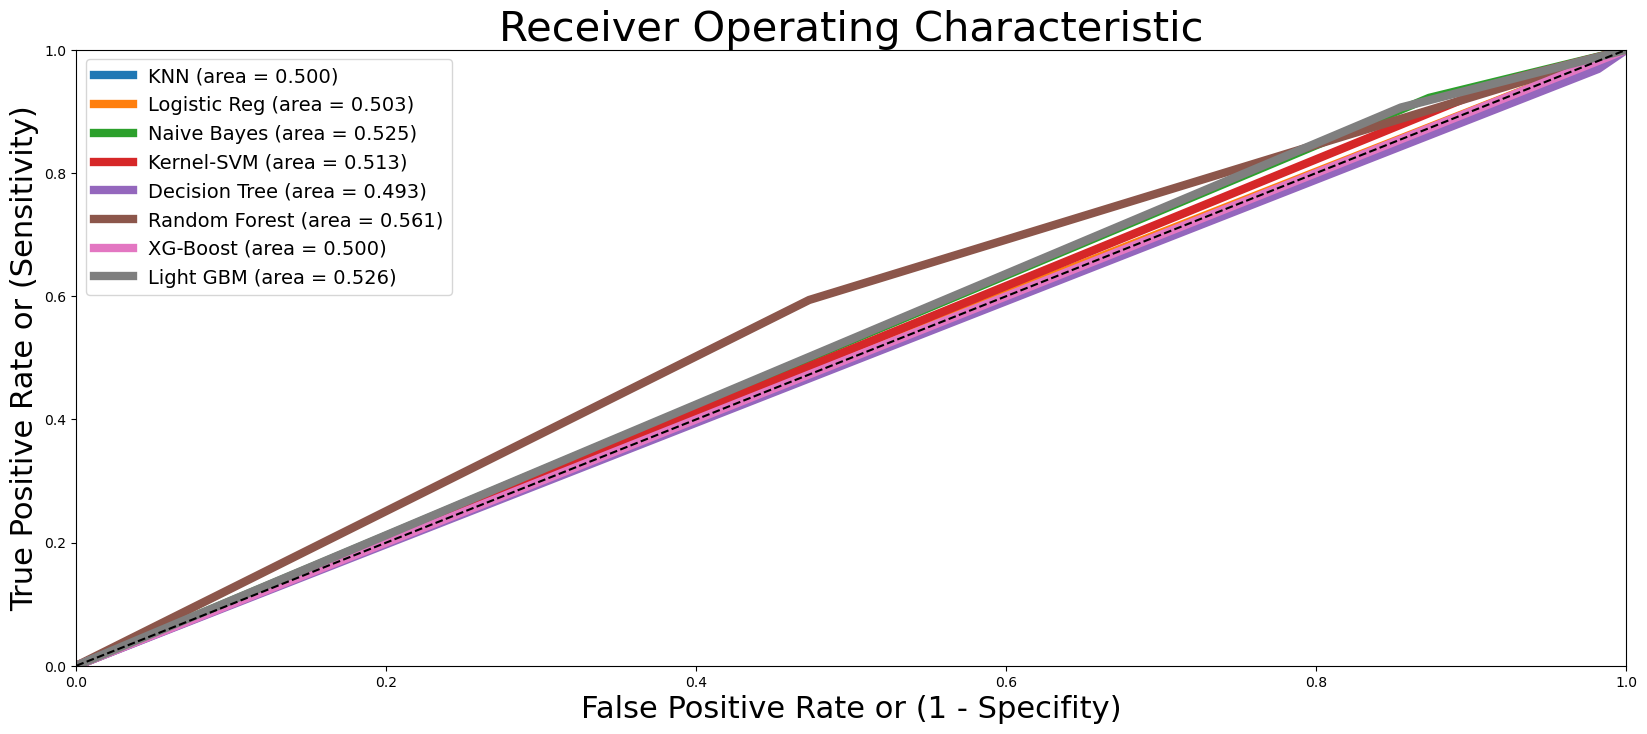

In [134]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(20,8))
plt.plot(fpr_knn,tpr_knn,label='KNN (area = %0.3f)' % roc_auc_knn,linewidth=6)
plt.plot(fpr_lr,tpr_lr,label='Logistic Reg (area = %0.3f)' % roc_auc_lr,linewidth=6)
plt.plot(fpr_naive_b,tpr_naive_b,label='Naive Bayes (area = %0.3f)' % roc_auc_naive_b,linewidth=6)
plt.plot(fpr_ksvm,tpr_ksvm,label='Kernel-SVM (area = %0.3f)' % roc_auc_ksvm,linewidth=6)
#plt.plot(fpr_svm,tpr_svm,label='SVM (area = %0.3f)' % roc_auc_svm,linewidth=6)
plt.plot(fpr_dtree,tpr_dtree,label='Decision Tree (area = %0.3f)' % roc_auc_dtree,linewidth=6)
plt.plot(fpr_rf,tpr_rf,label='Random Forest (area = %0.3f)' % roc_auc_rf,linewidth=6)
#plt.plot(fpr_dnn,tpr_dnn,label='DNN (area = %0.3f)' % roc_auc_dnn,linewidth=6)
plt.plot(fpr_xgb,tpr_xgb,label='XG-Boost (area = %0.3f)' % roc_auc_xgb,linewidth=6)
#plt.plot(fpr_ensemble,tpr_ensemble,label='Ensemble - LGBM+XGB+KNN (area = %0.3f)' % roc_auc_ensemble,linewidth=6)
plt.plot(fpr_lgbm,tpr_lgbm,label='Light GBM (area = %0.3f)' % roc_auc_lgbm,linewidth=6)

plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)',fontsize=22)
plt.ylabel('True Positive Rate or (Sensitivity)',fontsize=22)
plt.title('Receiver Operating Characteristic',fontsize=30)
#plt.legend(loc="lower right",fontsize=18)
plt.legend(fontsize=14)